# Exploratory Data Analysis

Exploratory Data Analysis analyzes charcteristics of the data before natural language processing is performed. In this notebook, I explore the common words, visualize them with word clouds, and analyze the information.

1. Most Common Words
2. Visualize in Word Clouds
3. Make Observations


## Data Prep

In [1]:
# Imports
import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from sklearn.feature_extraction import text 
import matplotlib.pyplot as plt

# Import Data
corpus = pd.read_pickle('corpus.pkl')
dtm = pd.read_pickle('dtm.pkl')
keys = ['nyt', 'fox', 'cnn', 'ac']
pd.set_option("max_colwidth", 150)

In [2]:
corpus

,article
nyt,Among the first things I did upon learning about the shootings at three massage parlors in the Atlanta area was to check in with a former massage ...
fox,"On the afternoon of March 16, police say, a 21-year-old man called Robert Aaron Long walked into a massage parlor outside Atlanta and shot five pe..."
cnn,"At an office where I worked some years ago, a male co-worker would repeatedly stop by my desk and interrupt my work to talk about sex. One of my c..."
ac,It is striking to see how quickly our media has racialized the narrative of the horrific murders at the Georgia massage parlors. From what we know...


In [3]:
dtm

,aapi,aaron,aberrant,abolishing,absolutely,absurd,abundance,academics,accidentnnnew,according,...,yon,yong,york,young,younndid,youre,yu,yun,yung,zero
nyt,0,1,1,0,0,0,0,0,0,4,...,1,1,2,0,0,0,1,1,1,0
fox,0,1,0,1,1,1,0,0,1,4,...,0,0,3,1,0,2,0,0,0,1
cnn,1,1,0,0,1,0,1,0,0,1,...,0,0,1,0,1,0,0,0,0,0
ac,0,0,0,0,1,0,0,1,0,0,...,0,0,3,3,0,0,0,0,0,0


In [4]:
dtm_transpose = dtm.transpose()
# dtm_transpose

## Most Common Words

In [5]:
# Get the top 15 words for every article
top_words = {}
for source in dtm_transpose.columns:
    top = dtm_transpose[source].sort_values(ascending=False).head(15)
    top_words[source] = top
# print(top_words)


top_words_dict = {}
for source in top_words:
    top_words_dict[source] = []
    for i in range(len(top_words[source].index)):
        ind = str(top_words[source].index[i])
        top_words_dict[source].append((ind, dtm_transpose[source][ind]))
print(top_words_dict)

{'nyt': [('women', 12), ('asian', 11), ('massage', 11), ('sex', 9), ('parlor', 8), ('violence', 8), ('atlanta', 7), ('united', 6), ('chinese', 6), ('crime', 5), ('know', 5), ('woman', 5), ('states', 5), ('work', 5), ('american', 5)], 'fox': [('long', 17), ('white', 9), ('sex', 9), ('said', 7), ('asian', 7), ('people', 7), ('thats', 7), ('atlanta', 7), ('robert', 7), ('city', 6), ('massage', 6), ('police', 6), ('facts', 5), ('theres', 5), ('shot', 5)], 'cnn': [('hate', 11), ('sex', 8), ('cnn', 5), ('crime', 5), ('just', 5), ('told', 5), ('atlanta', 5), ('shooting', 5), ('asian', 5), ('want', 5), ('baker', 5), ('police', 4), ('women', 4), ('dont', 4), ('doesnt', 3)], 'ac': [('baptist', 13), ('southern', 13), ('massage', 13), ('know', 12), ('asian', 11), ('parlors', 10), ('sexual', 9), ('media', 9), ('women', 9), ('killer', 8), ('man', 8), ('went', 7), ('long', 7), ('alleged', 6), ('story', 6)]}


In [6]:
# Print the top 15 words said by every 
for source in top_words_dict:
    print(source, "--------")
    for word, freq in top_words_dict[source]:
        print(word, end=" ")
    print()

nyt --------
women asian massage sex parlor violence atlanta united chinese crime know woman states work american 
fox --------
long white sex said asian people thats atlanta robert city massage police facts theres shot 
cnn --------
hate sex cnn crime just told atlanta shooting asian want baker police women dont doesnt 
ac --------
baptist southern massage know asian parlors sexual media women killer man went long alleged story 


Observations
* NYT's most common wordsare factual words regarding the crime (who/what/when/where) like "women," "asian," and "american." NYT is very victim focused and also includes locations like "massage parlor,"  "united," and "atlanta."
* FOX's most common words include Long (the perpetrator) as well as somme common words like "thats" and "theres." Interestingly, one of FOX's most common words is white, possibly to discuss the race of the perpetrator.
* CNN's most common words are about hate and hate crimes. Many of CNN's top words are common words like: "just"; "don't"; "doesn't" that don't reveal much information. 
* AC's most common words talk about region (Southern Baptist) as well as "sex" and "killer," which seem like they are trying to frame a wild story.

In [7]:
# Pull out the top 15 words for every comedian
words = []
for source in top_words_dict:
    top = [word for (word, count) in top_words_dict[source]]
    for t in top:
        words.append(t)
        
words

['women',
 'asian',
 'massage',
 'sex',
 'parlor',
 'violence',
 'atlanta',
 'united',
 'chinese',
 'crime',
 'know',
 'woman',
 'states',
 'work',
 'american',
 'long',
 'white',
 'sex',
 'said',
 'asian',
 'people',
 'thats',
 'atlanta',
 'robert',
 'city',
 'massage',
 'police',
 'facts',
 'theres',
 'shot',
 'hate',
 'sex',
 'cnn',
 'crime',
 'just',
 'told',
 'atlanta',
 'shooting',
 'asian',
 'want',
 'baker',
 'police',
 'women',
 'dont',
 'doesnt',
 'baptist',
 'southern',
 'massage',
 'know',
 'asian',
 'parlors',
 'sexual',
 'media',
 'women',
 'killer',
 'man',
 'went',
 'long',
 'alleged',
 'story']

In [8]:
# Count how many news each word appears in
from collections import Counter
count = Counter(words).most_common()
count

[('asian', 4),
 ('women', 3),
 ('massage', 3),
 ('sex', 3),
 ('atlanta', 3),
 ('crime', 2),
 ('know', 2),
 ('long', 2),
 ('police', 2),
 ('parlor', 1),
 ('violence', 1),
 ('united', 1),
 ('chinese', 1),
 ('woman', 1),
 ('states', 1),
 ('work', 1),
 ('american', 1),
 ('white', 1),
 ('said', 1),
 ('people', 1),
 ('thats', 1),
 ('robert', 1),
 ('city', 1),
 ('facts', 1),
 ('theres', 1),
 ('shot', 1),
 ('hate', 1),
 ('cnn', 1),
 ('just', 1),
 ('told', 1),
 ('shooting', 1),
 ('want', 1),
 ('baker', 1),
 ('dont', 1),
 ('doesnt', 1),
 ('baptist', 1),
 ('southern', 1),
 ('parlors', 1),
 ('sexual', 1),
 ('media', 1),
 ('killer', 1),
 ('man', 1),
 ('went', 1),
 ('alleged', 1),
 ('story', 1)]

In [9]:
# Create a dictionary without

Word Notes:
* asian - who/6/8 of the victims were asian
* women - who/6/8 of the victmis were women
* massage - where/took place at a massage parlor
* sex - who/killer suspected to have sex addiction
* atlanta - where/the city of the killing

## Creating Word Clouds

In [13]:
# Create the world cloud (w/o extra stop words)
stop_words = STOPWORDS
wc = WordCloud(stopwords=stop_words, background_color="white", colormap="Dark2", max_font_size=150, random_state=42)

# print(data_df.iloc[0][0])
for i in range(4):
    wc.generate(corpus.iloc[i][0])
    # plt.subplot(3, 4, index+1)
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAV0AAADFCAYAAAD3yiEtAAAABHNCSVQICAgIfAhkiAAAAAlwSFlzAAALEgAACxIB0t1+/AAAADh0RVh0U29mdHdhcmUAbWF0cGxvdGxpYiB2ZXJzaW9uMy4xLjEsIGh0dHA6Ly9tYXRwbG90bGliLm9yZy8QZhcZAAAgAElEQVR4nOy9eZRcx3nY+6u79d49PT09+75gsG8EAYL7JlELLcrUlki25ViSHb8k9suzn/3iYyd2bOec5ziOlWflxT6xZcmyZdmiLMlaSXMnuIAkCBDrYIABMPvSMz29913r/XEHAwwHAwxIkJTy+ncODwe3696qe2/dr7766vu+ElJKatSoUaPGO4PybjegRo0aNf7/RE3o1qhRo8Y7SE3o1qhRo8Y7SE3o1qhRo8Y7SE3o1qhRo8Y7SE3o1qhRo8Y7SE3o1qhRo8Y7SE3o1vhfBiFEtxBCCiG0d7stNWqsRU3o1qhRo8Y7SE3o1viRRAhxXgjxq0KI14UQOSHE14QQQSHEMSHET1xWThdCZIQQO4Fnlg4vCiGKQoj9707ra9RYG1ELA67xo4gQ4jwwC3wYqAIHgM8DceAmKeUnlso9BPyelHKbEKIbOAfoUkrnXWh2jRrXpKbp1vhR5r9JKSellAvAPwI7ga8AHxBCxJfK/DTwV+9WA2vUuF5qQrfGjzLTl/1dBqJSykl8rfcjQog64P3AX78bjatR481QW+Wt8ePIl4DP4vffF6SUE0vHa7ayGj/y1DTdGj+OfBPYDfwy8OXLjs8BHtD7bjSqRo31UBO6NX7skFJWgEeAHuAblx0vA78PHBBCLAohbnmXmlijxprUvBdq/FgihPj3wAYp5U+9222pUeN6qNl0a/zYIYSoBz6D77lQo8aPFTXzQo0fK4QQnwPGgO9LKZ+5VvkaNX7UqJkXatSoUeMdpKbp1qhRo8Y7yLVsutK2bTzPw/M8XNdFCIGu63ieh6qqeJ6HpmlYluWfICWKouC6Lpqm4XkeQojlMsFgkHK57Feuaei6juM4BAKBt/lWbzyW6zBWzKIKhZZInICq39DrL5plpko5HOktH6sLhGkJx9EU9YbWVePtQUoPPBfpOih6EOk5SM9FaIZ/3PMQiopQNTy7ihAqqNrSOTZC1UG6uKVF1HAdaDrSNv3jigKug5Se/2+hIK0yCAWhBRDKO6dTea6DWZrHquTwXAchBKoexAglMEJ1K9siJa5rL5XPIz0HVQsQiDZghBIIIfxinke1OEe1mCEUbyIQSS3/5rkOlfwMVjlLJNWJHogt//YjwpqNueZCWiaToVQqUS6XWVxcJJVKEQwG8TyPSCRCuVwmHo8zPj6O4/gPOxgMoigK9fX1zM/PYxgGzc3NDA8Ps3XrVs6cOQNAOBymrq6OXC7HwMDADbzftx8pJWPFLJ9+7C9pCsf5D3sfZHtD2w2t4+WZC/zBoUeZKueoOBam6/DR/t385p4P0BCKXvN827ZZWFgglUohpcQ0TVRVRVVVFEVBSokQAs/zqFQqxOPxt9ZxpUTaHssxCkKAJ5GW43vPagpCU/AKJkosgHQ9sFxExAApEcY1uqOUSK+KUzyDW5lAOkUAFC2GGu5CjXQj1OCbb//bgFfOYU2dQqg6RstG7LkR3PwsRtsW7IUxcB2UcAI12oAzP4r0HAJtW7HnL+AW5wm0bcarFim89DVi+z6Blmyjeu5l9HQvSjCGNX4M6VTRG/tAUbGnhkBRCfXfCso7o8h4nsvU6ac59+rfszh1EtexQEr0UIzWwXvZct8voQcigP/duHaFiROPcf7wN8nPnMZ1LLRAlNbBe+jd8zESTYMIRcHzHCZPPcHrj/4XOrd9kC33/RLBqN+XC5kRXvvO71FcuMC+j/0BiZjnv3uhooZ7cMvn8ewcihZBi21COkWcoi931Eg3oOCWz4NnocU3oxj167rXil1goTRBXaiZkBFjtnCOkrlIc7yfSKBuXde4ptAVQpDL5bBtG9u2aWlp4cKFC2iahuM4xONxhoaGSKVSzM7OEg6HqVQq9Pb2Eg6HyWQyVKtVbNsmn89j2zZ1dXVUq1WSySRDQ0M/dgL3Iq7nUXVtXOniXaaN3ii2pFr4tzvvY6Fa4qWZc/zDyOHrOr9YLHL69Gnq6vzOcHFQdF2XhoYGQqEQ+XyeeDxOJpMhFntr2oKXN3Gn84iIgXshC0IgDBWvZKEmQ4BAWg7eYhWlIYys2AhDQ1ouAMbNHQhtbe3MsxaonP8S1env4BSG8KwFABQjhZ7YTqD1QwTbfhI12PSm7+FG45UWsCZOENp4J87iFOVTTyPNEiIYozpyEKNtM87UFEKoKNF6nMwFlGAMe2YYYYT9/xwboQVQIklQNNxCxtd6PRdz8gRqMAaqDtLDHD+GGk/72vI7RHH+PMcf/zwA/fs+hR6K41hlSgtjSDyUy9siJdNnnuPYP32eSH07/bf8DHowSn72LGNHv0e1OMe29/4KsVQ3qmbQuuk+5sdfZ+LkY9R37KBz+4O4doXzh7/J4swQm+78eRLpTkrHf51g60MoRh1qsA3PnMUtj2FXZwEFO/c60imiBBoRWhR3aeBGqLilc4S61ucIM1e8wBNDf0lf+iY2N9/BobHvE9AiFMwFdra/d13XuOabSSQSyyYCIQSRSISOjo7lY4lEAtu2aW5uJpVKoes6Ukqi0SiqqtLe3o7jOBiGQV9fH6qqkkqlsCwLXddxXZdUKrWuxv4oIYSgLVrH/33rw4Q0nf5E+obX0RqpozXiC8ygpvPN6xS6mqYRi8WYn59HCLEsdBVFwTAMFEXh7Nmz9Pb2UigUeKuLql7R9IWtqmCfnEVpiKAkgnjzZYSm4mVKyKqNNF3cqTxKKowSNnCnCygN4atfXLqUR/6U4vB/RS4J2+V6q1OY1SnsxSNIt0K45zMoenyNC719HB5/lGOTT+J4vqktGkhyU2QXjck2tPoO3PwcQlHxACUYA8/FXZzyBWq8AbeQwasWUfQgSiiBlupECUSQnouULm5uBiEU3NwMplUh2L0bNZxAb+hBujYoKs7iFEbL4Dt63/nZM1RL8/Td/M8YvONzywO3bZZwrBKqdknjdp0qwy/8FUYowfYHfo26lk0IoWBVFpHS4/yhR2geuJNoshOhKASjDfTd/AlyM0MMv/AlUh07KGTOc+G1b9HUfysdW9+PpgcRSoBgywcQagjpmnjWIng2nr3oD9DlMYJtD6PFBnGrk1QXX0N6JorRgGPNrfteBYK6UBOWUyFXmcX1HAab9jOSObTua1xT6IZCIYJBf8p28WG+0f7a3d294vjl2tJFLUsIQSwWA1j+uAuFAjt37kRVfzztkxE9wH0dG9/tZqxJOBxmw4YNuK6vSTqOg6Ioy+YFVVWJRCIEg0EaGxtR3qINUG2IoOzpQLoSfVMTBDWEKpBVBxHQkLbfDhzP14KDGkiJtq0ZYfhl18JefI3K6F+vEriX45nTlEf+B4HGexCJHau0diklFxZe59tH/whFqDy0/Vdpr9t0Ve1eSoknXRShAOKaMwHLrbJQnmBy8TQBLczgzj10tu1DqAZaXTPRPR9BOiZqtAFhhAhtuANhhFACUdxSFqSLlmhGiTUgloSVYoSJ3fwxlFAMoYeI7HwQhECNJFFjaYQeACkpHfkekZ0fxCtl8UpZ1FjDivuQ0gMBAuWG2j9DsUYURWdm5EVaBu8h0TSAomhoRnjZrHCRQuYc+Zlh2jbfT6yhB8/1ByhVC9DQuZvh579EfnYYxyqhB2MIoVDXspm+m/85xx7/PCee/AKF+QsEYw307/0UoXgz0skhFAOhhgBwCkO4xbMYqVtwq9MIRUNKF+lVkdIGoSL0OrRACq1u13UN0LoapOoUKRdyZIqjmE6ZmfwInnTXfY11zUHW+4KuVO5qx6LR6BV+l7jlMaRTWkeFKmqkB6Hc2AWs/1VQVZVwOHxVDdYwjBv2AYqAhjAuDqDi0lJC/DIb73Jbln6/vG1XaYc5/UPcyvg12+AWz2JlnkeLbwZhrPjN9kyGZl/g5PSzAGxtuYuWeD+aalzpUgCUrCwvjHydzS130pq4uga5teVuNjbdSq4yyyOH/xNj2RMIPYAaSS6VUNDijYBv9Q5tuB091en/JATCCC39KVC1S20Sqoa2VE4IgZ7quFTpZUIt2H8L1uQp9KYB3xRxGZZT5sjEYwT1GJub77jqPV8vybZt9N78cc4e/Fue+8ovkGzZQse2D5Du3kMo3rzCvJCfG8E2i1w4/C2mhp5ecR3XtVD1AK5t4joWF79qVTPo3P4gi1MnGXnla2hGhO3v/VVSnTsRioIUKkqwefk6aqgF6RSxMgcQahAl2Ewg0Ex18tuI6R9gNN6D0XAb5uzjOKVzGKnbUMNd67rXVKSDO/s/hemU0NUgJXORXGWWrS33rPt5vasRaVfSrDynSPbFf4a98NI1zxd6nNRdT6PXbb+uescKCwznZkkYIXalO1Gu8LEvmmVOLExTcSz2NnUT1QO+fduscDI7xaJZWS5bFwixKdlCIhBas05XeixUS4wVsixaFVzpEdUDtEeSNEfi6DfQG8GTkoVqidHiAovVMh7SryuapPkKng9HMxPMV0vsa+7GdB3O5+fJmuXlNnZE62kOx1HX0IQrjs1oYYG5SoGKayOAgKpRH4jQGqkjGbzMdCAEUkryVoXRwgLz1RK25xLWdVoidbRF6gi8wR4ppYeTP7W+gRiJkz+G9CyEslKwVKwCJyafpi7UhERydOop9nR9iOhVBNBY9iQHRv6OpngfLYkNiLUXpdFUA001MJ0K6lqKwFJfE0Cgbcsbflr72usZGPWGbvSG7iv+li1P8cK5R+ht2M1g0340bpzQVVSNjXf+AumefVx47R+YHzvCq9/69ySaNrD5nv+NlsG7EcLvO65dRVE06tu309C954rXS7ZuQTNWfktCUYkk2wCBqgUI17X6nh6AoseJbf6tS+0JpDG7PweARKIYCapOGbPtn1MfacOTHoXqPMHuX0BTdRYqM9RZBYJG9KrvF6BoLnBs8ikqdh4pPQJahPds+nm061D81i10SyWLyYk8ZtVGAul0lOaW2LorWi/2wiu+gXsdSKeCNffEdQvdk9lpfvvgd6gzQnz1gc+uEpZSSg7NjvIbL3yLRCDIn97zU0R1f6o3Xc7zxRMvcGhulKJtUrCr7E538B/3fYid6Y4rVYftuRyaHeUbZ1/j4Mx5JkqL2J5LOhRjV7qDh3q2c2frAFHjra+8257L0cwE3xh5jeenzjJWyOJKb7muh/t2cXfbBozLBNtfnDzA0xPD/OHtH+XgzDkeHzvFaGEBy3NpDMXY19zNpzbs46bGzlUCe7yY5Tvnj/L42CmGF2fJWRWEEET1AP2JNJ/eeAsP9e5cLu9Jj7O5DI+cOcQzk8Ocz89TdiySwQjbUm18qGc77+nYtPKdeBaeW2K9mRs9exHesLAppSRXmWF08Tjb2+7H9RxOTj9LoZohYtRdUahJKZnMnSZXnV1XvT+qSCnJVmaYyg/T27D7balDUVTSXTdR37aV/OxZpoef4ezBv+XY4/+NRNPgksCEQCSJUDXq27ex9b5fWnf7F8YOc+7QI8TTvZjlLGcP/g3RVBfR+it/cyemn6Uh0k6uOktdqJmZwjnK1iI3dXyQXGWW03Mv0ddwE/FgIyOZV9nWdi9Bru0RVLKySOly3+DPoQjNn5Vc5z6o6y59+tQc1apNMKCDwPfdtcpIx0LoIVjyP5S2iRpJ+v6IVd+lx6sWAFAi9ShGGKGtPSpYc88grez6GiUdzJnHCff/m+VRbz3sTnfSl0hzeG6MQ3Oj3NO+ctpYciwOZ8aZKuf4cN8OUsHI8kfZFknwC1vvYK5a4Hx+nj967fGrN1FKTi/O8HuvfI+RXIZ9zd18tH83QVXj9OIsT04McWJhCstz+UDX1hXC8HrxpOTkwhR/cOhRjmTG2dvUzUO9OzEUlWPzkzw7OcxQdoaEEWJvU/cKQVO0Tf6fI09SsKvsb+7lEwN7yNtVnhwf4lsjr2M6Dk3hON3xS4ueE8VF/uzYs/z9mUPEjAD3tg/SFq1DSslspcB4MbvCd1lKyVylyB++9hjPTAyzqb6Zn928n4QRZiQ3xxPjQ5zOziCl5EO9Oy7TeK/X/KGsOkciOZt5BUVo9KV2Y3sWJ6aeZiRziOZ4/4qyi+Vpjk09TaY4yonpZ6hYBZ4e/jJHJx9fvm573SZu7voQYePNL9i5nsNk7jTn54+QKY1h2kV0LUg62s2Gxn00xXqWNUQpPYbnDnJ08klu7fkoqqJxdPJJ5kvjCKGQCrextfUe0tHO5XMqdoHTMy8yvniSkcwhcpVZjk4+wWJlGmVJUKQibdzU+SDpaOdyu6p2kbHscUazx1koT+J6NmE9TktiA4ON+4kFU2tq3qoWINm6mXjjANVihrGj3yc3M7QsdBNNG1BVndzMacxylkA4ecXrXE55cZKzB7+KVV5k94d+h/zsMKcP/AWjr/8jA/t/Bj2wWlgKIWiO92G5VVRFw3FNdDUIQjCVP0PJWsSTLgJIRzupC63P40URKrnqHCemnyWoRdEUg41Nt16X/LkuTbe3L0W60bchKYrAHHkRc/IERtMG3GIGxQjjFjMEevYgzTLmhUOENt6FV1zALWSQnkNkxwfXrMMz57AXDyHd8jpbJXEKQziFYfT4+he0UsEItzb38drcKD8YPc7dbRsuOWRLyVylwLNTZ0iHouxp7CaiX1o4jBpBdjf6HXR4cZYvvP70Feu41ELJl0++yKnsNA/37eIXt95FaySBKhSyZpmN9c184fWn+B9Hn2FPYxdtkStrXeuhYFX5+plDHJw5z8N9u/j5rbfTGa1HEYJMtcifHYvy1dMv85ennufmpu4VYsl0HabLOX5l13u4r32QuBHC9Bx2NrTzWy/+Iy9Mn2MkN0dXrN73hPBc/mnsJP8wcphUMMJv73uQ7ak2onoQiaTsWOTMCk3hS0JJAj+4cJx/GjvJ/uZefmXXexioaySoaiyaFXoTDfzJ60/x5ycPcGtLH62RJUd5RUfRYvjC9NqueUogDWKlKURKj+NTT5MMN9OV2o7j2iRCjRybeopbez++oux8aZxDY9+jZC4yXxpH4jGVP0O2MrP8zDRFx/XsN/We/PZILiwc4a9f/k3y1Vksp4KmBrBdE0MN0VW/jfdv+Vf0NexBCIHE17qfHPoiAS3EucxhRrPHfTcxt4ymBHh98nE+ued3aYz1AFAyFzk6+QSTuSGy5Wk86bJQnsR2zaWFQV8wb225e7ldplPmhXOP8NTwlylUM7jSQVMMbNckbMTZ2HQbD+/8d8QClwTv4tRJJJBoHEAszYQ8x8QsziOEgh64NCMOxZtoGbyH8RM/5Nyrj9B78yeWhaZjFsnPnSUUbyacaF7y6a0yfvyHTJ5+iv69n6Kpbz91zYPMjx1m5OW/o75tG019t60KBNnacjfRQJK+hpvQ1QCpSAdSusSDjWxpvYsNzj5iwRSaEiAgklQrNkIRIH2FUtX8hWYhfFl3kbCeoDnej+NaVGQBXQkgrzN3/rqFrq6rvPLyGPX1YRRF0NaeoMEqg21SGXoKo3UL0jHREi14hYx/TroXvaEbs7hA5eyLhDbcftU6rOwrOIXTXM8GAJ6VwZp5FC02eF0Lfh/s3spXhl7k8NwYp7LTbKpv8a+3pC0emRvj/V1b2ZRsvqLNd71MFnM8NXGarliKj/fftCy0ABpCUR7s3sars6N8+9wRXpw+x0/27US9bs3O/4gz1SLfPX+Urng9D/Vupz/RuNz21kgdP9Gzg2cnz/DKzCjnC/P0xi+tbmtCYXe6kw/1bF/WtsOKwZb6Vnal2/nWyBEy1RIeEhXBZCnHc1NnyJkV/s/d7+XO1oEVWnpED5AOrTQ/uZ7HN86+Rl0gzEM9O9jR0Lb88TeEotzXvpFnJoZ5duoMJ7JTtEQSCEAIBS2+GaFFkE7h6g9CaOjJPavsuXPFC4wvnmQgvZe2xEYkHk2xXkYXjrJQniQVuRTY0lm/jZ+95b/gejbfPfZ5nj37VR7a/qtsbLpt+d1pSoCgvnJl/nqpj7SzselWulM76EhuIaCFqdgFnhj6Ii+c+zrpWBfN8T6igUuO+7Zn8vjQX7Cj7T38m7v/klignnxljkdP/SnHJp/i6TNf4WO7fPtmMtzCh3f8Gq5nc3j8h/zNK7/JLd0Pc/fAT2NovvlGFTqBy+5DV4M0x/vY3fE++tM30xTrQ1FUpvMj/ODEF3j5wj+ypeUubur8IAJfwM6df4UzL34FoaoEow0IRaWSm8EsLdC+9X3Ud+xYvr6iGmy6619ilhcYeu7PuXDk24RijThWGbOYIRhvYuu9v0Q40QzSY+7cQU4//0Uae/bRc9NH0IwImh5iYP+nOfy93+fEU/+dSLKDaKprxfefDLcs3w9AQLt0j6lwO8BSYJDk1EgOszpFIKCxuFghGjMIBXWisQDtHQkuzm5czyEWTHFz5/Jm1Jycee663/u6hW53TxJFAbPqEAzqRKMGmtqIUHWsmTOENtyGOXYMO3OB8KZ7kK61HJ6ohBPE938Sa3oYzyyhhhOrri89C3v+IG559LpuQNp5zLmnCXX/LOI6XD86Y/Xc1tLH984f46mJ0wwmm1CEQsWx+M75o4Q1g/0tvbRGVrf1ehhanKZkm/TEGxhMNq0aGNKhGD3xFJpQODo/wUO9O7iK59SaSPzp/kylQGM4zlghyzPe6RVlMtUSrvQDOs7nVgpdQ1XZUt+6yrxhqBrJQASJH/YspQQBs5UCF/ILJAIhbkp3rsssMlcpMFbMYqgaWbPMMxPDK37PW1Vsz8WTkpFchnvb5PLCU6D5/VRG/xonf/wqNQiMhtswUres8mg5NvkkUko2Nt2+vHK/uflOzs0f5vjkU9w58KnlsroaQFcDuJ69LJxCepxYsGF5kHirCOH7e35s92+tOJ6khTv6P8nQzAvMFs5RNLMrhC5AOtrFg1v/d1KRdoQQJMMt3D3wac7NH+Hs3Kv+dycUVEUjGkjiSY+g7g+AAS1MLNhAQLuyX7QiFDY1386m5pUKUn24lbnCeSaypxjLnmBXx/tRlqbULYN34zom2cnjWOVFBIL6ju009d1G++b3oCgCz5pHOmWkdIkk27n5w7/D1MkfMDt6jHLmJIFwM8mGTTT230W8oRnPKWAXp8lcOEiqYxf9+z5FLNXt9weh0tizl8HbP8PY698lN3OaSH3HVaf4aylkQkB9fYhi0cIyXRoaIsQTQZAS03RQ1Uvve2LxFIlQI8NzL2EsuaednH6Oba33ol6HT8K6S5bLNtWKg+14ULapVGxSHf4CVnjjXQCo8Uau5MtotPhTf6N105rXdysT2Lkj4FXX3XgfiVsawckdxWi47brOfH/XVr5x9jCH5kaZqxRpCseZLud5cfocA3WN7E53vGV3qpJj4yHRFYXQGqvkIVVHV1SKtvmm65FICrb/7I7OT/Drz39jzbKJQJiqu3JqrAhBzLhW2OilGYjtulRdm7gRXLfnRdE28aRkvJjld1/+7prlBFB17RXzHT2xlVDXpykN/QGelbnCSSpaYhvhgV9GXdJkLmI5VYZnX8JyK0zlh3nqtL/Dz1zxAqZT5vTcS+zv/Si6+s7m/5BSUrELzBRGyFVmqNolbM8kW5rE8Swcz76i/+dA+mbCRuINml0zuhrAcqu4nvOWXMI86ZGvzjFXuECuOovllHE8m/PzR/Ckg+2t7KfR+g423vHZNa/nViawF17Crc4CAqN+L4qi0dLVRefOh7Eyz/hBCqWzfn6K4lEcpxGvcJqN+z+EHlvtqqeoOj27P0LP7o+86fsEXxh3diWXPRd9r0ZJdqFMKr1yJlN1SijVeUYyr9GZ9D1PXM+57jrXLXQnx3P0DaRoao4xcmae2dki7R0rY43FW9AC3OIZnNyxN3dueRQ7+ypGav8qW97V2FLfyoa6Rk5lpzk2P0lTOM5zU2coOxbbUm30xt96lFlY0xEInCUNM3KFeHjTc3CkR/gqC4zXQiAILi1abUo280DnlmUPgIufplz621A1NtU3r7rC9WhxqqL4A4VprkjIczUCmo4iBK2RBB/u3UnjkvnhYrsuIoGbGt/gyicUwj0/h1BDVCe/hZM/sSR8FdRwB4H0XQTbP4aeuhXxhmc8nT/DbPE8ZSvHY6f+bFW7pvNnmCmM0F63tlJwo5FSLg8AY9njVJ0SAS2EqhjYbpWStUiaziueGws2rHJRUhVtyd1JItdh914Ly6kyNHOAl0f/kcnc6SW3qDCKUCmYC1huFf8Nrd8EKNQwaqQPNdzrR4x5JoqeQDHqEWoQPbEdzy5g1O9FCA3pVhBaFEWLItTVGrlbHsPOvkqg+YHlgIi3yoquJgT1qdWmow2N+6jaRe4b/MyyOaox1vP2eS/ohsro+UUKBZOZ6SL19TfmZgGkW8XOHbtu08Ly+XYOe/EInjXvL6Ksk7gR5IHOzfzxkSd4fX6CW5p7eHxsiIQR4rbWfoJvQQhepCfegKGq5MwK48Usg8mVwq5gVZkq5bFch554A8qbsOeCL7SaI3EimkFdIMwHureyeclO/XaQMEKkQzHO5ub8+6prWtOP9yLpUJREIISUkjtbB7i9tf+q5d+IotcR7vk5Ao334prTSKcMCD/ePtyNEmy64sB/NvMKheo89w3+HIONty4fl0hOTj/Lq2Pf41zmtXdU6DqexXeOfZ6T08+yvfV+dnd+gFigHl0NMFcc5Vuv/+c1z1UV/W3JqCWlZDx3km++/p8pmllu7f04Gxr3EdbjqIrO0ckneHzoz6/7uoqRRNHfkAzmsvaroXbUECuDZ1YE0qzErc5gzj2Fkb77hgnd9SKlxPMuzT4CWuS6nWvWLXS37WhhbHSRXK5KW3uCltYb56PrmrNYmWdAvtnVYIm9+BpOYQjDaLhqZNPlBFSN21r7+ZvTL/PK7Hl64w2M5OfoTTRwa/ON2VC2I5pkb1MPz02e4fsXjtMSqSOiGygITM/hhekRDs6cJx2Ksb+5900v2gkhaArFuad9kGcmh3lyfIimUIy4EUIRAg+J63mYrgMC4nrwLX24HdEku9MdvDx7nr84cYCBRLw6MwEAACAASURBVCMtkcSSH6/ElRLLdVAVhfBSdFVQ1Xlf5xb+/MQBvnfhGL2JNKlgBE0oy+2zPBdXesT14GohLgRCDaLFN6KxPm+VspXn3PxhbLfKrb0fXyFYpZQkQ808N/I1zs2/xp7OnyBkrNWvb2xCo6ncMMOzL9ESH+BD2/8P6sOtCOFnfrNdC2cpPHZtru/dXZrtrK2lOp7JmdmDTCye4r7Bz3D/4M8RXvJhltLj9OyLuPL6p9N+A67S3pVq5vrOAaRnUhn9Kp69SKjzpzBnHsWaexKEjnQKRPr/NVpiB25xmMrY1/DKY6jRXkK9n8OafQqhhVG0GOXzXyK25T/i2Yvo8auYQD2HueIFxrLHiQaSSCSvTzxOU6wH5TpSGVxT6HqeREqJrqt0dfkVLcxXmJkq0tO3vnRoV0NKiVcexZ5/4arlhBpZciVbo8MUTmHnXkev34cQ69NQhRB0x1Lc1TbAD0dP4smXqTg27+/auhwMcTmW65KpFihYVRzP41x+Hke6lGyLM7lZdEVFVRRiepCmcBxtaQr+i1vvZCg7zZdOvcBMOc/d7YOEVZ0j8+M8cvY1FswS/2rbXXTFLvnAlm2LuUqBsuNnMRsr+DkHFqolTmanSFWiaEKhPhhZ9iOuD4b59Mb9jBWz/PejT3N0foI7WvtJGGHydoXpUp7DmTF64g389t4H1/WM1iKk6fxEz3aGFmd4ZmKYX3zqb3iwZxsd0Xpc6TFXKXAqO832hnb+xSZfuxTAJzfs5dW5C3xz5DDn8hnuaRukNZKg5FjMlPMcn58EBL97y0/QGH7rSWsmFk8ymRuio34rdaE3mlT8Ve62xCDjS+X60peipBShoqtBhFCYLYzieQ7Kkq30Ymj1mx24HM/Cky6aahDUossaetFc4OT0s8yXJkhF269xlfUhEOhqEFVoZMtTVKwihhpeEqaX7kNKsF0TiSSghZfuXeB6DrOFc5yefYmylb8hbXqrSKdMdeIbSCtLqOczCEXDLV8AFKIb/x1W5lmqE98kEu2nOvEPaJFuAgO/THX8ESrnv4QW6cUz57GzryEUDTv7CsBVhe5iZZpXx77HbOEcueocnnTeVJKoawrdQr6KZbksLFQoFkwUVbAwXyYaC5DujDBXLpAKRdAUFcfzw0YF/rQ5oGkEVJ2SbTJbLlAfjBA33qBheSbWwkE88+qZfozm92JOfQ+8NRabPBN7/iW81g+jhlrX/QCSwTC3NPfy/QvHOTh9npZIYoXf7uVkqgX+7NhzPDs5TNmxKdpVClaVkm3xOwe/Q1QPEtYMbmnu4Vd3v5dkwO/YW1Kt/Ie9D/LlUy/y+PgQfzf8qq/NGSF6Ew18asNefrJvF2H90uLH0OIM/++xpxnOzlJyTPJWFQk8N3mGo/MTRPQAEc3gEwN7+OmNt6ALFUUo7Gnq4jf2vI+vDb/Ckblxnhg/hek66IpGTA/QEklwT9tbz0IlhGBTfQv/duf9pIJRDs6c40+OPEXFtVCEQkjT6YqluK2lb8U5bdEE/2Hvg/zVqRd5ZXaUPz7yOCXbQlMUolqAxnBsVcTcm8X1HMYXTzJXGOX+jZ/FeEOuXSEEhhZmQ+MtPHf2q0zkhuhJ7UJZWhgUQqE1sYFEsJHnz/09uhogEqjD9WzqQs30pHYuezeUzEXmyxOYdol8dY58dQ7brTKaPYauBtDUALFAinTUd21qjHaTirQznTvDPw39TzqTW3Glw7n51zg1fYD6yPr78LUQQlAXbqYlMcCJqaepCzXTmtiAlB4hPUZ3w05igXo0RaetbiPRQJLXJx8nEkiSirRTqGY4NXOATGn0isEgbimLNXUKbykYSm/sxWjsW1XuRuKWzyOdPKHOT6EYKZAOQg2hRftRg42ooTbszAGknUNKByXUjtBiaIktVM79T4yGO/ByR3CLwxjpu7Dmn1/Ks7s29eFWbun+ScYXT9JdvwMhFBKh9Noh32twzZ6tKAJF8QWtrisEDB3DUJk3ixybdzk0e4H7OzahKQrT5Ty7051Ml/OcL8yjIOivSzNWyPLq7AXuaR8kbqzUNqRbwZp57KptEGqYUPtHsTMH8My1QzKthRfwqlOowZZ1mxhUobC3qZv/66YHmK+WaI0kVrmJSSSOa1KqTrE5maQ+uGONq/l0ROsxLlvR1xWVO1sH6EukeT0zwWQpy0J5hrZYE9vT3fTEkkivhO1qyx9vWG3g9uYeOkIasUA9iqJhu1UqVp5IIInrOcyXxumLJ1EQFM0smqIT1KPc2txHf6KR4/NTXCjMU3FtgqpGwgjRFUuxMbky+uYDXdvYlGxhR8NqzSqk6tzfsZF0KMrOdMcq88fWVCu/sed9HJ4bZ7SwQMnxHe+jukFXLMWW1ErhoQiFzckWfv2m93FyYYpz+Qx5q4quqMSNIO3RJBvqmogbb91WV7KyjGVP4EmX7tQOtCt4JxhqkJ7UTp46/SXGsscpWYvEgpdmHBubbufO/k9y8MK3eeTwf0JTDHTV4Oauh2iv27QsdC9kj/LE0BdZKE9gOmXylTkcz+Kp01/mpfPfxFCDbGy+jZ/c/msIoREJJHlg07/kydNf4rmzf4siVDTFoCXRz/0bP8vZuVeZLZ57y8/gIs3xPu7Z8LM8d/ZvefL0X/pBC4rBQOM+0rGupT6m0tuwi/sHP8ero9/l+ye+gL7kj9yf3st7N/4CT5z+4urnfOxR3PwsQg8iADX61mfA10INNqGn9mPN+8mN1FArCBXE5ZqnRKgRhFD93MvSxi2PoQSbUUNtWLNPgtDQogOYk99GDV05pPgiQijUR9oomAucmjmAIlQ2Nt9Offj6BshrCt1Y3NcOthgqoZCOrqsUiyYHxs7iSo9kMIIiFCRQsP2V7ENzo2SrZSK6seyCkQpFr2ivdKtTWEuq/VqokV606Aa06ADWVYSuW7qAnTuOlti+bhMDQHs0yacG9635u+e5XFg4SqE6x/s69xIPNqxZdi1URaEzVk9nrJ6KVWA0e4yCOU9/PMGZOT+5z4bGfSyUJxnJHGJv10N8cnAvR8YXGUjvQlMNLiwcxfXC9KVvwnEtzswdZFNTF5nieWaLFyhbOXa1P4ChhWgKx1dEgwFL+QjEqgHpPZ1rT6mCms5dbRu4q22DfwnXpjLyImo0hd7QBYpKzK5weySKKxz0xj7f6dwq+TZKy0+44+/64KIEYwhFIRkIc2tLH7e29CE9188jG4ggHROEgpM5j55sQ2gGXrWAW5hHTTTh5mexJk8S7L0ZJRTHXhhHr2sFIXDLi5fSJioqSm6efS0PsL3tPl+DfcMim+PZWE6FoB7hkzf/PmEjQdnKYTol4qFGpPRIhNLcPfAzbGjcT8Gc96OkUDmVtzhbyNNFgFPZacZzNu3p97BJVzk4c57bBtpZNCtYnkNjKEYqGKU+3LxioW9H+3toivWyUPZdxHQlQEO0k3S0k466zRTN7LKTv0Cwuel2Pnvrn9CR3IyqrPx0I0aSj+76TT8XwBU0L7ui0xm4m49u38jJkdPU1Rssztt0tXTjluKcyywQjRqEQnEGow/RPLALUy6Sy5fpbm+jKd5LWI+TCDUSMmLLYcQAbnaC8Jb3+LtXgL910GV4VhW3MIsSSiD0INIsIu0qarwRJzeDEoyhBP3UltKuoIYSKMEYzuKk/1totXYtjBTB1oexZp+gcuGvCPf/6yv2X6HH0FO3Yk7/cCmJlkKo85MogQY8K4Ma7kQJNCClixJsXOszWKZQnWcse5x0tAtPuhwe/yF3Dfw02nXIm/WHARctdF1F11U8T5LUw4yXs4wVs+xKdzBfLjGUnaYzWk9XrJ75aom6QJjWSB2vZyY4n59nR2q1JmXNPoG0r24n0hLbEEYKPXUr1vyBtQtKB3PmhwTbHkIo1w5qGJp5gfnSOAEtQk/DTsazJ8lVZmmv8xdpRrPHaE1sIGwkeG3sh9RH2qhYBS7Mv858eZz+9F48z2Fo9nk6k1tpSWzg1dHvEgum6EntZCp3hvnSOP3pm1GEwunZl0iE0hhqmJnCCEVzng3pfSChOd5LQAsTMRLEAvWEjTiKUHA8G9OtULbz2G6VtrqNGGoQy6ngSgdPukzlh5krjqKrQRzPwiDkO6K7Vd+Q6jm+ICudQwk2omgJPDvnr/wKDemWUAIphBK6po1Sei72zBm8Sh5r5gzSLKGne9CSrVjjx3AWJhCqinRtjJZBqiMv+wLXMUHViGx9L2p0ZdJ6aVWoDD2DlmhCeh6B9q1UTx9A2Xo/CIXq2ZcQqk4oWo9bmMOcPEGgaxcA1TPPIzbciVctUHzlGyjhBEbLRhQ9iJedpKf3ZozGKy+Knp55gVxljqpToLN+G4rQWChPIKXk2NRTJEJNbG+9l0ggyUDj3uXzXM/Dmz2P6fpugNPlPCZRWhPt9MUbOFY6zPb2XYwWFhgvLTJpVtjbtIOGyyL0hBBowqA9uYn25MpBTzomqbkFUoqKZiziGjZOdpxYpcDO+m14+QKSeWyrgjBC/h5rVoXNqT0II7LqHUopqVZsrIpGd892StONdDbWcXR6Gr0aIV/xyOXK5MM6bW0J7IpBa902ikWLVEzSn075IbLAYNP+Vc9RaAHyz38FPd2LUFUCXbsIdt8EgGeWqAwfQFoVgr37cHPTlE8+SWjjXajxRqzxo6ixNHpDN7kn/xTFCKI3bQBFQ1ZzeFaV2N6PowQuuY7p8c2og7+KEkwTaHsI3cyg6AlCbQ8vl9ES24iE/YAJo34fWqQH6ZYRahgl5Gcoiwz8MggdRU8Q3/nHvpniGlhuBUWoDDbtR0rJY6f+1M9TfB2sayGtWrU5fWqOrp4kdXUhJifyqKbGB3ZsxZOSgKrRl5DsbuxEV/wg1s31LahCQVMU2iJ1PNC5eXXKPs/27bRXTQAs0Ou2owRSGA23URr+o6uWt2afxFt6CdciW5mmrW4jJTPL+fkjLJTG2dn+ACA4O/cyO9sf4MjEYww27qezfivtdZsoWVnmS+PEgilOTR+gs34rYSNBKtKB6zm40qElPsBccRSQ7O58P8+P/D09qV0EtDBbWu5hJPMKhhokHkyjKBqxYD1how5FqBhaGMezyJYnCRsJSmaWqdwwPamdCASnZ19iS8td5CqzzJcmyJTGaIkPULWLBLQIQd2PY7fmX8ApDoPQEIqOGmzyUyQWhjBS+7DmnvXtYFoU6ZQItn8ElGtP6YUQKOE60AyEXQU9iGeWcIvzeE4VWZpHSzThmUXc8iKeWfKTHAUiqLH0FTuo0INodS3+xzhwG0LTkZ7jJ/X2K0Vv6kfoQdRYA2q0HiUQ8V2KXBevnAUEQtXQ0z1Ix0Spb8cZOYiTSa8pdF3poKk6jaEeAmqYXHWWqJGkaC5QH26lIdK5HHV1OaqiENEC2J5LXSDMpmQzT08OE9UCpIJREoEg8aWMcX3xBuYqRUqOzXrnR9Jzlzw1dKyJE7iFDG4p6+8bVl4ELYAwIlSHn8OzKijBGJ5ZJrrzg6jGav9Sz5MUCxalkkU+X6VadSgUTNLpCNFogHLJIhI1qK8PUyyalMs2La1xTp2aY/v2lms6SgQHbkUY/ixFGBGU0KVvT9pV3HKeQPsWlFAMt5jxbb7NG5ZmPx5ueRHNtX0tPdnu3/fUKaTnoMWbwFv5vQstjLoUUSe0CMpSiK8IXHrCihaBi8fVAGp4telADV0K/dYiPdd4Kz4BLYzplDl44Vu4nk3ESF53fMI1ha7rekxNFpiYyFEu24TCOq7r0dWdJKjpy6t3qlBWRCaFLot9D66x75VbOI2dP8HVHK0Vox4tthFFjaDFBlBC7XjlC2uW96wMVuY5tOi1Dfme57BYmcZ2TQJamIAexdBCS6GugkxxFCklqqKjKhqqomGoISQS17MZaNxLNJBkOn+GUzMH2Nx8By3xPo5MPEZjtAtFUZkrjGIoQTRFJ2TE0FWDwaZb2dDoT/WFEEQDlzItJcPNywlYFKFw7+C/WP5ta9u9/maSCOLBBjrrty7/1hjrBi4FqAijDjXc6YfDSoka6wfp4VWmQEqUQANKsAXPWvA3eFxn5nuhBYju/tDKg0tmi0DH9lW+lcHOnSt9L690TVVDq2tBb+xDT/fgVUsIRcXNzxLo2O5vTzP2OmqsARGIogRiOPlZPzm4quHk5zDSPRhtW9DqO3zN3vPQG7oQV8hAdZFtrfeu+Hc7vsZ5+Yr0Wpp/IhDClR4KAkNV6U+kaY/WoasqTeEEE8VFGoJRAqqGoWjLbnPrQagGWqob6VRxKzk/J2wwitG8Aa2uBbe4AJ6DEk6iN2/Eq+TxzHPgXVnjUlWF3v5LWty+W1YHXVzuxdDdA8WiSWdngkj02j7B0jFx89N4lQJqPI20L0WVKsEYRroHa+woihFCCcXRhPC3LbqYhbCUBelhtG1BTTSjGCG0ZCv23DnUWBol+NZyXNxI6kLNDDbt58j4o+hqkP29H73u4AhxDZcHCeA4HsOn56irCxEK6xi6iqopmFWHSsUmngiiKGJp+3V/Dy7bdgkEtBUZet5I6cyfUDj2W0hnbfOCnrqNxM7Poyd34Vanyb/2S1QnHrnaLRHs+DjJfX/NtYboAyN/h6bo1IWaaYr3kqvM0BTrQ1cNZgrnyBRHSQQbaU70kymOkQilCWgRRrPHsJwKqUgbEslc4QLRQD2JUCMzBX/xozHazWJ1hmJ1gcZYF4YWxnIqNMff3lXdVVxD4LmVCbzKFGqsH6ElrvmBvSvIi76lvj1aSg8kV91iXEoJnot4BzZolNL3fr24ZuH/W96wPA3m5EnwPIzmAX/r9je8U2dxCic74e8QHEnekHdo2+7yIvq1rpf94X8lvPl+jNaNlI//E14lT2zfJy4VWOfuIKtYYw3i3WSxPM3hiUeX78nQQuzrfniVjZ2rCJ919UhNU2htjTM9XSAz52fvNwzfvpvJlKhLhmhIR5ie8jc3DAQ0XNdjYMPa0WGeU8bKPI90r74bgBbfuDw1UPQEev3N1xC6EnvxMG5lcsX04Uokgmk6kpuJBxuXE5BcpCUxQEvc36VYCEFb3SU3q76Gm5amyf5zTUe7lzPOJ0JNy5mxkpGWZSX+XRNm16hXDbVd8TlZhyexh2bRupIEblnfViZvRHoeznAGWTAx9lx9ZfiqCMHlfVgI5ZpTXiHEde+IO50/y/Gpp0hHu9jaeu+y0MwUR5kvTTCQ3rvsTvbGusSqf9+49x14Y86SN7xTra4Fre7GRh/q+vqd/YURpnrhEG5pAWvmDHrqDf3lzfb9GzRo3UjKVg4pJXf0fRJPuvzgxBfwpPv2JLwZOjWH43jMzhaJx4PE4wHi8cByFp58rkp2oUIsHqBYtPDcqxuXnfxxnOLpq05rhRb1U/oZS9NvJejvUR9owjNn1jzPM+ewMs8S6vgEV/s6+xr2YGgr/YbXM7X0f7vUIS7/wFb9vc7+JqX0n4V0kW4Ft3zBz0dRGvG1UWvB9zl0K0jPBjzfdKAYKGoUodehBFKooVbUYBtqpMvfP04NL7nSKLCODQl9DVFiPjuCsbsdrace6Ulwfe0STVyyBinCP85SyObFJAqaAq4Ex9/115svY+zpWLpHx488vJZPuZ9GYPX/3/j7qvIqKDqXkn/LFU7silBRFBVPusvhnBePJYKNhPTYsj0eWM7QlY5dSh0opYcrXT+bF763gMTfwFJKX8O9guazLvx2est9wTPncArDOMVh3MoY0szgmvPglvyFUunBUj8QWsQPuTVSqMHWpT7Qhxrp9vuKUFlPH1jZHg+JXM5cdiUbd3T3Q1TOvIg1PYTRMkiwa/XuFFK64Nms2NHj8neLglCvvXPK8vcpHZAObnkMJ3fUfz6l8/534pb9EHEBKAGEFkU1GlBCzWjRQbTEVt/0pgZBaFw0860HVdEpmPMcmXgMx7MQQr3uAXbdPcO2Pbp7klimQ1NLDNN06Onz7UQXG9zaFkcRgrGxHOWyheO4GMbqKqT0sOdfwC2dv2qdargLPb51OWWbEAIt0otWtwNr5tE1z5N2HnPmUYJtD6/Kq3o5bwz5dF2XxcVFbNsmGAwu72T8tiElUtpIO+e7zmUOYM08hp076m854zn+7qXS9Tur9FidbEQsC1SE4j8roYGi+c7ikX70+j3oyZvQYpt8W66egKWIpFVNKttYr4xhvzIOjocIargTecwD58DxMPa0I20PVIGxp4PK14+g1IWwT8wiQjpKPEDg/gHMZ0bwFqvIook2cHGBQ1I68wVKQ3/wtj1SPXUr8R1/iLbk6J6rzvLCyNep2Hls16Srfjs3dX6QU9MHGJp9EYlLT2oXO9sfIGTEiAfTmM6l/e+m88M8P/J1IoEk79n4OVQEU7lhDo1/n7KZIxZs4P6Nn2Ese4Jjk09ScYo0Rru5o/+T6943S0oJbgXPyeFV57AXXsJaOIiTO4JbGUe6Jng2UjpL/cDliv0AsTzAXuoHOmqgCT15E0b6TvTkHtRQK8JIXjUV4kUypTGmcsNM5vytfgbSey8NPkuDlhpNEd58L3guzsIYdub8ip2I+f/Ie+8oS87zvPP3Va6bU9/O02FmGhMxwCAMQABEIAiSImlG6VCUJSutJGu1Z9eW7Y3nrNf27tm1vEder1fSWqsjybSiZZEripkEiAwicmYwOfZM53zzrfjtH3Wnw3T37e6ZAcQ9es4ZTKNv3bp1a6reer/3fd7nAZypb1A99T9tasWlZe4m9+jX2zalpAwInXmC6gWak1/HnXuBoHopSkSkF9XyWX2ftM7L8v2hLicqqtWDXvgAVtfH0DP3oJhFxDZU5vLxPg73PMml2bdQFZ0jfR9G2eEDdttbFzrixOIGuqkydr1Eb196gyVIdMKGhtuTo0NnDnfhTaTXzpZHoCb2oKUPrfmtGtuFnrkXd+Z7m2fJ0scvvYtfPrsj/7RKpcI777xDZ2cnuVxuW0FXht7KcSgaYptF9ag7fxl3/jWcqa/hzDyHdOe3fayr9tT6/CD6ce0ruI1x3LnnARB6Bj1zBKPjSYzCB1Bjg6h275oMQ4kbWI/vxnvjOvbn70bEDZzvXsB8dAhtT4HKv34R4+4uRCxq0Mm6h7R0lKxN7Kfvo/m1MzgvXEHWPWI/eQ/uS1eQ/kp2I/1q21XK7UJ6C2uuCylDys05Hhr8DEmrwLfO/A75eB9XF05wbPDTpO1Ovn3md+jN7KM7tV6Apyd9F3f3Ps2V+R9CK5s9OfEsXcnd3HvgY6iKRs1d4vTUi8SMDCPFh3hj9K+Yr16nM9VGv0NKZCtTC2qX8Bbfxp19Dnf+ta2F2jfeYfSnVe9efR347jx+5TSNa19CMQoYnU9j930ePXcMxepqG+gg0q/oSOwipqeQyOXMzi9NIX0Hf26UoDoPioo3fQEt3Y01tNZ0UgYOoTu36b+9Xz4b8WbNDbiyUrZixg9oXPsPOJPfQAbV7Z+X5fvDQ7akY313Hr98ksbl38XIP4w9+DMYHU+gxgbauotXnAUuzLyxbEx5auL79KRHdlS/33bQLXYmiMd1jt7XR7XikMne+sRQUD2PX2knRg1CtdFTh9b9Iwgtjp4+iGIWCZuTm39GfQxv8Y0dBV1VVUkmkxiGgbpNAYugMYZfPo0QGnr2KGIbgjuhV8KZ/DqNa3+EO/fSLd5kO4f0lnBnn8edfQHF6kLPPYCR/wBG7iH03IMbP+nDaLBBaApCU6JyghBIP0Q2PaQbgCJQ8jFQBSggHT/aXhFgaOBvJd7y3kJVNIRQWoMDGl4YjSorQkURkbHg1gIzEaQMkMiW0pcSlRXCANdvUHMWMVSLvcVjy9S9DfcRNPEr53DnXsKZ+R7ewhuta3nnc/w7RejO0bz+p9FKsOcz2P0/gZF/GKFtzBDIxnoYyvvEjDSaaq4NLmEIQYBz7TjCsFFiGWRwi4I4oUtQvbTufpehh186TmP0j2iM/yfCxgR39jyFuPMv45WOYxSfIjbwsxjFp1D0jYWP3ldjytGriwwOZslkbWz71iUPZejjl88QVC+23S4ahji2YTFdSx1EjQ+1DbqhO4e39Dah9+Mo23SUsCyLQqGA4zgb2sNvcqSAgjBysIFW7s3wqxdpXPk9Gtf+lKBxa1KWtw9J2JzEmfgr3OnvYnZ9jNTR/wtVXd/4VJImancK57VR3HfG0e/pQe1O0Xz2ArLkEC7UUXvWnl+1N0VwdZHGN88Rzq9//f2GFzgcH/8OqtDI2EV2ZQ8ud6FVoZG08uTjvVyee4tTk89Tac6RjXWzr/MRpsoXOTn+PWZr1zg+1seBrsfozx7i8tybzNWukzRz3NMXWduMLZ3GDZromrmGBngDMmjiLb1Dc/JruHMv4y+98749cNcdi7tAY/QP8RZfJzb0i9GUlrF+hVp3lri6cAJbT9KTHmmJ80RJhZ6PmqNC+wxqqohi2PhLE4TOdj0OVx1P6OBXL0aa2Mu/c3Gmv0vt/L/CnX9tc92VOwDpV3Em/hq/co7Y0C8SG/5lFC3G6qbMuelXmKlcZaE+8f4YU0JkTplKW8uJ3K105EN3AW/xrYgb2gaK2YGefWDD17TEXrTE3misb9MSQ4BfOkVQu4ySuWfjbW6C7/tMTU2hqiq2HfF1b/6OYeCBEMt1HEVLIBSNsDEG8aFNslyJlOAvvUP17P+KM/2tLb//+wUZ1FHs3nXC3/bn70btiCMMDf3eXpTuFAQhancKNAU7YSAMFf1oL0o6Kk8IXcV8bBhhaoSHupB1L8p447fuYnAnEDPS9GcPko11k7E7SZhZ7u79EIv1SUIZkLG7sPUkuVgvxwY/QygDEmYOTTXIxrq5b9cnCKRHwsiiqxZ7Ox4gG+vG9RsYqoWhWowUj1FI9OMFzZY619qbUMoAZ+Y5Kif/G4LalS1ZO+8LpI9fOkn1zP9C6C4RH/mvULS1GXrFWaDullmsT2LrKfLx9SwU6TVXBhgUbd0Y8LYOJXTWJGJSSpzp71A+/o9av7+z4iYFSAAAIABJREFU0pobIySonIt6DjIgPvLra+7/phcZgPakR94fY0rfC3jx+5dRNQUhYN/+Iofu3hlNRUpJ2LiOO/di+w2FjpF/CMXceIZHqDGMwgdwpr7eVp3MK7+LVzrZ0mLYOnNtNpvous7S0hK2vXH5ZOzdb2EmC3QOPwRA6FdB6OjZBxDaxksSKUO8hdepnPxvoyf2LesG33koVhdW98cQN91s2uBK1qMkTZTk2qCs7N/YslrtjM6Bktmk/PQ+04AUoZI0c3Sn9tKZWpk6SpjZddloJtZFJrZWkCltF0nb6+uMPem9a/7fUhL0pEfaHQmKmY/GW38UAu4qhM40tXP/EkVLENvzq2uaz/l4L3Ezg6Ha5ONrx/hlGCLdOrV3v0Vs35No2R6c0R8i3Vqky7ETBA5+5VzEcpASd+55ysd/naB6Yev33mGEziy187+JYuSwB356+Xwc6H6MmrtEpTlPwsxxYeZ14ubO3bu3HXT3jhTYO9JBPGEQBCEL83Xm52pkMjbqJhNn6yB9vNIJ/Mq5tpsJ1cLs+ujmgVIIjMJjKFZX26Ar3UW8+dcwuz6Kug1HiUwmg2VZKIpCR0fHhidT0U18p4rbKCEUDRmErUbIm9i7fnId51VKSVC7SuXd/2Hrh82mEC0aVIv2IyKhcEIfGTq3FcSN4ofQkgd2PMp4q9BT+zG7P96ivjkQuNHfoYMMXWTgtn6O/p/Q5VZqeLVajaWlJSzL4tGhn8IwNs62wzCk0WgQi8Wo16NlsW3b68pLtVqNIGhRzBSFRGLzmu1GEEKgpQ5gdX+SavnM7S2VhYpQLFAiuhMyaDV0vc1XfltABjWq5/4lWvoAZvHDyyu2UIYc7nkKe4Map/SbNC68QuPci/gL4yh2Cuk1sfd98BaOICRsThE2pwnqo5RP/JOdBVyhraGAReek2bp+buFonGmq534Dxe7B7HwGIVR01aTmLHJx9g1sPYnj17gy/zbDhaN3VsT8Bt5+axxkRAuLJ0xOnpjEsjTuPdq77aaa9Gs4099jq5tIMTvQM+u5fquhxnejJUbwy6fbXmjewg8IGxPbCrrNZhMpJV1dXZuKE6uawdSFF6kuXEPVLGIxnWw6jtA8lvmqq4O1DGiMfgl39vtbfv4yhIZidaLGBlCtbhQjj2LmIs6tYoDQQYbIsIH0KkivROgtEDqzBI0JwuZ0q1bY/jwLPYNZeBTFWi/u/V5ACAWr9zOYPZ9Chs3o2P0KoVeOOMh+BelVCP0y0iu3/q5EvEt3CWfmu9uqgYZhyJVrV5icnGTXrl3ous7MzAy+75PL5QjDkEQiwcLCAmEYcurUKQ4cOMDs7Cy1Wo18Pk93dzfJ5EqgGR8fZ35+Hk3T6O7uplKp0Gg06OzsxPd95ufnMU2TXC7H9PQ0mqaRz+cplUpUKhW6urqiJm3HE2gT/y9+6cQ2T5oeSRHG+lCMDhQjh2KkEXp2WbCI0EH6NUK/QticJKiPEdSvEjan2cmyPHTnqF38LbTUoWVN6qX6FFOVS/RnDxI3Mmv0dBUjhr3vg4ROBb1jGDWeRTHjKPFbk3YM3UXc2edxpr4e3dftIPRosCc+hGr3RpQvI9ti4iggXUJ3kdCZIWhMEFQvRXZgO0hQgtplGld+Hy25f5mCqLSE4D2zyeGepyg12uuAb4RtB90wlGSzNtdGl9gzkqezK4HrBLju9p+sobcY2fJsASP3IIrRnq4lFA2j44M4U99oOUpsDL9yFr96Hi11ELEFn67RaDA9PU0ul8PzNv7HiWd6KQzcv1xe102BYmlsFuCCyjka1/+k7ecuQ2jo2fswi0+jZe5Giw+h2L2RgV8bvrEMb1xg062x3nH86mX88hm8pXcIG9c3fJ+ePoSee2DL83KnIYQSPUDUGLBxmeIGpAwhdCIzwpdPElS3DrpCCBKJBKZpous6c3NzlMtldF1ndHSUbDbLnj17OHv2LL29vczPzxOGYVRHdBxqtRrnzp3j/vtXaE9BEHDlyhX27t2LoihMTU1hmiZnz54lHo8zPT3N7t27uXbtGmNjY6iqSq1Ww7IsxsbGqNfrHDlyBD17L0b+EfzK2U2zsGgoaD9a6nBrInMILbYLxSoijDxiM461DKMHb/06QfUC7vwrONPfIqheYVvBVwZ4C6/jTH2D2ODPQ0sXxC95zFWvoSSVdSLmim4hFJXmpR+AGpljRipj7ZOmjRDUr1E99xsEjeubZ6hCQ88dw+x8Gj1zT8vwsg+hpTZUV5NBvXU/XMCdf43m+F8SVM5u74BkgDv7Au7M91AHfgah6KTtDnZ33EfCyJGP97O3+MCGAyPtsO27LR43mJ6qUqk4nPjhJNmsjeeHO7Kr8BbfJmxObbmdUXwqyua22q7jyejGbRN0ZdDAnX0Js/OjCKW9r5thGLiuy+zsLKa5MRMhVdyDYadxGkskcgNIbwmCClryLhQju66R1hj7i00J4Wug2MR2/zKxXX8XNbFnU8rKRhCKgWp1RsLO6buji82vtp7y0cSOM/sC3txLKyLwiomefQAtubnX2MR4iUbDZ3dLLGXs+hJnTs3QP5Bh3/6VOufUZJlq1WXP3pUa/MJ8nXTGWp5YvFUIoYBqI/RMq6yynfcIent7UVWViYkJpqamOHLkCOl0mpMnT5JIJAiCgEajQTweJ5fL0d3dTbVapaOjg97eXl5//fU1+1QUhXQ6vdxsTSQS9Pb28vzzzzM8PEw+n6evr49XX32VWCxGMpnEdV0ajQapVIpSqRTtR09jdn0UZ+qbBPXVIuUCNbEbs/OjGMUn0eKDKFZ364G7XfspZfk6kNmjGJ1PY/V+ltr5/x1n6hvb2kfozOLMPIvZ9WOodjemHmdX9hAgsbSNSypafiCaivNd3Knz+EsTwM6DrvTL+KXjm76umB3Edv8aVs8n0RJ7NqW53YAQIprSS46gJUcwCo9hFp+kfum3aU58dVtZb+jO4kx9E6P4FFp8iJiR5u7ep6P9IxgpPvTeBd0j93RTKjWxLB3PD5meijKOVHrr0T1odSMn/3rtGOAGUMwO9NyD27rB1Pggevpu3Nln227nTH+TxF3/CLmK7rIRbNvm3nvvRUpJOp3ekL0we/VNxk9/G6e+yMgjP8/Uqb9g+MhjaLEhbgyH3EDozERlhaBBOwg9RWLff09s8OcQRm7Fu0rKm0YliX6HQBIig2gUVdGM6DilXOajCj2JoidR48MYuYex+r9A6Mzizb9G4/qfI70lzK6P4IcGgesRhBJVEUjANDXCMCQWN0isaqB1FBOMj5Upl1ZUpHw/xLZ1YrEoEw9DiecFvPbqKMceHiCRMDAMFd8P8bwAKcHQVXRDxXWDyIMvlAgROU77foimKSiKwHUDVFVB227PYPkUSa5evcr4+DiKojAyMsL169cZHR3lwIED1Go1XnvtNVzXxTAMDMPg+PHjKIpCPB5HVdV1D11d1xkcHEQIQaVSYW5ujvHxcQYGBtB1fbkGPDQ0xDvvvIOqqiQSCaano2GAeHwlQJjFJ9HzxwidGYSRwcg9hNX7WfTc/ShmB0JL3naNXQgF1exA6XgcNT5I7cK/oX75dyFsfy1CiLf4Fl7phyhWF45fZ7J0jsXGND2pvdzV+YF194TRNYJeGIzubd1cozJ2RyB0jPzDxPf91xiFR1tuEDtnTil6CqPjcdT4EEpsgMaV32srtnUDzuxz2OXT0eCEUNaM/e7Uqgd2YkxpaGRzMQQwP1/HtnWGhnPb1rIInRncuZfZqs5oFB6LLrxt7FgoBmbXR7cMukH1Et7SO5h2e6O/Wq3G6dNRLamrq4tDhw6t26Y6f5Xi8MNMX3oZGfq4zTrSq+AtvY2W3I+a2LO8XPeWThA0J7b4Eip2/09FXdJWwAXwnSrN6lzUIZZBK/AKVM1EM2M0q3M49SUCr0kiP4DSGgCIZ9Zah0TCLyaq2oFiFNCSd2H3f4HQnUMxOzhzdo7ro4vMzdXJZG0UAfcf66fZ8Hn9tWv09KV4+AODQBSMLVvDba4Q4KenKrz+2jUKxTiPfXAYx/E5d2aWc2dmCfyQvv409xztZfTKIhcvzNFs+hQ7Ezz8yCA/fHucpaUGQghiMZ19+4ucOT3D7j15slmbV166yoFDnXR174znK4RgeHiIgYEBVFVFCMHIyEhLBS9y3L3xQFUUhUceeWT5tRvvf/TRR9fsc3BwcM3/39jHzQ23zs5OnnnmmeXX9u7du/w5K//kMWJDv4iW2o/V8ym05F071gDY/rlQUGODJEb+AdKv0bj2RxC2D4pB7Sr+0knM4oewtDh9mQMYWhx9kzHZxtkXcKfOgwwJm2Ws3euFzm8ZionZ9TGSB/7H1nTq7Z0jIdTofNz1jyCoUR/90pZJkXQXcWa+h1F4DLFNzn873JYx5e49Wyut34A7+/3Ip6gdhIqefwRF36bmgdAwCo+0nILb0XAkzuQ3MLs/2X53QpDP55mdnUXXN36C6Xaa2uIYtaVxFsZOYsWSyKCB0OJ4pRORjm2rMRXUrm7piqFYXRjFJ1CtIquJ2I3KDAtjJ2lUplEUndB3UFSDZMcQycIQ5ZkLJHIDqJpBZe4yTmWOdOcIsUzPpvIb0cWqghZD1SJNVRmWKHQkSKVtIHJ9Lpea7N5ToLTUpFJtf4P29qXZt7/IwsKNzr/O3fd0c+bUNE9+aA+JpBmtHDIWe+/qoFp1OHVyiocfGSAMJTFb58GHdmGYGlJKLEujtNRE0xR8P6TYuf0yy2qoqrrtqcKNtrv5d9sdlhFCrHnvhu8TArP4JGbxyS33F7qLUea7qu4eOHNIZw41uXdbpHwhBGpsF7HhX8Ivn8JbeK39G6SHXzlL6MzTFDrXl05HlLFE/4YBT00VsZOFyCNNN1GTWzettwcFPXeMxP7/bkeTpVtBCIFqdREb/hW8xR/iLb7BVsmgN/dyxK1/P4LuZsaUahud3JshQx935rmtByKsLvT0wXVE/c0ghEC1e9Eyd29p4e7Ov4L0Sog2DbpEIkFPTw+pVIrOzs4NL7B83xFm3AbxTB/IkJ79H4ZglNCZjY57FZMidOeQWzxFVbsXNbaLm+XI7FQXqWIDGfokCoPoVhKBAkhUwyaRHyKe7SXwHFTdJpbsQrd2RmO6AV1XlrWQpdyyArQlhIBQrlDG63WPM6dnME2VIJR4XrgssZpKWyjqSoY5MJjl0sV5SqUme0YKbfWY/zbAmfp6RFlazb4JvS2vq42gpw9hdj6NX353y3sxqF0l9BaQegcjxYciZbXQ27Dk5i1cw97zMFq6C+f6SZzrJ4jte3zHx3czFLNAfO9/iZHdeX14O9DTh7F6PolXPrlltuuXzxC6CyhW922vRm7ZmNJ1ts9aCOqjeOV3tyxc6+nDUQDawZcSehqj8NiWQTdoTuItvoHZ+eFNtymXo6y0q6uLhYUFEon1NWDdStB91xN07olG/3ynhGH3ETqTEb3HWGkmRepH7WfRhRpDqOsbAroZJ9tzkFiqEzOeX3dOYqkVmlcsvUJxuxPLU4nk7OlpTp+awnECUimL4eEco1cXOXNqmsAPiSdMdu/NM3p1kVPvTlGrRWL2e0cKmKZGLh/jxecvMzCYZWg4h+P4VMpNTEsnnljFxLjpeHP5GBcvzFMqNbjn6J2zIf9Rgjv3cqS5EboYHU+gpw/jzn4Pv3YV6TfQ04cwOj+EN/cS9Su/h1d6Fy19iFj/F/GrF2lOfg3VKkbL7R00cW7w3xtjf7FlBz9ojCO9Mu/OnaLhltFUk97MPtKrNKdDt0HzyptU3/oK3vQl1HgWb+4KRvfmRqc7gdn9cazOZ7g5IbljEApW3+eoXfotwq1KDEGNoHYZLXUAEEjHjzRGbAOh7UxofduNtKuXFxgbK0V9HQnDe/Lk8rEt3yelxJ1/NeLItYNQ0TJHUbawQV73Ni2BkXuIup5GeqXNj8OvtrqQH9q0SSGlZGxsjEKhwMLCAv39649l+tKrKIpKftdRJs9/n+bCWQb27sGvX8Pq/fRa0RihIVDaLlxk0NiU8iaEwLppqRaEIYEMUYWCIgRBKy1VW98pCMMVB4PWd1KEIES2xP9aNeOWGtXQnhxheENrNnpNVRQ8PyBfsAnqY1j6JJoM6Sn65D60C+lXiSVM1HCRztQkj3+wkzAM0ZyTyCUdmbuXh+8Hx1GIpROYSpn7DzXxlQ40M42iRFONh490oygCVW0R8UNJEIR4rk9//0YqdncOUkqunfgqbn2JPQ/99PsmMi+lRI0PYWpJwuYEzet/hpbcgzv7Inr+IdT4MI1rf4yeP4aeOYpidmJ2fQQtEU27qXYPanwXQeX8LS1JtPTdqHYvQeUc7ZbUoTuL9GvsKTyAH7rEzcwa3QUAoRmR31nHMHquFyVRwOjdj965d9P9bhdCzxIb+iVQN54BkDLEqS/iVBeIZ/sIvCZOfYFEbgC3UUY3YwS+g1A0nNoCiqZjJ4t4zSoLYycoDBxFM2KosUH07H1Rk38L+OUzmN0fJ2x6uK+OEkyWUdI21jMjiB1cq9sOuo7j09OTIpONHGO3y1ogaEQDCltQxVSrFz1zJCJ87wBCKKiJ3eiZe3Bnn998w9DBXXidoDGGFlvvEQWQTqfp6OhgaWmJoaGhDbfJ993NtRNfY+bKDzDsDLsf+Lso1FETuyPK2Opj01PRMEObenPQGItm8bP3batjfbE0y7sL4+zLdHFXtpPTC5OEUnIg182S02C6XqIjliKuGUzXy7hhwN5MkeuVqJ6+K5lnyalzcn6cpu/xYNcQc24VL/Q5kOtZDrwmGjHLozb7ZwjFxA/3ojanyPV8En/pOJq6D2/2TUw1TrKjD2f6u0jVQzZ93IUmRnMWzZ3Dzn8Od/Y1LKFhFgZQNHs5K4jfpMlQLjU5cXwS14s8+N7LOOg7NWqLYzSr83jNMkLR8BolfM9B1U1k4GOnOgkDD6e2gJQBRiyDbiZx6osEbh0pw6i0k+rEc2q4jSUC3wEEsXQ3mrHBtRw0cKa/Q1C7HMkdOlMgQ4SRR43vQYsPRPKgQRMlNoDQ4qh2P6rVDTcoUEYHgbh0S99bqLGI8TP3UtupOOmVkX6NbKyLUnMWz29i3CQyLhQVLdND6oM/ixrPR/bqgcvNPnm3Aqv3U2jJzYN3ozzN3LW3Mew08WwvvluLeizJDsoz51F1i8rcFXr2f4ja4hjIEDOWRYYBbrO8YpCqaBj5R7YVdIP6aPTdvBBhahBIZKm544HJHQ1HTIyXWVhoIATsGsiS3cYkml89F03fbDGeqCb3oKcP31LGocb60bP3RQ63bUjgQf063vyrmwZdKSXd3d3k83kcx1lzLG6jzMyVqAGh6hbz148zfP+PszT+Bgk9mkpRrE5Y5UKsmkWEFmurGxw2JqLOaMfjqFb7QQGAQIbUPZeG7yKIMt1QSnwZ8sLEBfJWnIlaif5kjtenr3CscwhVCBacOlXPoTue4YWJCyR0k5LbYKFZY6pe4sWJi+zLdt3EORQILYlq90W1cGeaoHY5eoAmR1DMIlryrqiRGTooRgEZ1KLpKGc6EksXRI4W8d1bOjRnsjYffKKNBu0dxMLYccx4HitRYObya5jxHBNnn6NemsJK5JGhT9/Bj9Aoz1CaOotQNQw7Te+BD3Plrf+E16ygm3E8t87dz/w6kxdeYHHiFNJ3WZo+z/2f/uckcuuvs9ArEdSuoCZ2IxRzmd0ihNp66N5YqkbUQEXP4M2/hvRr6OnDBPVr+OWTBLWreKXj0T2zg0RFCIEaH0YoejR+vSkkMmwyW73K66NfpdKc42j/xzjY/cSKiHngRQ+eRCH62aniTp5Des3bqukKLYHZ/XGEvn7g4QYCz0FRdEw7AwgC38VzKrj1JTLdB7l24q9QVB1NtwkDD7exhO/W8ZoVmpUZ3NoSmhGpiN2s2b0ZguY0IBEJA7UrSThbQx3MRk4pO8C2g65haMuyjkKwLXlHKSV++cyWWgsIHS15F2rs1ry4FC2Flj6MYuYInblNtwudGbyFN7F6PrWhNUilUuH69es0m03CMCSfX2FnBL5Dde5q63gVuu96nEZlFuGHxLNh1F2+6QmvJe9C0bOEbYcjJM7EV9HTh4gN/gJC27pkU7ST9CdzeGHATL1CyW3Sn8ihKwp+GKC0dF53JXMMpQr4YUjVdRivLVHKNlCFwA18VKEwWStxuTxHzVs/ASSUiB8p9BRCjaG2tC7U+GAkRqQYCD0Nio6RfQC/dinKymJ9BFYXKCaKUUCNBdtnpLwPkGHA/NhxGqUpNCOO7zXoP/wx4tlekoUhPKeKnSwyf/04YeDRd+ijJAtDnP7+b1OZu4qUAd0jj1MYOMqJb/8rmtU5Aq+BbsSwC0PoscyGARei5pDR8URUbhMqdv8XEVoSvfBINI6t2pjFpxF6NGhj7/oC3tKJ5aGW0C8jFBsttR/pLiBDfydl3egY9DQ3c8o3PE9BE0uLcbjnKSZK54jfJBDkLYwh3Tru+Gn8yixC1fHnrqIX98BtBN1o7HZPW2ZGLN2F16zgNsqEoY+iasRSkSehbsZIFfdiJzqQMsSIpYmU/iQoCrFMz7KwDkJBjfW1zkf7co30lqIf/BAZSpSOOMFkBf1gV2Rdtd3vt90NXdfnyuWFyC8LOHg40mFoe5B+CW/pOKHT3hFBMXLo2fu25ZG0IYSIOLLx3W2DLqGDX36XoH4NLbleEUpRFFKpFIlEYt2knZ3sYN8Hf4kw8FvSjtEF4ddGcWee3bBJqCZGUO1e/PIp2tbPnGlq5/81oBIb+rm2mUtPPE3BSlCwEwRhyJ5MkZrnYGs6D3QOMteokbNipA2bnBlHV1RCJAOpHFkzhq3qPNg5xGStREI3iesmHXaSu/O969TvhWJgFB5ZewCrHFqVVR11LXlXi28aXXyK2YU7eZbG9BsYPfvx52cJm5cIKrPonXtpXnwVxYyj5fqW1apQdezdxyLH2/cQUZBskiruxbBTzF17h9riOIpqoGoGMrQjp2EBtPzBpJSEoY9QFHQzgWbGQCgomokMAzQjjlBU7FQnHUMPbfrZQtExi0+s+73ZsRKkzK6PLP+sZ+9Hz66MI+vpw+jpw7f1/YWe3p7am/RJ20WEomPp8ejnVZmnaiWRuklYX0LP9aHGI565Ym6dOLSDljkSrRrbQNUtcr2Hlu8qw0quedAVhx5c/jnfd2TljfEciexqvr6Mhi202JaMjmXGiCJQ0hZCEfjnZiNh/x1ku9sOuoqqcPBQJ+mMBQgymfYBUkpJ0BiPNG+3eIIoVhE9t/mFuh1oyX1oybvwFt5o+3le+Qxe+V3UxN71kzWGQTabxbI2/26T576PGc9RuGG+F7oRT1fR13UwFS2O0fUR3PmXt6bo1K9SPfs/4y29Q3z4l9HSh6PRypvI4JlVF7SiquxOrwS+hG7SHVuxUU8a0fdQgaHUCqsiZVh0xVaWbj07YT60UX5bAylxx09j9B1CsRI4V95EzXQRug28mUt4c1fRO/fiL03hTp5BaGYUgAP3PQ+65dlLmLEs/Yc/FmW6bp3FiVNkew4iFDX6IxRiqS40I8a1E19DhgHJwhDJwjBLU2eX6++KohGGAb5bpzRzkUZlBt18g70f+HtY8e3z2N9XKAbbYgRIKNVn+OHE94gZKRQUEqsGeG74oCXu+wyKnUJoBkbPAaR/GxNpQkVPjmwoqA7gBj4TtRJZM9Kf0BWFUEYWQl4YUHIbdNgJmr5P3XcxVJWkbvHy5CUyZowjhV4avseCU6NgJYjrJgglKpFtFXRDJzopXoh/ZZHg2iJKZ3JHWS7sUE93/HoJy9JAwPDuPNlcuydaSFC5gLf4dvsdCxUteWDDzHMnEFoCPfcgzcmvI902JYbGON7CW5jFDyNu0jdQFIULFy6wsLDA7t27N2ymhYGH1yzjuw2EoiDRoqV26LLuQhYCu/8LNK7+Pn7p5JbfIWxO0Rj9Es70tzE7P4y964toqYMoRn5bojTbrYffvN1W7wuCENcN0HV13Uhuve6iKgqGqa7dj6KgF3fTOPcCcvhBtOJu3LGThPUSZu9B/IXraJkukGAN3o8zdR411YnQb90GarsoDNxHvv9eVN0EBAP3foYw8FBUvTV1LZc50QiFjqFjraaZhaoa7Hnwi9G2isqBJ3+VZmUOr1Gi/9DHsJIdTJ57jvri+I9u0N1B38QNGphajHJjlmZy44awO30Bo3sfqmYQNiuEzSpa5tbofopZjBqIm1jgPD9+ntlGFVvT6YlnMFSV0coCh3I9nJwfZ65Z5Uihj0ulOZKGRcNz+VD/PiZqS1iaTjPweXv2GovNOg92DUZBF9F6EG2BG/RPXUHf14HW3+pR7FBfZNtB17Z1BgazJBImQkA21/7mkH4NZ/a5LQWbhWpjdj69rcmatvsRAiP/CKrdjd8m6ELLibh+HSV9YN2rhUKBIAhwnI2bDLqdZObSqzTKM6iGjZ1Ikeu8n6B+dcMsUDE7iO/+NcrH/+H2xKulR9gYo3H192lc/zOszmew+j6PljmCGhtYZyHyfqDZ8BkfL1HsTJC5SZz8h29PkE5b7DtQXKZ+QcQqsQbuxRpouXYIBaNrJOrAC4HRfdfKTqQktv/JKBi8D9QtVVs7fKPpFuibr27UmzLvqAETQTcTCEUllu1lcfwkCIV4ppd01+ZCQv9/Qj7ex0JjmpTVQTE5uObBKgMPf2mK2vGvETbKqOkunGs/RGgmZt/BW/o8xeyIylabXAdzzRpLToOcFWdPpsiLExeYa1QxNZ2pehkpQVc0vDDg3kIf785PogqFjBkjpukYikrOjHFybpyhRoGeeNSI28k9JWsu/vlZ/AtzhEsN4j//IJjbV+rbckvX9QkCSb4QZ2mxQbPp4XoBmqaQL2yi8iMl0i9Htc4tILQkRuHRLbfbDrTkCFp8D37pFG1LDKUTLaLzvjU0rSAICIKAgwcPEottnMUbdoZ4rh9JiO/W8JseQT3QHd7aAAAgAElEQVQgbM5Acn1dVyCwej+NM/t9mmN/vjOR6aBOc+IrNGe+g5E9htHxKHr2AfTsfS19ilsXRWk0PK5fW6Je9zAMlT178/h+yNUrizhNn3jcYHA4h5SSyckyvh8sZ7mO4zN6dZFmw2NurkYyuckEoVh7MYvNRmnfp2D7XkHTbfoOPEPfgWfe88+SMoy43V4J6VeXxeAjIXgvmlZrCZrL0G/93fp9y6bcK59adsXdCg2vTH/2AClr/WivDAP8xXH8xXGaV95EjWWQSOzh9cnMdqEYORR9vb/cDTzavZvL5Tl64hlyZoz+RJY96Q4KVpwP9uxlvlmjN55GIknoFoOpPIaqMZwqUPNdAhliawYH8t1kb7H2fIOTq/SmUXvaM3I2wpZBd262RmmpyeBQjkIryM7OVGk2N5+0koBfuYBf2Vr5XUvuR43tbCBiMwjVwig8gjP97bZZpfQW8RZexyg+uUYeznEc4vF425purvcQsXQ3tcUxrGSBWKoTCJGht/H4shAII0t85B8QuvPtreM3g1/DnX0Wd/6liMyduQej8GgkiJ0c2bb032oszNc59e4UAwNZNLVVOyYaVNB0hRPHJyh0xEkkDZymz9Wri2QyNvG4wexMlXNnZxjenafZ8AmC98O/6m8fZOgTOlP4lQsE9WuRVrIz3RJ4r0Q1yGC1y8bqYOtH05ChvxxsV7+2XXJp3S1zeeEEu7IHSdudpKyV3oCiW1iDRwkf/in0/C4UO41iWAjr1vQyIErCbi77rUZfIktvIhvlpkJwX3GF8XQg170syFeMRU3+tBmtzA7me1q1XxhOdzCcLuzINn3NMdo62khH1DzzQzDusLTj4mKDH7xyjYsXVpbs5bJDX3+akX2bCVvIVnDZWq/SKD4BQtuRLu9W+xNn7S2X8s7ss8R2/33kKkFoIQSnT5+mp6eHTCZDsbjeG6s0fZ7r736DMPAIfY/eAx+mY/D+tiLjQqjo6btJHvznVNU4ztTXb82uJXQJqucJqhdwZp5Fi/0hevYezO6PY3Q8uezRtp3abjJl0tWVZHqqirFLQ4go+52aqCCBqckKrhfVcbu6k8zNReczDCWLCw2y2RgHDnYyO1O9bc3cvylIKVkYO07gNSkOb9zIbVbnGD/zPXr3P42VWFujrc6PEsv2LTNZbuNIltmGMmjgLb7Rcgv+YRRo3UWkX46cNYL67Ytj7AAJM0vSLNBwq8SN9Rmo0Az0wiBapougXqJ59W3MgaOosZ1ngNH+YpHA/WavC7FpIaDda7Aycbn6v7eCsO4RztcJRhcJ52tYnzoI2h2cSEsmTY7e37tGoHpqqkKz0UZTIGjQ3KZocu38b0Y6n3eqTin9rdXMAG/xLYLapTVWNbZtMzAwsKFk3w0sjp8iXRyhuPthavOjTJx/no7B+zfcdjWEoqNn7yV99N/SuPrvqV/+HYLG2M6zXgAk0p3Dc+fwSidojP0laqwfq+/HsXo/jWr3IrTEpnXySM1LZ89IgWbD59WXR+nqSTJ+vUQQSvbtL3L58jzIKMjW6x6uE9BoeARBiGVpjI87VCoOtZpHNvOjn+m6jWhEPPQ9FN1ENxMEXhMrUUDVVlY2nlMj8JqEoYei6HhOjcrsZRq900gZohk2mm7jOTXOv/IHjDzycxixbFTb3WGJJNJM9pFeCb96nubk13EmvkrQnISggQyavD8uuJvD1GLsLT4ISBSUDQVvaie/RWzf41Tf/EuEbhHUFkne/9lb+jyh2BtSJmXoRSyDVdd05KnXRGjx2+4J7Qh+QDC2RDBbi+i9Xnhng27/rgz9u9Y6Xu5OtO/0ua1G1XYgvcW2E1vvGUKX5uTX0fMPE5GqoielpkWnxDCMDS8wRdWiqZbqLM3aQtSE2SaEUFGtLhL7/glGx2PUzv8m7vwrO/ayWgPpIb1F/NIi1dIJahf+D6yeT2D1fAo9c09kr77BBbm4WOeN164jBPTvShOPqeRTJa6PNjl7Brq7U9gxnUrZ4czpacoL85w/XSceN+juTTE5WeGVF69iGirpjL2tkqwMfWTYXGfz/X7gzPO/g2bGCbwmma799B38CEtTZ7j0+p/QMXAfww98ASkll17/E5z6ItW5q+hWkuEHfgKnvsjVt/+SwI+0iwfv+TRTF19m6uLLKKpOru8I/Yd/bEfHEzljj+HMvkDz+h/jzL7Q1gHlbwozlas0/Dq6ahGEHsOF+9ZtI4SgeeVNlFgac+AowdLkrX+gom3IXPAW30axOpe9ygCC5hT+0olI2HwLe687CSVloY10oB3qRtbdHTXRYBtBd6Ond9snupQtA8EfLZvpjeDOPof0Gwg9CgK1Wo0LFy7geR5dXV3cffd6Dc9s72Emzj3L2LvfRCgq3SNP3NJnG7mH0I7+Fs3Jv8aZ+Gvc+Zdbzsa3V2aR7hyNq3+AM/HXGMUnsXo/u27EWAhBZ2eST3xqpeERehWyfJ+nj/WjxgZRY/0E1dNI6fP0k8O4c2cBiZ7OI7Q4Dx2eRjFyqLFdK0MtUhI0Jwjq11pmmh341QuRnVBskKA+ivSraOnD+JXzgGyJbA/hV88j9CRafHjH+hvbgyBd3EvfwZXBg3z/vdSXxvGdG8FO4tYWSHeOEM/0oqgadrIISPYc+ynC0OPqO19GAgNHPsnE2e9y8Kn/An2HNUwZ1HHnfxAxVMa//CMZbG8gbmaZqo6iKQb5eO+GC1Jz4CjNy68Tv/eTSM+5Lc89sex2HUGGXmQQOfrvUWO70LP3YXQ8gfTLBNWLUTlC0Qm9Cn7pOKFXQqjRoIOePYrQEnhLJ5DuPIpZbHkC7rwHshoylChpC+mHhNUbWhPvwUTadhG6c3gLb96exfT7hMi88RRG/hgQZbeZTIaZmZk19iqr4TaWCH0XzYiT33Uv6c5b5BcLgWIWsAd+GqPjCdy5F3Emvho9sNqopW0XoTtHc+w/4s6/gtn5Eay+z0auHO2yTOlHLhiLb0b7cObwK2eRfj0aQ1U0ZOjgzZ0gqJ6Pxn+LT6GnouAd+mW8pR9C6CL0DEFzAnfmWYzODwOS0K8S1q+hmAXcuedRtBRBcxI9dSgSE1EMZL6Bkd26XLNjCIGdau96LISCEc/iNcsk80OkukaQgYcZz6HoJtINUVQ9akYJQRgGO+5FBM4szet/Tv3K/xNNKt6iZfr7hZRVYCB7mED65GK9bFQ1NXoP4C9cp/bOVzE692Lt/cBtfOLNTJZWCcavrJVKlbKlQ3EGLbkfKV2c6e8sNwqFaiO9CordjbfwOmp8mObEl1GsDrTE7amgyaqDd3o6oo5dmkcbyt1YLG8Ldzzoeotvt2Qc70xj7D1FUMOd+e5y0LVtm927d9Pb20s6nd4wo7eSHVGGVJpi9J2vMHvldfY//su3fAhCqGjxKLM0Co9iLb5Fc/wrkWqXu3N755sRNsYjC/i5l7B6Pkls+FdQ40Mbr2C0BHr+YbyFH+Atvo3QYihGHumVIv6k1YVq9eBMfTMqW6hrmx7SKyODJkb2fpTYLoLKWRSzAyMbLUnVWB9B9RJS+ihaAsXqJmhM4FfPR/5TehpFu/XOdzuslrWEiHo19u43GXv324ShhxHP0jH4IL7boDp/jXppikZlhlzfYTbOYgTxTB+nvvdvKA4/RO+Bp7c8hqAxSe3i/0lj9A9bJaXbvUeUyAvPKKAY2UgjQ0uiaHGEYkeGnjf+aK1aqWLjLb5JY/Q/bMMvDRSh0pFsr4lSO/F1BAKj9xD+/CjNK28SP7j1+dgOhGK0bLBGMHIPYnZFtDxh5tEz9xA2VkoZQs+g2b2EzgxqbCAa+W9O4C38AOnXCOrXCBsTcJtBF01F7UoRid+YoO6sln9Hg66UAe7cy4Rb+YL9iEAGTZzZ7xPb/WsoRppyuczs7CxjY2NkMhmOHDmyLjhVF64xcfq7hDIgWdxNcfCBO3IsQqhosUFUux+z40mC+lWcqW9FgtP1q1G5ZgtB9E0hPYLqeWqXfgtn5jmSh/4ZZsdTN2n/imgGXbUQqk3oVQir4wg1gWYWEEZuOQPWM0dwZ19ES+5bUwpQzAJCMWiMfzkSpLd7ojl/IHSXcOdewS+fQjEyUaNPiyH0BHr2Pry5l6PR7A0E3e8E7nr0F9CM1fsWFHc/TK4vKiFpZoLq/FU03WLg3k/hNassTZwGcYR9H/zPMKw0UoaMfOBn0a1ohPrAE7+K79XRjfY1aikloTND9cy/oDH6pe0Nyaw6zihoxlGsbrT0YfTkAbTkXpT4YCQkJLRoSS/UqNlE9Hc0rKO0GlArPzcUneb1P90WCSJsVlh69t8h3QZCjUSd0k/9ClpyZYAhKM8Q2/cEenGYRugT1u50jybKfkOvTOguRddU6BJ6ZWTYQPoVEK3vrxgRk6hVplCtbsjej9n9YyAlamL37R+NraHuyoAAtS/93o0BbwdB7Sre0tu3ZCXyNwNJULuKu/AaVtdHkFKyuLiIbdvYtr1hI03VLHQ7Q+DVkUGAfyedT4VACA1h5hFGDi19hNieX8WZ/i7Nia/gL50gaEy01I5uIUsKGvhLb1N64xdIHvxnWP0/viy3KNQ4Vt/nAAWz++NRnUr6rYs5yhP19GFQNG54V0U3w6pLSLEwu38MM/SXA4DaGu8Wehq778eh7/NrJveMwgejabV8a0kqbq/ethnM+NpZfiEEZiyLGVuhQQkGmb/2DhNnnkUIhVzf3SRyu9ZMpKlabtU+s5hsTuRfRtikfuV3WyydbZYThB41jpJ3YXY+g9n5TMv0NOJU05KBvCXx9RsSktuAYiVIPvB5mlfeJHbgKWrHvwbh2mitdwxTO/Vd1MtpgsYS9p7bKS+sQMogsthSbYzCoziTX8OvnCIx8o/xK2dpjn+ZsDlJc+w/YnQ+E62etBiSThQjGzlh5x+mOf4VGtf+GIRO4q5fv+3jEkKsnL4dsBZu4I4GXb98Cn8LG5AfNYTNabz5VzCLHyKdTjM0NEQikcD3/Q1pY6adJtu9H6e+SHnmAovjKoVd997x44r+YTWEksHu+zxW9yfxK2dxZ5/DnX0Jr/QOQe0at8J6CJ1pKqf/KTJsYg/8DMqybumNC0htXVQ3XR6rVeDEegbL8j42MHq88X3Wv7D5/t5vGLEMI4/83B3frzv7IvWLv8V2A65iFjE6P4zV82nM4pOtbPZvamJPoJjxqEF+5S2k7yFu4iVbA0fRsr2EtUVixd3o+Y1lLXeMwMGd/wFaci9mx+NoiT0Etcj6S7W6sPs+R+iV0bP3R/5lZgdCz0Sc9VXNsvie//zOHM8dwh0LujJoROO19XbasYDQUO2+LaXb7sgx+dXIkbfddFpQwyudIHSmUO0+CoXCptsC+H4T362TyPXTueeRVnf7vYdQTfTMEfTMEay+n8BdeA139gXc2ReiB90OG5dhc5LaxX+LYnVj9Xyy7XDH33a4jTK+W285D0RNNKGohH7EHZXSR1ENWsRmVGNl4CZ05qhf+XeEbfVAVqDGh4iP/EOsns+g2t3v4bfaPpRYBsVK4E6fx+w7jDDjax4CjfMvYt/1GNrAnU8+VsObfw3F7iWoXiRszkSNNb9M2JwkaFzHL59CV6017IcfRdyxoBs0JvEX3wa5Xgx7NRSzg9ieX8NYpR/6XiFsjFE99xt486+03c6vnMcrnUK1+9puB5DtPkC2exXVKgyp1+sEQYBt28s83/cSqt0TZUEdT+JXzuHOv0Jz7C+imusOuuFB9SL1y7+Dltq/zEBYjaXv/TbJYz9B7cQ3UGIZjJ79uJNnsfc+QuPs8zQuvoYaS5N86AsodprayW/iz4+hpjoIa4sIO0nm8V/EnTpP9e2/IqjMomW6ST/xS4CkduIb+AtjBNV51FQnqQ98ETW+saTf3yQalRma5RlmKzN4Tg0zkUO3UqiaQSzTS2nqLCAIfAdF1SkOH0M3ozqvM/s87sIb2/p3EWYHiQP/FLvv87euLf0eIKjO481fQysM4C9NEro1hGGvcpDwCaoLqOmu29ID2QjSW8SZ/g6EHsLIRrTDoIFiFqMR/mV+rrJsV/+jjjsSIaSUBLUr0cW1BdRYP1bvp9HiG3uQ3UnI1AHcmWcjjd02I8lB7TLe0g8xi0/uKOPzfZ/Lly8zMTFBKpViZGSERGL7xH8ZhgQt7VFVM9ct29pBCAVhZDHyx9DTd2P1fBpn6pvUL//f+NUL28x8Je7cSzTHv9xSMFvbxPJmLuJOnad+9nnM3oOE9SVQVNyxd6mf+T6px/4e7sRZyq/+EcljP4k7eRYtUaBx4WXihz9K7cQ3CB/6SZRYhtj+J0BKqu/8FY0Lr2AN30/93e+g5XeRuPfvUDvxTeqnnyP5wOe2fQ62C3f2RaT08Ctnsfu/iAzqSK+MGtuFlD6hM49QNEKvBNKP5AWN/HKjUbeSVGYvEcoQzYoDAlUzqS6Moqg61YVrKJqJomhYyQ5CzwEzQehVcKa+saU/IABqjMTIP8bq/TRspOFxJxG67KgnEHhIt0FYL+HPj0KwtqEbNissfO1/QzGiDDh+z8dJ3POJ2z9O1cLs/AgybCL0NGpsgNAvc0P/drkTKD380gnMro9FIkB+NfIn/BHFnUnLggbuwg8Im1tMoigGeubosi2P7zYIvAaqbqPqVjSxJMNoqSYlYeCiqJE4uAxDwtBH1cxICKSlfwpi+fcQ2eooioKiGgjFRM8dQxn/MmFjbPPjCl28hR8Q1MfQEjvz6NI0jWKxSEdHB6a5s5vFqS9w+Y0/o1mdZ+/DP02ycCsPIoHQYqjxIWLDvxhZbF/9AxrX/zii7m2VYYUujdEvYfd/AREfXtOY0bv3RVJ9qo5iJWlceIXkw1/EmxtFy/dj9h9Bz+9i+g/+Pon7PotiJjB6DuCXZ9DzuxCGRdis4M1ciRowMsSdPIfeFck6Ct3C2n0Mo/8wzsRp/KX3hvUS+uUWgV1Bhk2Cxjju9Hcwe/4O0q/iLb6F1f0JZFAnKJ8FxcDq//zy++1kB913PcHy1H5LFS3XexihqGS6WpbjImKh3FBT8ytnW1zcrVgnAqv7E1h9n4sYJO9x/Vb6O9NvUFNFzL5DNK8fx+g/gmKvpVOmHv4p7H2PI70mipVEy9yZsogQCsJcq3eh3mDLrJaYlAF69gGC+jXU1F2Iv4GJx53gjgTd0FvCnf4uWz09hRrH7Pzw8hJkbvRNAt/BThZJ5AeoLY7h1BbIdB/ArS/RrM5hp7tamcZlVN0kWRiiOj9Kdf4a2d7DqLpJeeYC+V1HEUB55gJ+s0px98Mg/j/y3jxOruu67/zet9e+9L43lsYOEgRBgSBFSpSiXYokK9Zia2zHHnuyORk7HjtOZuw4duIkH3s8mU/W8SSxHceWLFuWrWgJJVK0RIkSQRJcsBBrN9ALeu/aq9527/zxCo1udHV3gQBpKnM+n/50d9Wr9269d995557zO7+fwMwfR48Nbu10AX/lOcLq5U0xrK1M0zRisRhLS0uUSiUOHDiAabauvoeBR2XpKvXyPChJx/B92IkOBg68i+uvPrWqTuq7FQrXX400t5wU2d59KBSluYt4jTK6YUUKB0KjOHcRr1FCNyyyffsjGZnkTpIH/nfM/DEq5/5pk0R+6xssrFzEXzmJntjB2qq21bePyrOfw+zeCULgL15FT3Ygy0so9wrIAFktIMxYdE2FBpoe/TQRD7JRoXbuSczeMdIPfpKlP/s1bswTYdgIPVIxEEJ7nYlcQpyBj4L0CQovEdQnsaSH0HTM7H3oiRFCd56wMYuR3hcxdunR7SGEtoGDF2giOVjdbsMRKxeipo9tTLM6sPveH3X3vQEFM+nORxphbW9fI1ieBN/Fn72A2vNWWEOL6F47Rf3SM0i3hp7IET/wDuyhjd2cd8VadsjqGOl90XX7PrA7TsBEsjxT+IVtFCKIVGEjroPIqoVp0l27qZfmWJk5w8LESRavnaJWmGbx6vMoGVCav0StME1p/iJWLEPg1ijOXaQw9+rqxKkVryP9BvXyAtWVaWbOf2P1GHp8GCN9YFsokqzP4BdehjZ5RiGKeDo7Ozl48CCDg4Ob5nOVUlSWJrj20p9TWRynsjyJDFunO2TgUSvOUFme5PKzn6FeXqBenOXyyc9QnLsQfdfQp15e4PKzf0Bx7vzqa6vj0iycvg+SPPBLbdNmegvf2uD0zI4h/PnLOE10hhZLoVlxrIEDKK9O8anfpvid3ye+722ITTgohG5ipHuiNMR3/itBsY2l9l02I7kbM3+imQeMY6T34/S+F93pRXP6m8KEoDt9xIY/hWZ33/EDQClJWL+OdLcnX9LT+zDTB+96PnQzC+uTt4X5FkIgDAthWBGS4ZZx1q+cJLb/HeTf/3OYXTtwp8/e7SH/D2V3HumqEG/xOxFAeRszc8ciaZumZbrHmL/yDG6tQMfQvU12Lx3TTqJbDrXiLHYih9AM4tl+YuleAq9G4NWa3K8mbnWZyvIkleVJfLdCbWWacA12VmgGVtfbaEz/yTbttQpv4SliIz90cwmzjQVBwMTEBIVCgYWFBY4dO9aa/FxJKsvXELrBzgc+ibZJZKSUIgxcAjdCW5QXrxC4VexkB+mu3YR+A9NOoekWpp0g3T1G6LsYVmJjJCY07J53Exv9MSpnf2X771J8hVtXKnqml+y7/y72yH0YncNY/fvR010IzSB14ofxF8Yxe8ZwRu5D2HESh9+LnupAS2Qxc4OkH/o0erqb+D3vxZg+C0qSfex/QUvk0Kw4qeMfx8gPInQDZ+whlP/6tI4bqZsqFcLKr8EE34LBvuF87wa/c1iPuDTaoDfVY0No8SFk1SOcLiKvl9B3dhBOFZGlBtaRfuRSDdUIMHbkCa8XCa+XIxnwqoewDORCFfNgD7LiEs6UsO7pQ8vFN8BxpV+OyKhuw+kqJZFeAxW25uEVhkXj4tP485fxps+AEFSe/wKxfW9DT7SBY27DXlqcWhVkPb00zb5cb1Nq5/vP7oLTDXBnv9rWpnbPe1g7C3L9h3BSkcKoFc+R7t6NDHycVCdWPIfvVjCdFLppk8j2o+kGbmUJO5HHTuRpVBYj1qf7Poodz4JSpDpGNkSRdtfbEUZmW06DG4xfmt3b1jJP0zQ6OzvJ5/N0dXVtXkQTAk23CH2X0K+jlIXWxBHK0EeqEBkGyNBjafJFGtVl+vY8ytSZxwGJHc8yeOi9NErzjJ/6PMmOYZL5EYYOvZd6eZ6JU18gkRsk27v3luMaOIMfo3blt7ftEgzrU00i9mhcXtDg6St/yKMHfhhdt9CTeegZ48WprzGaP0x28CCLSZ1nxv+Yo24Ho8kjVHNZvn3lMwxk93I4foDYruMsViaZ9ybYtf+t2LfIyzs7bnIsWN133inUtr2GJbz0GpSe/l2kWyH79p9Ei22jhB022gpEIhxs1MYbXFnCf2mGcLGGnY1FBNlSoSouGBr+6VmEpSMXq4TTRcKJFbTOBOFiNeq2GsqgKi7C1BGJ1gXhoHJhVc69XROGjWbH8abnmw9dPcqRN8+jPXgYf3ECZIjZOQq6gfQbdzVdNF0pUPU9lhtVzq3MoguNFxausT/Xx85MJ9+cvoitG9zfPcJA8o1jHHstdsdON6hcIii+tO12mt2N1fkQa52ubtokmnLIQoh12lNW3MKKr6GUbAoWxjK9ePUigVclkR/GdNJYsZuEyWZsI3myFuvHyj9AY/ralmNUfgF3/imM9KHWQP5b96tpWJZFuVzGsiz0Fk0BkQly/QeoLE7w8uO/AcDOh38cFbiMv/B5FhbGWSpc5/BDP4qV7KJy/immzn6NeKaH0HCYWxjn2jO/h2p2UZlOmlppjle+8W8wdBMnkUXYSXwZYq5BQAgh0O0erI7jNKb/dOvvLj1UWIGmY1RKsliZJJA+jaCKpTtIJelN7yRmRQ6nJ72LTKwHP4yYljKxHnrTOwlCL4qOZIiuGfSkdmBoFl5Qp+aXIpFHzSRhZWj4FbzQJZAeSStHzHpjID+RgGIZVKRqq0IfWSugZBip3AoNWV2OKuWagRbP4uw+Tu2lr6DCANmooFSI5qRQbg0lA/T4zZtdKb+pHruNCSPisBA6stSIHtAZB2EbiJyGiJuR8GHNRRgC5QaItI0+mCWcKmDdP4h/ZhZZqKPl4pE6QkZDtKAbVEriLz5N2A6aYu25qi6DbpH/yP9B9YU/R7pVtDXMarGxh3F2bySBv5uqzoam8fLiFBJFwrDpjCUZTuU5u3KdhGmx0KjwY/tOYG2yinwz2R2P0J39yrbSxQBW9zvQ1sg337C1/7cTXZp24qb8eQtrvQ+B3fd+GtN/su3+3etfIr7zJ9uip7uRXlhcXKSzs5NMJtMSwSCEwEl2MvbQjwBQdOtcLM7RFe/gwHt/ga9cPYPUDfTsAMtGnD0f/GWqvoup6VwsLXJhZZl3v/vnWWxUsHUDI5FnoVqEE/8zHfE0HU6Cy6UFUqUlxrK3NGtoJprTTjVZbYhMFJLJlTNMFc6xr+ch3KDO18//v7zvwN9iILsPQzMxNHuVSEbXDEzdjpww4IUNnr36Z7hBjXfu+XFmS5d5ZvyPySf6kSrk3oF3cXrmKfywwdWVV3hk1w9xZPD11xmTfoPKS1/Cnx9HSZ/4vrejxzLUzj6Bv3SNxOH3oKd7KH7jP2APH0HPdJM49B40KxYVCQF3+gzutZdIn/gUtXNPobw6qeMfX3OUdsUOVfNHYB8fgQeGaKUZp6TC2N+DMDbmffX+9Ooh9Z7NK/eycR1v4Zso7/a4EYQRidH6M69GCI1bHJswTASvT/v2DUuaNr4MSZo2S40KT06dJ5AhfhjVdTKWQ9z8/mjwuSOnq4JahIEMtyk+CR2r6223BeVQgYdslKMnqlI0Jp7D7NqJnuq8uZTp2hlFJLVCFHEAyq8DYoNciJl/C8LMbUuYHpROE1Yn0DLbq5kGQUClUiGRSGCa5qZqE7daxXe5uDJPIwjoi2fQhSBrx+i2gtIAACAASURBVAmV5MXFKY5pOnO1EouNCt2xFL4K0YSg5EWcFr3xNH8xfYFGGFDwahzI9XG5sEDWjm10umqjM21t2gaZlGJjkRcmv8zx0Y/Sl4mYmQYye9su+Dhmgn09D3Nl8WaRNRfv4517f4Lnr32J+fIEXtigOzWCrlsMZt+Y6nNQmMGdfCVqVxUCd/wkiaMfwRo8hDBjeNfP48RzaMkO0o/8KJq1MU9vjxyhdvpxgpXryFoBZ9f6SE9oRmvNvFtNBaigilJhxCW7yRwSmticWKUNwhUlg6iDceV5bpe3Q8/0YO84hn/9PGbP2IaOtDfCRtMdGEInYztMVwrETZuyV8fWTbpiKfbn3hzde+3YHTldv3SWsHqZ7SBJemwIM32wbTITFfg0xk8SVgsYmV7MzhFqZ54gccRBi6VxJ16IlqjZfvzr5/GXJzHS3ZEDrpcIa5FciGgWl6JldjdW/ljU3bLlsSt4C09ituF0NU2jq2sznbjNzdR0fCUZLy3x1v7dxA2b5UYVqRSaEHx3dpycHSNh2iw2KnhhgBsGLDdqLDeqjKQ7iBkmBbdOynRwjOi8XiltbDVV0mtLxUMz0xuchC40srFelmszDOUOot8BOXVkgoSdRRNalE7SLDShYekx9ve8lWz8jbpxBCiF0AyMzlE0O0794rdBSlToowI/WubbyZYOF0AzbOyhe2lcfQEVeJhdo7dsENtSYHGtKb+A8gsIq2P7jV+jhbVrNKb/BFnfpk3/FlO+S+PKcxGk0XRoTLyA1bt30/Pyell/ItuUS4e9ud5VHuMbK9u+xGvTZPvLsNd8Fyml8Je+TdiY23ZbM3cMPTbYNgZRhR7e9fPYw0cIS/MYHUPoqU7MjpEoqR9LI+wEQjepX3waaPbCNyqYvWOEpTlko4yevOlEhJHA6n7H9k43bODOP0l859/YlmFe0zTi8TjJZJJCoUAQBKvMZLdOirWWsmzeNjCG3owYj3YNUQk8EqbNo/1jlP0GacshZlgsN6ocyvfTEUtwtHuIRhCQs+O8Y3AfRa9Ozo5j6yYP9u1AyvURjFIK5RfwC89ve871+PAGKFDK7uDI4Hs4ff0pzs99h1AGXF58nkB6uP11gtDl4vx3mS+PIwlJWFlemfkGofTRhcFQ/uBqRGvqNmmnaw2nrcAL6wTSY3LlLIuVaygUuzo3Tx3dia0lGzey/Tgj9+HNnCWsLuPseADlu/gzryKcZASLuoXBKyjNU/7eH0VS48kOEkc+gLPrOCuP/ysSh9+D0NfPFaE7aFZHVBvYBikQ1iYJa1NoVp522b/aNaUUKqzSmPoc7tzXuW2CJCWR9RJaLHqAqEYF5OtPvL7V/bPV698P9tqdrreMt/TdJs3gFqbZWB0n0G6DvEPoJkZ2gMb4SayeMfR4Dj3Z0XS0BpqTwpu/jNW/H3voHtzps+ipruhzqW5kehl16wpKczDzb0Fzerdpy5QE5fP4hZew8lsrGDQaDU6dOoWmaei6ztGjNx2GCkpRj7iZAc1ZN0lihsVw8ibHQEcsSb454N54ml7Sq9unm/hXIQTxNYWJmG6SawLUhRAMtoLmSJf6tT9oEmZvbWb+gXVO1zIcPnD4fyVmJnk49oMIEYkSDucPoWsmlh5Dofjk/b8SKS4YMTSh85F7fg4FWLqDodu8a/9PIWWIqdsYmhm10mo2R4fex+WF5+hO7WA4d4il6iTThXOvm9O9eH6RUCr6B9JIqRA7/gqi/yGkUgSJJPX4XoLex4glYoRCx+rOYvXdRIPoiTzZd/4tVOgjTAehGQSleYSm4+w8vuF4QmgRsZPdtW2nZlA+h198CSNzsKU+2B2ZbNCY/jyV87/RJppivQnTIX7oXast6ka2Dy3x+qIDlpeXefbkKR555JHbaqv/frHXfIX94ksEpbNslx8ykrsxsvfcFqeBMCzih9/dXAJGjiB1/BOr78f2vBVn9wkQGvH97yC+77F1xYcNSz2aKYb4CGb+QdyZL2x5fNmYxVv4Bmbu/i2fqIlEgkcffRTDMDBNMwKRN7evT/4R9au/h9P3Aayut6MndqLZHasikVsVFF/L67f+r8I6jdmvUrvy79k2h6dZWF2PsbZXRgiNhBUt2Rzz5sR3zPX8DLaxHtNs6utTFCm7NYGNbcQZzh9iaXKKs7PfxNIdDvU9tvU478DC5irg+WcnsRyDVNKmVHKxbYPhEY2FgiLmZJi6VsNt1DnR1Ykdv9nwIXQDfY0Euzt1huorXyF59MNoVuvGED25Cz0+tK3Tle4CjanPY+UfjIjc71IUJ70VGtN/SumVX0T52zdptDQlCUvz3JhD7vUL6OkeeB3TCzKUlMtlpqamiMVi5PN5UqkUy8vLlEolhBDkcjnS6TSlUolCoYBSinQ6TS6Xo1qtsry8jJSSbDZLJvPmSj28JqerZIBffIWwNrH9AVL7VsHp7jevYL11B3K+jFysoe/Mo8VbO2Oxxom2fH8tOUybk1S3ezBz9+Ne/29bLvmUX8JfeQHlryCszVmvhBBYlkUYhszNzZHNZonFmk5Ievgrz+MvfQc9OYbd/Q7M3AMY6f0YyTGElXtdOpCUUsjGLO71L1G5+FtId3tKQTN7H0Zq7xtO2Zq08zyy+4femGMlLTwvZGxvF45jUK/7uI2AbM5B1zVyuTiWpWPZBrajY5pbkw/ZgwexB7fO+xvJMYzk7kgzcJtlvTf/DWpX/wvJvT8HRvqOHK+SAWH1MvXJz1C7/P+g2qSVbLkv36V+4elV+Fdj/CTO6NG71vSwmVUqFa5du0aj0SCbzXLixAkWFxeZmpqiXC6TzWZ59NFHef755ykUCmQyGUZGRkgmk7z88suUSiWklNi2zcMPP3zbvCivp70mpyvdBYLCi9tCxYSewMgcRrMj7tza517GONSL+61xRMJC3/HG0vgJI4aZOYjm9CHrWxWX1Crdo931yKZbBUHA5OQkxWKR+fl57rvvvptOd42FlYvUKhcR5mejGzG9DyN7BDNzD0ZqH5rTfcfLyhuSMN7CU7izX8Wd+9r2BEQAmkNs8ONoVo67nU98M9nQcLQkXpvbTacdUikbTRfr8vB3yzQri9lxAnf2vyO9pS23VWGF2pX/gKbHiO/8KYS9Na9zy30ohfQWca9/icbU5/EWv4UKSq91+AAI0yK2560IK5rXeqpzNb/7epplWTzwwANUKhVOnTpFuRylRhKJBPV6nevXo7mdy+WQUhKPx8nn85TLZS5cuEA+n8cwDBYWFqhUKt//TjesTeCvnNp2O83pi5bozaq38kP85yZRbojzrlG0hEXjyUv4L8+g5WLYb9uFMZqn9icvI2yD8FoB83Av1kOj+C/O4D5zFeEY2I/swNzbTePxC/ivziMsHfttO9G6krhPXkKu1FBeiHV8GPuB4TW+RGAk92Kk9+Nt6XQjuseg+ApW58ObRqRCCFKp1GoxrWUL8BpTfgF/5ST+yknEzBfRnT40pxs9NoSe2oOZ2o+e2IEeH2xGwptfHqUkyi9FiqiVC/grp/BXnos6juozbbd5Wp0PR2q92puHv3XVlEJJFxVWkY3piIRmu4+EdWTjOvKGDpsWEercsLURZDa3/gF594szArv3fdQnfm9bpwugvCUqF3+LoHQGZ+gTWJ2Polnb50+jyPYK7vwTuLNfxl95sVm3aB1dW11vQwXVVc27LU0z0DM9uOPP0Zh4IWKPu2MUy/bm+370EJESKSWlUolz584xNjZGo9GgUIhqSfv372dxcZFr165x8uRJjh8/jmEY9PT0kM/nsW37TZcXvu2zp6RHUDzdliyPnhjFyr/l5meLDRpfu4j92C5E2iaYWMZ/YYrYx48QnJvD+85VtFyc4NIi5qFeYj9wGBE3UYU6jccv4Lx3L+G1At4zV9F7UxgHutFHc/gvzuA9cw37XWN4371K4ieOE86X8U/NYO7rRks7a8a0AzNzD978N7bsi1dBCX/lJLKxOYO/EALP81hcXKSjo+O2nqbKLxD4BSifA6EjtEgQEt1GaHYkEGlm0cxsRGgtDECipB9xhnrLTWE+N2o5DatwW9p0AiO1h8Suv4nR1DFT0mdVzFAFNJHw3ADvr+aGVdgczxoM8I3tVNDcR/S/CqqrRUXpl6O//RLKLyODciStHZSi7xKUUX4ZFVRu/i+jdlIl/bYid7/wEivf+6EI/ib06FwayUg114jUcqO/k9HfRjqCyxlJhJlE6Mnm/ymEkYgUdu9AiUCPjxAb/esE5QuoYOs2dIgK1PWpP8adfwItNoCZPoCRuTcS+TRSCM1CKT8SaaxPRx2hpXPI+hTSL6D8Epvm8IWO1fEwqUP/DG/x6facLhAWZ/FXpkke+yi1048j6+UIMvY65aM0TSOfz/PUU0/h+z779u2jq6sLTdM4c+bMKlRTKcXJkyeZnp5GCMHY2BipVIqjR49y7tw5JiYmGBwcpL+//3UZ52u123a60lvBnX9iWyIPocejKHEN9lDLx4l/+ijuU5cJ93UTLtcQKQe9L4VcjvrJVc1D6Brmni703mgZE1xaJBhfovGV82BoGLvyyJJL48uvglIE1wpRJ45S6D0p9IF09PrFRZS3Ht4iNAsr/xYasf5tafe85WcJq5fQnd5NKOUEpmmytLTEhQsXePvb3/6acLuoEBVWN5EV2mxi38lSOCoqJsZ+Brv3/QjNRLpLBJVL6PEhNLuz6SSqGOn9SG8RTU9GAH7dISiejnSp/ALSnYu2y96LbMxF9JjxEfTELpR0qV76v6m++s+bjHCKm7CSW35v9vrtmnQ3waKK9b+F2OZ1DafvA6Tv+Q30xGvX/BJCIzbyw3gLT9KY+hPa+l4qQLoLzTTeyyA+y8YOt2Ynm1K0BQMTJmbHg6QO/WqEVFGyLTgbEFFYKklYnENJuWkDx92yXD7PBz/4wdV0j6ZFuO73v//968RihRCcOHFi3XaaprF3717GxsZWt2m3aemNsttyuqt5w8Vvb7utMJLY3e9cv2TTBMZYF+FkAfc7E9gnRvEaPu63xpHXS2j5OCLjRHNrzYnSelNYRwYw9nQhLH3VqcqFCtaJkagj5wZGdbvuHCEwc/ejx4e3dbph5TJB8Sxm/jiihXCiUopisYjv+wwMDOA4r8cS/e7mGSGKvhJ7f57YyP+0qo4Q1qfxCy+uFihlfRp37usk9vwMYfkCvruAkdqHntpDULmIkdpHUDqL8ouE9WtoVgd+6TRB5SK2nkRPjkVjD+uosHbXv8Pt261OfpvNYLVTDEDJEBV4ER5XiAg6JjSUDCJOYBEp9LZKUQg9QXLfL0Zq2bfdESbvfAoIE6v77ST3/UPMjociOFt8MLoHqle2/qySCNPB7NqJv3iV2K4HoyLa61h1FQK0FioqrbhNWr12w/m+We32Il0V4hde3JaxCkCPDWJk7133mv3enTSufgfRb6OoQzxEv8fAGz8PtsAYyuFOP4fYCyFLhJPTCDNSH9COGnivnidYmcWqD2Pu6UM77KC8iO5O70ujZWJYj+xAOCZaTxLrgaGIMOQW02KDGOmDeMvfa0qXbPZ9fbylp7EHPorubBSgvMGnq+s6uq5vSmD+ZjIjfZDEnp+NlCLW6HAJI4EKygTVq+gqIjKSQTlKb1g5wuIrmPkHUUE1isBqE6AC9MRok8xbAgqCWrMT63+solzj8ncJVq5jdu1AhT7B8iR6qhM92YEKfIxsH3qmm1ZESUIIjPQBkgd+mcq5X20LzXD3TMfufQ/J/f8IK3dsFYst9Dhm9r5tna7yXWpnn0QzbZwd9zdfvPuBwP+f7Dadro83+3gbGwqsjofRbuFasB8boXLyJFb/PsLMBMrciUzPYTyYRno1pFpAC9KoniXC0CCYvIpslLH6DxAai3AgwEntIizN4y0UMY/uxR7Ysw4+Zj8YSQHpThK9q3UCXWgGVucj1Kf+COVtjV/0Fp6OIDd214anu6Zp5HI5crmN8BnNyqGZmdum0Xu9TBhJ7N4PEN/x17E6H92Am9asHHbPexBmlMvUjARm/jjoFqBhJHahx/pRKsDu+SsRIiU2gNBjkbKzDCB0MXP3I/3CbZHBfz9YsDSF9CIFhaA0DzJE+W5E2j11GpREz/Zu+nmhWU0NPpvK+X+Bt/DNbVN0d2x6jNjwp0ns/tuYmUOsKyg2ne72JFCKsDSHW5xd5TuOH34P+l1kELtdU6EkuLyEKtQxDvYiHAM5X0HLxhAxE//VebRcDK07iar5BJeX0OIm+kgOsQ0U8I2w23K60l3EXfzW9hsKHbvvvRtf1jT0dDdaPAsI3MmXCUrzWM1oQTbKKK+OkiHB4sQqWYuR7SWsLEIQREBtTUdYccLCdejbu8r8dDtmdb8dzcoTbuN0w/oU3vLz6Mk9twXrsnvfT9buoj752Uic0Cs0o+o3KsIBhIEwklj5B4nt+HGszofR7K6WhSFh5jAy2ZtIDSuCLMmgAijMjgebFIQCLXf/LZ/OocI6emIH0i+gxwZAs26zsPfmtvg9zfksgCCI0l9CIISOnsijZ/u2xV0LPYbV9SiZxCi18f9IfeI/R6iG25DO2d4E6A5m+hDxnT+F3fcBNLuLDSsP3cHIHEboiU1qCc29mQ7J+z9KWF6ICIIAzUlsuv0bYlIRXi8hl2oY+7vxvncN5QagFPZDo4QLVYSlo0oNvOemIsL3/hT60JuDZ/e2nK47/41tI0MAI7kLI7NRI0nYSRKH3wOajtW9GwCFQgi9mTsTiGalXKFW6+VCNyNyZNUsHjRbUoUQoL+2Jb1m92DmjxNWLrN10kzizn4JZ/AHbgsqo1lZrO53YHU8TFifojHzRbzFbxJWLiP9YrNqX+XuOmEROUYzjWZ1YOaPERv8BGbHCYQei5ztlh1uYu0L0S8jgZk9Gi1Lt8rjaU4UGRMVaITQXods9F+e6TdIy2+cg+YSWwHOzre0XVwSmome2EnqwC/h9L2f6qV/i7/yHNJbRPllXvN80CKuByO5A2fgB3EGPozm9DavRasisIYe649y9IUt4J9Cw8gNYGT7V7tD/9LN0CJVjFBFqhmLVYyxTsKZErLYgLqPLLuIuIWq+ehDmTdFhHvDbhO9IHEGPoLapuJpdTwUcQ7cYkIIuLEsaUanN2vHtxCG3PL71mj2TjOGQghiQ59qQp62nuia3f2ajieEDkYcI7WH5N6/jxr7e8j6FH7xNEHxZYLKRaS72HTCkXS0Cmuo0AXlRRAuFTTH2IRtCS26kTQ7cqRGvAl7yqA5vRipvZjZI5j5B9Cc3juCO0XfQVvNA269ndiQzxTCwMjcgzP0iU0+9eY2M3MEcUOW/lbHdeOhBJsKU25mUbDgYHW+FTP3AEHpLO78k/iFFwhr15DuAsovrpkLzftNGNG11y2EkYwgcFYW3elFT+zC6nwEq+tRtDblx7XYILHhH8ZvQgZvNT25E24Q/9xh4UyPD2L3fYjQXeT6TIl6zWdkNIdhrp9bZu5+1rajK6VYWamzslyjrz9NPG5Fq62sg1yoIMsu5sFegitLiGwM4ZggiKLg4Rx6X4pgYgVjd8emRXZhxHH6P4TcpnNPjw2tG9trNbFNF87/SMHKm8AU0q8Q1q4R1q4iG7OEtQnC2iSyMYcMyhB6oJkIM4ludaHFh5qUi5IbuFmhWU1nm4qcrd2FZvegxQfQ9NevJ16FLn7xZYLSmai9WEmEkWgWTQ9j3KImvOl+gmpEC1p+ldBdQIUumhFHs7vRk7swUvujesAb2ZesFDIoEVavEtYnkY35Jr7YRakAoZlN7HQOze6MGloSo6spl7thMqgSVsejueEuIL3I8a4WezWzOY54VDOwu9CcvgjmZ6Rbni8lPcLqBGH1SnSu/SIqrEfSTEKPvpORQrPy6PFh9ORONPPOl+HFYp1rVwusLNeRoSIWN+nqTtDfn+aJr11kaqrIpz59H+n01ogfpRSnnp/mheemeN8H9zMweDOYU1JFtwREnqqVU73h3954VrJND9j2I1pWPIRjIAwNWXHBDdE6Wt/g0i9RPvOPNxKGCw0z9wCJXX+j3cOumpI+jenPb6nHZve8B7v/Q2jG7eWclPSoT/4R3vwTG97T48PEd/3tluiF9vfv4xdO4S18k6D4EmFtirAxi/ILUc70RkS7FsxvZVFhA13TsToewu5+Z1Me/u4t8YLqBPVrf0BYubj6mtBsnKFPYHevIZ9RiqBykfrV/4I7/wRh9UqUo0ZFFIZ2N0ZqL07/h3AGfqCZQ2xxHpQiKJ+ndvnf4S8/GzkXvwDSR+g2wsyhxwYwMoeJj/5YlBZ5nRVylfTxV57HW3gKv/gyYW0K6c4jvZUo1yn91WaQ6GGXiqJLuysiUOo4gd39WJOo5s7GqhkJtMyhZtErMhmUqZz9tQ0FWaHHSez5WYxkK205RdhYwFt4Cm/hLwjK56MuPb/QXE25a+abCXoczUyj2T3oiRHM7H3Y3e/ESB9chRS2a0oprl0t8My3J5iZLpFIWuiaRq3m0dWd5F3vbR1Vb2UjozmSSXtjB+FaJ7uZi3sTUkC27XTdr1/A2N+N3pui8bWLaBkH512tT6DQLLz5JwhKpze8F9YmiY/8KMJoT3H3ht1wjFsxhKmwjtX5MNym05XeMu7sV2lM/uGG9+y+D76mKrNSUXeWX3iJ2vhv4y18M2ok2CpvpwJUGEQ3uztHWD6Pv/htvNmvUh//T9g97yI28mn0xM5Nc3WtxqFkiBDahpzcje/tL63FXWto8WGszrciNDPS1Vp+lsq5X2v28q/n21BBhTCoEFbH8Veew1s5RXLP30dP7l43PqUk/tIzlE//Q7zlk3CLfpgK680W3hn8wov4y8+S3PcLOEOf2JAiWbs6E3DbN9bqtSm+TO3yv8dbfBrZmG1SH26yuFN+RHAeVsGdJSy/CnybxuxXqU/8J6zudxAb+RGM5Ni212bd+LcZuwpdGtOf3wDtEkYSq/sd65yuUgoVlHBnvkjt6u8RlM8hG1soEjfnG2Gd0FuKruHy93Bnv0p94nexuh8jsfun0ZO72kpTKaWYm6vwjScuUVip89g7dzM4lEHTBI1GxDWd2EQwczMTQtDRmaCj8y+5eHcXrW2nax0bpP7fzkEg0boSWA+Nbr6xZmJmDrd0utJbJqxfWyeL3ZaFta0T/hAte73l25bQlo1ZZH2q5XtG+iDCuD2CDyU9wsoVahO/Q33qs8j69TuAB8nV7iS/+Ar1qc+RGPu7OAMfQ7e7t3U4MvRYmTmLbtgkO4bRTQdty4KgRNauIr2VqDOt+BKlV34Bf+mZbarsCukuUL/6uyAbpA78Clp8OCKSkQHe4l9QevkfEBReZNtikfIJSmcon/llAJzBH1wllI+I2VeQjYUI2ub0IDDadrxK+oTVcWoTv0Nj8jOE9Zk7ujbKW8T3FvGLp2lMf4H4rr9FbOgTW14b3/cpl8uYponjOKu0oLdjSkbnCD4W/a9CwsplKud+jcbMn6GCGq+tKKdQfpHALxJUL+MtfJPkwV/G7nnPtivIwJecPzfPzHSJ931gL4fv7UO/hUxolWhfgeeGLC/XCAOJbmgkEhaWZayetmrVo1qJHs66rpFOO5jWTefvuQGVqkcyadGoB7hugBAC2zFIJKwm1WpzWy+kVvXw/RChCWIxk1jMWG2iUErh+5JaLdoGBYah4cRMbNtAa0bVYSip1SKGOqUUpqmTSFrbstKttW2dbrhQIbiwAICWjdH4xiUSnz6KXKiibfrUEhjZI9AiclR+kaBy5badblB6FbkNciKoXEa68yglb2upFzZmCVu1jgoDI7Vvg3bYpqYUSjZwZ/87lQu/GTmqu5kWlw3CykVKL/4s/vJzJPf+b+ipPVtGIZpmoOkGS1MvUS/Nkh86gpPYmt0tqF5FeUsozaBy4bfwF5++jTF61K/9IUb6EIndfwc0m6B0hsqrv958aLZ7PhRh9QrVS/8aPTnWJJQXIF285ZP4y88hNCOK/J02euub5Dnu3NepXviNZlflXUSOSJewcpHyKz9PUHwlujbJ3S3noaZpzM/PMzExQXd3N6Ojo2Sz2S3UpFt9n4CgdA5Q0Spi5QXKL/883uLT3LXvJT2C0mlKp36a5L5/SGzk0y0L5DesVvO4cmmJwaEMI6N5jDUimjcfKqq5rc/JZyeZvFagVvPRBNx7pJ8HHhwi3qR7vXh+gWe+c5XiSgPD1PjBT97LyOhNTPzExApf+eKrHH1ggInxFVaWawSBpLMrwWPv3M3AYAYhBOWyy0svzHDuzBzVmoemCXr70rzlwWGGhjPouka95vPiqRnOnZ2nVvOQocKydA7d08vxB4exbIMwlFy6sMjJZydZXqohpSIWMzl6bJB7jvRht1BgbmXbbiULDfzTTaUFTWDdN4B/dg4sA2N0M05NgZk53PKdiBlr6/bbVuYXTkXV/C0H6xKUzmF1Pgpt5qKUksjGfEt1hYgBrK9tqJhSIY3pP6V89p+sy5PedVM+9cnPIL1lkvv+AWb+gc0dr9BI5ofRDQdNN9bJ3G9msj6J9FcIyhdwZ/78NYwvoDbxn3AGPopm5ahPfgZv6bu8lgdQUHwZd/arGOkDUaQlNDS7E83KAGpbSaXVISFpXP8ilTO/QlA+d9vjaNukT/3af0X5JZL7fxEjc88GxyulJBaLMTQ0hJSShYUFTNMknW4PdQCACglr11BBjaBykcrZX8FbeobXAwcuG7NUL/4WmpnBGfxYRMzUwjw/ZGWlzu6xTpLJrdMIK8s1lpdqPPCWIZJJi4sXFvnuM1fp6Epw6HDUZHLgYA/DIzmePznFyy+27oL1/ZAXnpvi6LFBjp8Yplho8O1vjfO9Z67yVz96EBC8dGqGUy9Mc/BwL0NDGcoVl+dPTvEXT17mQx85QL4jzuxsme9+5ypjezvZt38nUiqWl2ukUzZ68+GxuFDlia9dIt8R553vGsOydC5fWuKpJy8Ti5ur497OtvUmDHbezQAAIABJREFU5lgn5lgnyg9B19Ynr7cwPbEDYSQ35ABlUCasXYuqirexpPILp9oi5/CLL6Ok234BQLrI+lRLgLgeH0Gz2uc1dWe/TPncP2vP4QojqhY7fQgzDcIE5TXTL1PRQ2Cr5bx0ceceBxWQPPCPMXNHW0f3SlIvz7MycwbLSWHG0uiGveVyNqxPE9avU7/6+00sMYAWjTcxAppFWLlMWJ1gs5s8rFzBm38SPbmHxvSfrmuUEEYy4hG2u1HSJSieRrqtJYVUWMdb/BbO4MfQ0gcQwkS3OgmajFsIq6155M19ncq5f9qew9Uc9MQONCvfRFEYEb2kv0JYm0JtR9MoXRqzXwLNIHXgl1dZ3Naa4zj09vZi2zaNRuM1ISCUX8Rb/h6NqT/GXXhq0zSJ0GPo8dGIt9lIAiJicnMXCGtXt+XFBgir41Qv/zv09H7M7NGW41USgkBimNqqo9rMkkmL++4fYP+BqECdy8d5+eXrzM2WV52XZRvkbYNU2t4SFDMymuPBEyOYlk4YSmami1ydWCEMFZVyg/OvzjM8kuXBE8PEExZSKjwv5MnHL7G0WCWXjx4iUiosU6enN0kqtUZfsfldL55fwHUDHn37DvoHooi/pzfFq+fmufDqPPv2d6+L7jeztnO6jS+fwzo2hD6wvfSFEAJhpNATuwiKL61/U7rI+kyzr7+9J7sKqhGVZBtONyi+sjWfwi0m/RJBdbzle3p8BK0NMmmlVFRsOv8vCcvnt9xWc/qxe9+D3fte9PhIRB+o2REWVoURTWNQIqxO4M5/I8rPbXaTSxd3/gmE7pC+5zdXc6jrNpEhbmUJt7ZMtTBFsnMHdnzr9IIKKtQu/Wv84iuARIsNEB/9Meyed0cPIaEj3Xnqk59tRnUtdPJUQP3aH2Lm7m82oERmdT5KYuzvRcUZPR5FbNUJqhf/L9y5/95yPEHhFGF1HCO1P1rG1yfRjBTC6WnyPmzxXZQiKL5E5fy/ICie2XxDYWBkDuP0fQAzfzxiltOdZru0FuGmQxfprRBWLtC4/hW8+a9vTuYT1nFnvoju9JPc9wsIq+OmlFO9ju/7GEY09lbE9+1Y2LhO5dyv4RdPt+j+Exjp/dj9H8bqfCu63R2d7xvt38pDBfWIwGrlORqTn22mKzaPlP2V53Gn/zRSPjFSLdriBaapEfiSIJDo+uYOKJmy6e5Orp4T09KxTAPfu/3uvKHhLLoR7UfXNWJxC9+XKAWVisfyUp2lhRpzs5VVyHml7FKpuJTLLlIqunuSHDk6wOmXrjN+ZYU9+7q490gf+Y74aiPW9EyJwkqdP//Ts6vHk6FiZblOviOO5wUYbbRHt+10VdVHVlw0L4yeOppAbHFShR7DzN670ekS5VBlY7Ztp+vfwIWuNc3BSIwSVC6tc8Z+6RzSW27LWcKNHPOlVt+gqWu2NVWjUoqweonK+X+Bv3yS1pNWoNk9OIMfI77jx1dXAdCalQqlULm3YPd9gMSuv0n14r9qFkdaCAtKj8bMf0Nz+kgd/FXELaTXmm6SyA9TWryCFc9htyWzovCWvh3xCcRHSR36VZz+D8MaTKpK7sZIH0DoNrXL/6HFSkHhLX2nydkqo9bw3veTvvc3I3zrmnSIntyNZneiZD3iJNjwFVcIiqexux4DIZDuEn7pDFpjNkILGK05NpRShLUJKq/+c7zF79Dy2ggDM3sv8V1/B7v7sUjBV3ci1eJW0ZxS0PkQzuBfw19+jsqrv463/N2WD3oVVqmN/zZGej+xkU9HUTlgmiYTExOsrKyQy+UYGrq9wu/q/v1ilMNduyISOkZyD7EdP4HT/+Go0KjHNq1xKCWxuh4lPvqjVC/9G2qX//3mahPKpzbxuxGiJH1oQ/BpWTodnQmWFquUSy5Wp7HpIkTXNSzrloYn8doqILZjso5XQtxAiCikjH4GBtKM7shtWKkPDkV530TC4tG37eDQ4R4unF/k3Jk5Tr98neMnhrn/gSEMQxAGinjC5MDBnlWnC3Donl7yHXFMo72cfNtOV3TEcZ+4RLhjGQwNfTSPOba5YxO6g5G5t+V70o0KV62WXa3ML7yI9NcTQOvJXdh97ye8/O/WL4+ki194sb19K4X0C4QtnK5m5TASO9YxcbXcRVCiNvF7q0v9Vha1ff5jnKEfbC8HKQRCGAgtg5Y7Svq+f42ZP0b1wv8ZpWY2DMKnNvGfMTtOEB/61C3OQqHpBrm+AwihoWntQc1QIWg2seFPERv65IauNCEEwsqR2PXTeAvfbE2I3YRZARjpQyQP/BJ6YueG4wuhYWTuITb8Q5E23YblrsIvvoIMKhGIPzZA2LgeEZFvUURUQYX61d/Hvf7l1ktvoeP0f4jUoX+Okdq9/TnhRuedhbDyWD3vIpvaS+n0P6Ix84WWXBMqKFM5/y+xOh/BSEUcr5ZlMTY2hud5dygjo25JQWlYnY+QOvzrq+IBN1ADm8HUhNBAj6HHBkkd+CU0u5PKuV/fiLFvmmzM4M49jpHaF6XE1lgsbrJrdwd/8eRlLpxf4FjGwTRvBhbr+rBupQe+A9tqN4mERTbnkM7YHD02SCxurd4eUqp1t4pp6fT2penpTXHsLUN8+c/P8uILMwyP5ujrS9Pbm2RutszuPR309WfWdIQrlGIV4bCdtV3i1zIOWj6GLNaRS1VUbZslvGZFGMIWMjCbFa5amVKSoHRuQ5RnJHdh5U9suPAoiV94sb19N2FOrfKJmt2DHhvcdmz+ynMROfUm5C7CzJPc+3PEhj/VdtFnw1jMFLGRHyUx9jNoziZS9mGD2qV/uwGFoWRIaf4SxdnzhH4jIqFu97h2F7GRH9myDVhPDEfY6K3UnjULZ+AHMFJ7NnX4QjMwUvvRW4L9I4koZCN6IFk5jMRO9ORu0J1b7ubIVHMeNKY+tymhi9nxEKlD/3TTY25nQgj0xDDJ/b+I3fU22OQBEFavUJ/63JqxKTzPo1arrcrO3A0zModJHfxVjOwxwjBESonv+9RqNZaXlykWi9RqNTzPIwgCwvAWgn89RmzoUziDH9t4X60xb/6JlvUG09TZPdZJ/2CG7z1zlWe+PcHlS0uMX1ni7OlZxq8s4bWZPlBKUat5FAsNalWPMJBUyi6lUoNGoz0pKoBcPsbevV2MX1nmheemmby6wtRkgfOvzvPq2TnqNR+lYH6uwosvzDB+eZnrMyWuz5QIwig/bTRX9Pv2d6Mbgm9/a4JLFxaYnioyfmWZM6/MMjfbvrx925Gu/eAI4c4O5GIVvTeFlt+6Ci6EhmZ3RVFJ9fK696S3jGxcj5QItgFdK2+ZsDq+YflmJHZFopdWlnDdU1m1TGm0NOkRlC+2nECa070t3lf5JdzrX9qicKYRG/okzuDH77gzRjPTOMOfIqhcoDbxOy2cvCIon6Ux/Sckdv/0qqMMfZfK8iQCgdcoIWX7E9bMHEaPb6+aYHU+Sm38P6I2yaXrsSHM/LFtcZ6a04ceGyIobLx+sn496qSSXgTiL76Ckl7UDx/bOBdVUMGd/TJBqbWslJ7YGTVxtIi8b88i3b3YyI8SlM9Hc3XDYELcmS+Q2PmTTZY3geM4uK7L9PQ0Y2N3LrsuzAyJsb+HmX+ASrXK0tISnudRKBQYGRmhUCgQj8cpFApYloWUklQqxeDg+sBCc3pxBj6Kt/itTesTQfEs0i+it1gFdnYleMdf2c3JZ6c49dw0L74ws4rV3Xegm67u9vTKajWfrz9+kXKxwcJClXLZ5Vt/cYVU2qF/IM1j72xvZWLbBvceHSCUirNn5zjzyixCi/C7A0MZBoayOEChUOeZb18FFLquNfPTOsfeMrTaCdfdm+Ltj+3i1AszfP3xi2iaQGiCZMLi+EPtq4u07XT9M7M0nrwU+Q5dw37nGOaerfOdmpVDT+zY4HRRPmF9GhVUEFvg/gCC6nhTZG/dnqMecbsLIzl2y0RX0We8wraifkr6m04sze5Giw1s/lmlCOszUWV+k+KDkTlEbOSHI3TCXTDd7iK+4yfx5p8kaDFu5ZdozH4Fp//DEbk4oBkWncNHb2yBYbavbmHmjm0ava01I3PPlpGukdqDkYjIU7YyzerYNBcv3YXIqQszivbFaXS7s2Vn4w0Z+sbU54BWkZWG0/9h/NgRrl68QjabpV6vc0PapbOzk9nZWTzPw7Is4vE4ExMT7Nixg1otKpzd0OlaWVmhv78fu/sdNLL3E1av0mo+hNWruAvfJDb4McIwZG5ujkqlQmfn7av+tjK7973YPe9eJR1aWVmhVCqh6zr1ep1isUgYhszPz6NpGq7r0t/fv8HpCqFh5u7HzB3b9N6QQZmwegXd6dnwnq5rDA1nyeZiLC/VqNcDQGFZBrl8jHjM5Nhbhjh4uJdY7GY0HY+b/NWPHiSZupH31tl/oDtqVLjFbnS19Q+k+chfO0R3T3JdTHPkvn527Myv4mZzuRj33NvH4GCGMJTMzpapVX3uPdKPYWicen6a/oE07/vgPubnypimTiplrzY9+H6IYWhUKi47d3XQ05ticaFKsVAnm4+Ty8XIb0KJ0Mradrres5PYJ0bRd+TwT80QnJltw+l2YKTG8Oa/vuG9sHY1Knht6XQVYeVi1DW0dr92F3psEKHbGNn7onzq2k/5RYLiaayut279paSL36JrDj2GltiB0uOEMkAgojbatVdWBXgLTxDWNlEVFiZGz8cgfhDPkxgGq505N7tbFEopDF1DNiukURGAddtJGf0thMDIHMIZ+AEqF36zRfFGERRfwV14ilj8R6J8nZL4bgU7kadRXsC0U+hWeyQtRuZgWwxjEW52c25iPTGKtk2qBogEI82Ia/nWkooKa5FIpdDQY33YXW+PPqPHNq4iVIg7/2QT0rbRjPQB7L73c2Fqhd7ePqSUq850YWEBx3EYHx+ns7MTIQRSyub10KhWqwwMDFAqlbh69epqQ4OwOrB634W78FREen+LSb+IN/91nIGPoOs6o6Oj0bm7C3SJmtNLbPDjESSseS6y2Syjo6PEYjE0TaO7uxtN0xgZiUj+o26q1ikEzerAzNyDa3yxdVFNBVEdpONEy88LIUinnU3JbHp6N3Z4mqbOrt039RQtS2fP3q39SzJps3tsY068qzu5LqKevV5iZaVBqVhn775uLMtgfqFCNhtDScXyUo0dO/N09yRx3YB43KS3N8X4+DK+JxkazjI/t8Lych3fC9mzrxPPC0lnY+za3YFl6be1Ummfk04XqLqPqvoRYfAWyIUbJswsRmI3rQTwgupE1GGW2LHp55UMmvSH68k+9PhQpFYgdMzc0Y2fC2r4hRe2dboqrLWMGDUjjWv3sbB4Ck3TkSpkR8d96GuoC5V0aUx/gc3qrUZ6P5fnxzDDEosLs+w90E08blIs1OnpTREEkunJIp4Xsmt3B5WKi+eFdHcnmZ0tE4aKbC6GaWqsrNSJxyw6OuNomo4z9Alq4/+xpSqFbMziLT6N0/chhN1BGLgsTpwEITDMGPHsJjnhjWcBPT5KW2l/oaM5/S0LkkKPNx+Q28OiBFoERdLMlg8UFZQhbOAtfY+wNoEeG2wyfd2yb+nRmP48ra+NwMwdxczcQ953uX79OrlcbvWB2NnZydzcHLFYjEwmg67rOI6D4zj4vk8ymSQejxOPx3nyySd59NFHo70KgZV7S/Ph04IiUPkEpVcJa5PMFUxWVlbIZDIsLy9z+PDhO0ovWB0PYWaPrKbqkskkiURi3T4t6+ZK5EZRbdP8utAwkrvR7A7CFk5XqZBww+rzzWuNRoBlasTjFq4bkEhZ5IIY8YSJlIpU2iaXjyGlQklFvebj+SGNekB3bxLbMSgWG5SKDVIpmzCMUAw9vakmAuP2rl373AsPDOF+cxz/zCzCNrDftnPbzwjNiOgG7a4N8tlhbRLlrcCqvPdGk+4iYeXKhspzpFjbDWgRZlCPr8NLqrCOXzy9bTtwWJtE+RtlsYWZIXD6ubryMmmni9nSZYZyB9HXYEJlY7bZ+97azMw9JO1DLBY9Qqnw3ACvEXDhwgKWZTA3WyYWN/G8gGrVo1hscPHCIscfHObM6TnSaZta1aNS8ZBSYtsG6YyNbRvoiR0Y2SN4c62lk4LSOYLqOJbdgWmn2HHsE6AkppNEtIleiGgj0+1ti9h0xSKMVMRH3I5TESJiWRMGihb54dBFyQYqrKDHBiIsbYviZNiYJSi2WME0x2OkD6FZHfT3s0Geey1PwNoxZ7PZda8Vi0X27NmzDn2gJ3eiWbmWCQ0A6S0SVq/guqMsLS1Rr9fJZDJ3Fu1qNkb2/6PuvYMszc7zvt85X7z5dvft3NPdM9MTdvLubAIW2IBALLAgQBAARRoQZVKyJLtM2iXZZrJMyzZpyWVLLqoIl0jbLJtmAAkGAKRAISwAAtgFdhcbZnZy7Jz79u2bv3T8x7kdbvftMGEXq6dqqnpu+OL93nPO+z7v85xBxtbPQ6+YVhkDShcgNwxMe7kX0u1u0BpbQEVaHe4/EOQ6E8zOlFDoiUyt6oNibWXZ2eALh2GIYUjqntZw6OpOsjBXxrZNhobbse0C8bhNImETBvqZvJvBcu883WIdYRuIhI19th9jaC98TzDcPqTbuyXoKn+JsD7bCIyt84ZRbbpl44KM9a8VJISVwUgcaBbXUT5hRc+kjR34uqu961u2b6Vpzz3OUHmaUj1PT/ogctMxamrTNowFQwuXS9FBrbZCJuNQqwUUClUqZR+lFIYpqdcCQFAoVFmYL+PVQ4QQxGMW7e0JpKFpKNVqSCYbW0s3CGFhd7x726Ablq7ran+7ttWpV5YoTF/GcpO09Z/AjmV3/bFIuw2QBIVZwpU5gvwk9sAJrPYWaQIhtu0AFGYcYe/tt6J3bG6bR9bi+XKtSzAKShhqa/7Uz7+8bdOCdDo1nVCIHdQAt76z+bVYLMbQ0FBTwJRmcm0y0CqvG3nLhNUJBgefpKtLD0R3pLfQAobTpSce2+XUVUB97nnc3ufuaLvCiG+/TRSE9W3eW/2E4ns3Po8UJu8+8CkAVmoLvDL6ZUIV8NTIZ7HNGJGKePHWF7CkzaPDP0GkIvKVKcaW3mSudJuaX8YxY+SSgxzqfJS027k2MF6bf4krsy/w4MCH6c8ebppghVHAlbkXGVt6kxO9T3Pg4FF9XkLgOCaZrB6EpBRraQ3bNjl8dD2lEY/b9PSm1r6XyThrf2/MR98p9hx0ZUcc83An4VSB8h++hn12gNhHHtj9e24vRqyXYPPAqELC0k1UWFtX59+EsDaztRq8tlzViWsd4I5uUTSL6npWsVPQ9YuXWtCNDIz4PpxYH50NMns23oOxaUYVrFxAbdd2aXdgJA7Sm82SysSJxSwEkMslGBjI0t4RJ5OJsbJSw7INHMcgm40xONxGKu1w/GQ3jqu/0z+g1ZbicWu9xVCaWNkz255X5C3pWXzkEUWC2sos5eVJwqBGvK0fO7a7SLUu/kn8xVHqo68Tlpcws72otr6Wq4dtH1DpbDEo3Rk7LNdUqO1u4vuQdk7T41Swbt3UQNBgNmx3XjsVSPeKjcv1jZBWttFduDXo6tbbBXzf5/Lly0gpyWazHDiw+6pxO0i3e41hoiKP+sxXm1IzSgXU577RFHSVUoS389RfuI39YD8ibmkjx8yG2bAR25E2tpt7DMClme+yVJ7k0eGPY0qL6cJVnr/6e4SRz4nep+nNHKJcz/PCzT9hIPsAjw7/BPnKFF+7/Lucn3yeSIXYZox6UEEKydHuJ/jEmV8i6eiOymJtkRdvfQE/rPOx9D/BNNbvSRB5fOvq/8NSZYpDXY/e1YxUf2Ujp/n+EIv3HHSD0WX8VydQCKyjXVhH9ybqbcR6G3zXrcWRoHQVwlpL/dtVxfvNHFppd+j22VUraTOhCz6TX2j6XFSfJyheWSOJb9m+Uo30wKagKy3MzCn8sM7o0nkWyxMslifI7OtCrs7mlNqxLVnabRjxQWJpl9SGYsLGZatSimTKXl8Gptff6+pONX1ntQ98/aZLjPg+hJlq3aVGRFi+gfKLSLudeLafwuxV7Fga2929jRvQQuqGjdUxBEohnQRGuovt81etl8hC2ntXaWOHzTcQ+XlqE3+KkA5KKc1/3uB0oJTCX7mkxcdbbd6IIQx3V8W6u4Zs7o7aCBVWUN4yQaCXr/39/cTj9+b0Iez2Ne62ijxqU1/E7nhsfZ+Rr5+xjYgUtX9/BaM/Q3BDt5ibR7uagu6unni72LALBH2Zw0yvXKNQnaUjMcBU4RpJp53l6iyTy1fozRxioTxO1SvSn9Uz0aTTxoGOB9nffob+tqNYhku5nucbV/5vXhn7K072v5/T/R9ECsmhrkfoyxzm3OTX+MDRf0DaWJ9gLZYnuL10jge6n2Agu/vksPnUFFGDz766ElFKrXGfV9M3q3+vnbMQa63dO+GOCmlYBiJS2hZjr1FfupoLaaa2VELDlcuobZoKlL9CsHJ+C4fWcLvW6FCgHyIz9YBusVTrI3zkLRIWr27LBVZBsTGLbv7xCGljZc8QqgDLcFEqolxfRm2YuSgVElYmWvJ7QacnZGyr4tDmG7Tde7u9LoRAGAmMWL8O/i0QVib08ttux3ISdAw+BKhdxW7W9mHEQEhkLIXddZDIqyL3yHpoPlbzjt0HdoK0c8QGPwvSRMi41q7YeExBmag2xXY0Pn/pJRaff+KeedPbQYXV1t1voGflUQ27wRq4dOkSuVyOEydOtP78HiCtzNpqTkgbd+CTul16dZfK3/r7V6AihUg7hLfzYMpdg+jdoD97hJdG/5K54m2ysR5mVm7QldqPFAaTy5d5eOijLJTGqAUl+jM66NpGnLODzwECKTQrQCWHeGjfR7i1+BqT+Uuc6ns/CEnKyXGs57189fLvcHH6b3l8/0+u7fv81DcwhMEDPe/F3kMRdzOuXbuGYRhrnYP5fJ6pqSmmp6dJJpO0tbUxOTmJZVkkk3oll81mOXJkd8naPQddsy8DUhJNFwguziJiFub+nYVToBH9kyO6qrsp6AalG6iwvGV5CJpiowVXmiGdzibCvhBSG/PFB5rV9aM6Qfk2yltCtNBPCIpXNyhobThew8FMH8e0UnSlhqj5RXLJfU1LF+Xntxc6gYb9ye7XZjNW5m9gWjGk5aDCgFh6Kw9y/ThtrQuxTdCNvHkIq0RRSH76EqWFWyQ7hoiyexPsFtJGRQp/7gr18fP4czdJPvQxnKEH7yzwNow07xuERKmQqHSbVZEaIdfTF6G3gNo8s9sIFWyvLfA2QEU+pgG5XI5sNks2m235+98bhB50VlNt0sbteXZ1T435hEVs6O81f00KrJEc/utTqEIN84GuXZud7ga9mcNEUch8cZTe9AhL5Qn25x7CNlxmijfwwzoLpXGkMGhP6EKgFr1X5CuTLFWmqfklgshnYvkiYRRQD9afOyEEJ/vez3dvfp7XJ7/K2cHnsAyHul/m4vR3SDrtHOl8XLOuwggRs0GAqvgI1wQB4URBd9u2NZ+/YRjk83lmZ2cpFArcunWLWCyG7/tr9ysIAuLxOJVKhVwuR1fX3lb/e/dIy1dQy1XMkRzO0yN3dJO0TF6bLu5sgAoKhNUpjOQhNi7JlFJa5GQznUsYSLd3i9yicDoaTRjNliZRdYKwOtVStCYsXW35cEq3B8PtoR5UMYTFib6nWSpPE6lorZi26uu1HbTP2Z3bi0xdeh47liaZ249fKxIvL+FVlkm278P3KkhpolRIsm0QhLlj04XyCqjIQwV1qiuzmHZjRrjXZ1sYja7CBEY8gznyOEayY/fvbd0Q98NBdRUq8glL13SRtEXDhfKXt83nvjOgqJTLjI+PU6lUyGaztLff+QAN6HtkxLfM2sPaHN78NxsSqiFGcoTYwKc2fA/MY12EE8sYJ3sxh9sQsfs4MDaQdnO4VpKF8jiLlUlW6ov0pg8St9O8PPolFssT5KvTtMV7MaVeDRVri7wx+TXOTX6DYn0B24hhCJOSl6fibR0sc8l97G8/w/WFV5hcvsxwx2nG8hdYKk9ytOcJUsUk9VdvIAyBMdQOKMLZEkYugTGQof7N61hnB7A3Bd3+/n7K5TKlUolkMsm+fft06q+rC9d1icViWJZFLpdjamqKZDK5bZ5/M/ZOGXt0721um2EkhhF26wc2KF7B7nyy+UUVEpZvNihl6xBGHDM5skVUXNq5ppTDKsLqBGF1Eiu7VXgnKF5FRVsrsGb6OAiTpdIYb05/m4SdoeaXeM/Bn16jJ6mwjtpBAk9Ia8/C583fk0jLpbhwi6BeolrQjI+F0VcwLBfDcgkDj+EzH8cyjR1zpdp8UKdWTCtGtTiLHc/sSKHbdDAgJWb7PoRpI50Ewk3dt2LC3UJ7vbkov0hYvt3wCFsf4KKgsm2u/Z0Cx3HIZrMUi8U1KtpdQciWBcygdFVrFHuLSLcXf+mV5qAbKerfugG2gar5BNcXMAF54P6lgQAMYdKRGGC5MsNSeRKUoi3eS9Lt4NvXfp+xpTcp1hboTh3ANCyC0OP81PN8+fy/pi9zmPcd/jk6EgPYRoybi6/xNxd/e+slEJIH932Yc5Nf5+LMdxhqP8WV2ReoBiVO9X0AtVInuLmIMdgG48uEE8u6x8APMQazYJsYm1qThRDE43FOnz699v+enp4mKh5Ad7deia4Omnt9Nu7/8NYCwkxjJobxhLUl36ULUlEzTUj5+MuvsiXfaqYwWzhSyIYAyuYmjLA6pav4m/i6SoUEpWtbCwxofi1CknZzHOp8BMdKYBsxzI15ychrWZ1uHGWj6nvnwckwbVIdQ4y98VdI0yKW6SXZ1o8VS1NaHCUKfKLQR0UhWhZyh+pyVEepENNyaOs/Qf1anoWxV0nl9mPH9qCJjG6N8+duULn4PEYiS+zwe5G54bcsH7onCAszcxzp9gBq68Cz4715Z8CyLYaHh+nt7b1rLV0N0ZpeF3kYif0Y8X05nANKAAAgAElEQVSY2YeoT32x+X2lHWGcdw0RjOZRoULdhY7tbpDCoCc9wnj+TaYL10g4WeJ2BhCY0ub20uuU6nlGOh/FlDal+hJXZl8gUiFPH/5ZTva+DykNlFJMr1xvqqtsxFD7STqS+7i18BqjS+cYXTpP2u1kqOMUoiYQKQcjl0D5IbI3TThRQKRdRMJGOCbB9UWMnq2rxo1BdCcu9Z1ORO466AaRjxdUkcLAMhyqfhGBwDRsTGnjh3WCyCPptDXaV08hDBcVbAq6Kxe3PCQq8vCXXtqyT2FldJ//5teF2dC+7WoUURqIajqN4BeauKJRbVabRW6ZrQotRykMXCtJT/qgzhEFm/O3u1zku4xJdixLPNNLpucI0jCJQp9KYZZUxzACgQJCv4qQBlpTYIfix6rsXBRRLy3gVwsksgN7sutZg4pQQR1hOQSFGSKvddHzbUXk4ed/SG3mK6igQvLor2DGB9cHArXLdZEu0rozo9H7CWkmKRRWmF/I09XVxdWrV9dmVPdtH04OpQKUX6Q28Xk0DW8DBMhcgtrz11FLFYyDHcj0/Z3lgg66A9kHODf1ddQSdCaHiNsZwigkG+vh9uI5/KhGT/ogprQJIp96UMG1UqScDoSQKKWo+kVuL75Bsd5azD9mpTi77zm+c+MP+N7NP2G2eIuzgx8hZqUwhizivWcQq/q3CpQf6p4DKYg990CT7OXbgbsOuuV6nqtz3wcEB3NneX3y35Ows6TdTtrivYznL7JYHufZY/+Z3lHmFMKIbaE4heWbW+x1lF9s0e0l9MjdqodfCIzEMEZ8oDnootMXkbfYIPs39lm5TeRvpQwJu11r6CKo+SXG8xfJJfdxbf5lzu77CPaquIphs70mgdL53ju0IwIYPP3jABx4+NNrr0Wr9ulb8nYz2/KEoZFXblR/rXiWVOcBpGEjjTsgdUsTq2uEYHkakRvGbOv70c5yAUWEdLpwOp8hLN/euryWFtvnkCV2x2MkRv6Lt/owt4WRPEBgxSmXJ5ienn5LHngzdUTTNFWoO/dim4w7pcB96gDRchW8EGO4HZnZuxDSXiGEpCs9TLG2SKme52TfM8SsFF5Ypzt9kBdufp7O5BBJp10v6e0M3ekDXJr5LuenvqFlXaOAq3Pf5+rci1salFZhSIujPU/w3Rt/zLnJr6NQHO99ClNa+tnZZKEjNhhIigaH/u3E3jvSar6mjBkS5QXYvoVluEwsX2S4/ZQW8RUmIJgr3mKxPE6woaBhpY+0zEEqv6jtV6zja68FpetEm5kFwtINAds89EZ8sKXWbFC6RrQpNxxWJlq2MZqpI7oAJgS2Gcc0HKYKV7EMp4l2o5X4dxDPjjxU5COMvSXWd4KU2+xHhTsyKITh6kKLNEjn9pPOba9xsS2UQhgm8QeeIVieRoU/+lyppggeQdhtur3YTDb9JrT10Xb3RiGdLtz+j789B7sNLGB4eJh8Ps/g4FaLpXtFWB7V1kdKEQUFzPiQ1kVeRaSof3+M+Cfunqq2FwghiJkpEnaWsrdMW7wPQ1rYCHrTB6l4K8TtDLHGyiNmpTgz8CHmi6O8dPtLnJv8BlIYpNwc79r/SV4abW2SKoQgG+vhUNcjfOfGH3Gs5yna4/17r1+8zdhz0K1/+yayO4V5KIf3/VECw6fnoYOknHZMw0YKSXuin7Z4L2HokXY72bjOlnYOGevfymBQPmHpBlZ6Q9BdubCFAyukiZV9cNvjk3ZOU8k25Y3DygRRrdmWPaxOovytlVBtt65ns5bh0J89wnJlBtdKYG4ojEkru6OUoYrqqLCEMO6yKr0HqCgganEOqxBmeoc2zj3uI/SoXvtbiEL82WvEjjyJmbo/UoR3jcjXwvPVacLqOGayWVdVWukdipgKFVRQkXfP12btcKJoTRbyThod2traaGu7g/boO4AwU5jJw4DSHXAr59mcOVZlj6hYR6buPq3gRyGX8zOg4EibLiot1yuk7RiGlNSCgEpk89GT/5SyV8Z1h6kGHkop0qnj/PTD/yMLvs2iJ3C8Khk7hmUPcnr/z/Hgvjkq3jLFQHE4d4KhtsN0poZJ2NmWwdS1EnSl9iOQHO1+F0nnrbm29wN7DrrG/nZqf3OZ+reuI7NxYh88RDKVgtQB6kGZ4fZTDHecWWs8y7FpBBcSM30Mf/EFmnJuUaBFbdagtNHe5sYDabVkIaxv3tTMBiuF2thtFNUISldxoveD4aJUQFSdQvlbO7nM9FGEqR+cSGk5v7idZTx/gZSTW+PqCiuDMLanhKmw2tDz3cUAcg9Ly21nQZG31TduA6Sjvb7uBUKaOP0nQEWYqU7MzN4spt9KKBUQlG4QrFxEBUVU+6Mo1b52naSTQ7RwK1n7flgm8pYx3GZOZRiGXL9+nZmZGQ4dOoRt21y+fJlcLkd/fz83btygXq+TTqfJZDJ0d3dz7do1urq6uHbtGoODg8RiMc6fP0+5XGZ4eBjP8xgfH2dwcJDuzjYKMxeRho1XySMNC9NJEvpVLDdF4FWpl5fwqgWGznz8jnSPN0O6Pdhu416F1a1OKgrC24sUf/MbiLgFAuI/8xDmwTujBAZRyNX8HLZhMJzu4NziJDPlAt3xNIOpdl6YvsmhbBeHep7mBzO3uFGq05sKqIcBt8oRzwx9ihemb3JtZZlzS/P8xIEzLHs1MDo41fMgbyxMkC8vM1ZzGBY2J/ve1/I4lFLU/BKzxVt0JAbY134C6y5+++Pj49y6dYtqtYppmqTTabq7u7l48SLVapUHH3yQQqFAV1cX3d3dvPjii5w4cYJMZm9dnqvYu/ZCxkXVQ1S+imyLI5P22ojjmAkG20+sB4ht4oTV9hDVW83twCryNZNg9f8q1DoKm4KumTyEdLZvFgBN92ql6xosv641Hhrtn2F9axFNmEltcth4YCtegevzL1PzSyyWJznctd5aKYSBmRjGX/p+y6405a9o4fXkzj31UXmJ+tg5jHQn0k0irBhReYmwWsAZOIGw47S6mEopVFgh2mTNsxFGrP+uuMJNkAZWh84Hmu2rrdw/WohVe3RHuxKLTQObsNsb5pxb285BN92E1YktQTcIAvL5PKlUCtd1uXDhAoZhMDk5iWEYTE9P8573vAff9xkbG2N5eZlqtYrjOMTjccrlMtPT03iex4kTJyiVSty+fRvXdbl48SJtjz+MX13RVj21AobhUFoaJ9M9QizdzcLoq4RehXimB2ncG6koKLxBdeyPAFBBWauxbYQhSPz9x4gK6+wd2ULjdjc4hkWbEyNpuwgheHNxEhS0uwkqgUe7G+dIWzd+GGBJgwOZHCnbxauVqYc+1cBHoehLZBkrLpGvl/GjgGrgE0YhFxan8KIAJ9VBoCJ2WFsyW7zFxelvc7TnPfRnjtxVyqZcLmNZFrOzsxw+fJjR0VGOHTvGmTNnmJiYYHR0lN7eXm7evLnWBnw3gkV7Ty989xbOE8NYJ3qof+M63g/GcH9Mt7wJITB2oC+tQudkN4mBKJ+gfBMVhQhpEJZHW+rEWm2P7LokNNPHtBAKzbqufuENLYCNFsKJalu3rx/k7rWbFbOSHO1+AstwqHiFZsoY2hWCCatl0I28Rd1inHv3jscrLC3AXb36Xd1ya7lYvUfwpi4hrBjOvq1MjcYeCCuj2+guAAiMxEGkeX8cK4AGY+KdAJ0mUmgmgJB201AghIGZOqZdcls59HqLWvd3kw6zYRgcOHCA1157bW0FEkUR/f39ZLNZYrEYsViMZDLJ+Pg4Fy5c4MknnyQMQ8rlMmEYYlkWURRRLpcJAp3/VkoxMjJCLJkl+cAHoEnKVK1NXAaOf2jttXsd3Iz4ELGhz2oZT+kiNos+KYX3/TGC20uoUD+L8U+dQibuLB0mhaDDTTJeynM428Xj3Qe4XpijN5Eh68TwwjSOYaKUojOWJGPHEQiW61WK9RrTlQIdsQRT5WVCFZGyXK54s0yVC+TrVR7v2c/FpWn6EhliLQrAy5VZCrVZKt4Kz1/5PSzD5cGBD5GJrQ+oQaB1ca2G0LiKFAgtmg66HLBRBtN1XRzHIZVK4Xkely5dYnp6mnq9TiKRIJvNsrCwwPXr1+nt7b0r7Yw9B133Iw/odjo/xP3QYVRw51xIw+1roa2rUN4Sytftutu151ptD7bUTm3avtOJEd+Hn3+5KRiG5Vsov4hyulHeIpG3lXpixIf1knz1qJQiX5mm7OVJuzkSm3JEVuYUQlprwXwjIm+paSDZDtKJY/cfQ5gOKqghYxmsroOAwEi2b8+AiAL8Fj5iqxBWRgviyPtPA/rRQ6KUj7/4PaKggpU9jZV9qMmaycycRAirpSZvVF8gKF7eosmxGjw7Ojro7u7GsiwmJiawbRvHcejv70dKzSLp7dVuE8lkkmq1ipQSKSXt7e0UCgXm5+fp7u5mcHCQ5eVlHMfZQKxvGiLW/1q7z/e+moi8RaLaPHbHY0T1BeozXyU28MkNH4Dg2gLxn38E0bBBF/G7kyo83TnAyVwfAsGpXD8nc/3a6FcIeuJ62W3ZBic61pXdDmW7OJRdD4yRUmvfeap/3cW7T2U40taz9t5mXJz5Nt++9v9RqM3hmAmeHPkMh7seb/pMcaXO/FyZru4kpXKdMFCgFG7MIplytALgNpfc933K5TKpVGotCGcyGVKpFKOjo4yMjNyVFvKeg244lqf+vdsI28B5Yj/RchX7wTuTyBOGi5k6irdZWzesElankU4nQenKlqq8rlgfZdcefiH1DHT6r5qMG1VQIizfwkiOENWXUC1yoUZiGLmha05KE0OaTK9c49bi6zx96GfXVcagYYrZTthqthlWG1S1+a1Lu00w012Y6a51wREhiB1srYy2dj7Kb+TGt9lm4oA2bPwR07veGkQQ+RiJAxjSQaCtnzYGXbv9UZ3PbuECrMIKwcoFotoMxgaJR8dxGB4eZmhoaC1ArvbSa/uZ9VVDV1fX2nuJRKLJ5+zkyZNr34H1vP3b28kn8AuvaSuqsIqRWg9k/vUFoqkVolId7wdjmp8rBNbxbkTb3ekvyA2Frbs5S7mD2NNO2xtqP8V7Dv4MQeTRmRzkYO5hXKu5uyyMFGEUEYYRc7Ml2rIxKhWfYlF3o8Y3DDbd3d0EQUA6naajo4OHH36YeDzOwsICtm2vtf6u/h7utpvwjjzSjK4k/vkZwvkS4djyHQddpBaT8ea/2fSyCisN88lThKUbW5TH9NJfixeXvBrztRKdsRQ3CvMcznYTM9cvnJU5rWX/Nm0jKF7C7v6gzululvWTtpaL3KBlEEYexfoiucQQKbe9yaoHQFptWG1nCSujLU81WHmToHhl16C7hjt4KMPKKH7h3LbvG6nDGDvYIP2HDYG025F2+1o+dzMTxUjsx0yO4C+1JtP7y6/jF843BV1gS5vn3Wmw7k097q2EERtA2u3UJv4M6XQS2/9za++pske0XMU80qn/bqQXlP/O7uJrhf7s0TVJyO2QTruYhsS2DYaH24nFLFZWapRKHm7Maro/q+28qwPqaoGsv1//Tnzf59y5c0xOTnL8+PEm15A7wd7nxkGE0ZXSOaCKvyePtM0QhoPVoo1XBRXC6iSRv6KNHjfbrWdOr7kGz1RW+PKtc/zR1Zd5afY20aZuNit7pqUfl79yEaK6zhdvmkkbjhaC3rjcNIRFe7yfbKwbdxMXFABp4/b/5Lac0GDlCv7C91qmSu4FSoXUJv5sC/d4FcJqw25/DOnuTfHo7UBQvERQvHpftqXCmvbX8wsN0SHR1PgCekXl9v0E2827wvIt6tNfIazPvyWShnuBiry1WbBSkdbziIL70izhL79OVJsjdeI3cPs+TuXm7669Zz3QhfO+EczhdtyPPoDzgUMYw+1arvUeEKmIl2dv87nz3275fj0M+Py1V7i9sj3jZiPOL0wyW1m55+th2waZrEssbtHeEceNmXR2Jhgcyq7pVO8Vpmly6NAh3vve9zIwMHDXA+odCN7so/Y3V4gmlvEuzBD78M4jTEsICyN1CGGmm+T1VFgmrE0RVieItpj6CazsKWRjFrov1c7PHH6EuGnjGCbGJs6edLsxEvu32AMFKxe1dfSmjjUAGetrkosEqAcVrs+/hBfWyMa6aIv3NHehCQOr4zGs7Bn8/A+3nqvyqE58Abvr/Vjtj9w3onZQvEJ14k+hhVgPaNqb3fXMjs0bbzfC6qTmUScP3vNxCWlDVMeb/zYy1o/d8a61AXn9QyZO70cp3/gcUbWFW7MKqY1/Hjv3BG7/J3bUsHirUJ/5CtLtw0yOEPnL+IsvImN92O3vgnvUH7YyJzES+xHSxkwdaea3C4Eq1PC+P4qxLwMK/FcmEO8awsjdPdtFKagEHqMri1zJz+BFIQPJNrJ2DC8KmamscCjbRYe7vvyvBT7TlQIlv44pJPvTOUxpMF8t8vlrr3C2a4gTHb30xDOkbJeyX2e8lCdUER1ugq5YCikkU+UCKMWyV8U2TPoSGepBQDmoM5BsQ6EYLS6Rc5MkLQdpSO6mLiyEIJG4R0YQdxB0reM9GP0ZosUKsjuJTN75D0MIPSsxkgcINnAHVVjTegiVsWaOLSCsNGZiZI17KYXAEJKZygorXo0T7X1YTbQNqQPhppxnWJ0kqk0T1ZqdKGDVUqi5vVgIScJuI44i5XYgNi0KhBAYTg/uvr+jOaMtxNiDwjmqo7+PmTp8Zz5h2yCqL1K5+TtbLYxWj8mI43Q+o0Xd30EQSLylHxB5SwjDQTrdTe4Gd7YxAzN1FGllG8WwrQFTCIER7ye27+9Qvva/t1Qdi7x5ylf/FWbyEGb2zNueBqhNfQlpZbDaHgFpEaxcJlr6AWbqAQxjZ2rkblBRDX/pB4TlW7h9HyOsTmIkGtbrXoh/cZbg9hL1b96ASGl92HtoklhFGCmuF+b5m7GLTJaWOZ0b4FMjD1Hx67w6N8ofXX2ZX374WR7q1BOcC0tT/M3oBUxpkLBsfmrkLCnb5cryLBeWpglVxIpX5cn+Q7imxVdGL3B9eU7nVG2X54ZPMphq589vvErF93AMiw43wfv3HWW6XOCLt97gnz3yHPl6md+7+AKfHjnLiY6+Xc7irceep1/+mzP6BtV8an99mWD87txAtS37weYXVYDy8wSlG1uWzUZ8SLswNB6KauBzOT/Dd6eu852pa1TDTRVqIVv7h4U1gsLFrUFXmBixfs373ADLcMjEuqh4y5Rqi6gWnE9hxnC6PqgfnJZQVMf/SM9M71H5KgpKVCf+lNrkXzQVCTfCSAzj7vvpu5KVfCshG/3/Klghqi/em4i4CglrUwTlG0S12W29uoSZwu37uJbq3AZ+/mVKV/4F4Qae+P2GigKC4jXUJtEk6XTjDn6GoKgLx1bbg0irjR3FevaIoHgVP/8qQfESUX1e/2ZW95uwcd6zn9hzx3CfPYL73APEf/oMRv+90wsVip54mp9/4N185sijXM7P4IUBbW6CDw0eYyTbnPKqhQGhUhxv7+VnDj1CLpYkZto83X+YY+29fHLkIX726OPsT+eYrxZ5efY2nz50ln984kmkELwyp+spSkHKdvnPTz3NZ448Sk88zaFsF0opRouLXFicpjOWoju+N3frtxp7L6S9Mo79+BC1b15HxGz8c9OY++68eietDEaLpoHIL+iq8iZNBDNxAOmsF6NipkXadjne3qsJ01sCjGjIP64qcWmoyCNYeXMLB1iYycZSrHnGpIio+kUMaVH2mu16mvaVOqxnu8UrW/zcQItql6/+b0gzgTvw6btqP42CErWxP6Z87V8TVSdaf0hYxIb+Lmb6LtI+bzF0wUoRVhs2OvdAZVMqIKovIaSDkTyw7fUUQmJmTxEb/BlKl8dQfusceG3qy6jIJzHyC9i592z5HdzlURL5K/iL36c++zX8wnkyD32uof2rId0eqqO/DyogWpzHSAzrYvJ9yOmqsNLw0FtlI2zapmtiP7kfGb8/rdCrMISkK54iZbskLYcg2lku8lRHPxK4mJ/mdy58h5974N30JFp3d5W8Oq5pkTBt4pZN0nIo1PXkw5CSwVQ7xgb6Vsy0eLxnP89PXEYKSV8iQ5t7/90x7gZ7F7wJFcHtPMK2sI53E97tTNdM6ZmudJrykmFlXJsFNhXRBEZypIkBYArJcDpHEIVESmG36AiRTjdGYpiwfGP9xcjDz79GuGmmK62stuTeBC+o4oc1OpNDjOcvEKkAWvTECMPFHfgkQeEcldH/t+UsNCzdYOX8r+Ivv0Fs+OcxE0ONwCO2GXn1ko/II6xOUr7+b6iN/zFRfb7FZwEkTtf7iQ1+9h2Vy12Ft/AdECZRbRrp9hJ5yzibhev3COUXCApvgDAIK2M6J7tNy6c0E8QGP0OwcpHq+Odb58GjOvXpf0dQeBOn58PEhj6jBXWkq+3g2arwhlJ65aMizQdXoR4MvDzB8mvUF76Nv/gSYXWcqL6I7rtt5nPHB/8jwtoswoxBWCcoXcVMPdBEfbtbGLF+vPnv4C2+oM+r+4NEkaJUquP7Eem0QyglY1fmGd7fhmFI8ktVZqaLDB9oI3kXqUPQi9HN9C+FbhcuBx5+FFILfGqBj9tgHB3MdNGfbOMPrvyAq8tza0E3ZTksVcuUAw/XMOlJpAmiiMnyMrUwYKFa4li7FrgSsKW2YwjJkbYevjZ+id54hrOdg5i7cGqD0TzVL19ExCziP30Gmbi/g9Iq9l5IO9FD7fnrxD51ClX2EHcpBSeEbCw3ewnLt9de11KOm+g2dpsWNNnARqgEHn87eZUXZm6hlOKXz36IlL1+LEIIpJnAyp5uCroqLFOf+wabRdSF3YaZ2momF7NSpN1OxpbO05Hox9hhhirtHIkjv0RYnaY+8+9a5BAVUXWC8rXfojb1RZyeD+P2PqcZE4arRXqENgdUkQdhhbA6QX3+W9QmvqBtV7a1oNHplOTx/74h7P3Og1Khvh/SxMyewV96+a63JawMbv8nkU4HQfm2btveVkZTIN1ekg/8KpGfpz79lZb5XZRPWL5B5ea/pTr2+1htD2N3PoWZPo7h9urAiIEWYw0hClBhRRd/SzcIyjcIS9cJStdR/op24FUBazPMFjN7pXyi+gyqUgMUZvoYRnz/Dgppe4eRHCFx8D/F6f6ArokkD7GUrzI1UaBWC+jrT5Nti1Gt+kQRTE0uU6v6zM6sMDh0ZzoCqxACkpa71hDhGCZ9iSyGENxaWeTPbrzGfKXIl26dY75a4uMHTnNxaZov3XoDLwrpjqc5nVuvqzy3/yR/eOUlzi9N8rH9pxnJdPLZI4/xhRuvUg08Huoc5N29euWQiyVJ2+6m4xHk3CRd8RSBijiY6WRn1i8YAxnsswP4b05Dww04KntESxUIIkTSRiYdorKHcAxUyUO2x4nyVYw7aKPeNehWq1Xdk3w0Q/LhpxBCUK/VsU/oZH+tVsMwDAzDWDNtsyxrx55kI9aHEdvXFHRbtdMabq9eQm54oCKlGE7nAMFctdh6pmjEMTNnYPLPm1/foj8rMJyuLcwF0CLtKbeDh4c+SqG6M81FCIGZGCJ14n9ABcUtPOSN+w9L16lc/zdUbnxOq/vHBnQuT9oo5aG8JcLyKGF1ssXxboZeQieP/3NNlXuHStkZ8QFdqAwq+EsvNTWh3DHCKlF9Fun2EBTeRJpJMJPbflwbox4idfw3UGEdb/brbOcUjPJRfgFv7ht4c99obMBEGHEtwK9CCCqNLsR7SwNUbvxbUNEa19iIDdy3XLzyllFRXQtMLb9GKC1UtA8hIBYzCYKIWlU3CFTKHp4XYloGsXtIN0ghOds1yNku/SwNJNv4hdPalfhQtotfPvuhLd95rGc/j/W05pOf7Ojnf373J5pee6C9h3/W/pEtn/30yNmW2whVhGtYHMp0NU3MtoMwpO7Q20Cfi6ZXqH/3FtFKHVX1iD13DO/lMWRfGu87t4l/9iFqf32J1D99atftr2LXu1ypVLhy5QqZTIaDBw8yPz9PqVQinU7jOA7Ly8sEQUBXVxezs7PU63UGBwdpb2/fNmkt3R5kbPfGCun26tF/A5KWw1BK/1A7YymcFj9U7eh7ZEsKY+sOLIzUkZZ5QS+oMpG/SHuinxvzr/Dw0McwdnkozPRxUsf/OStvhviL32s5kKxBhYSl61oH4G4gDKzsQySO/gpO1/vuUy7yrYGZPIzyl0Fa2J3P3JMlu7Zaut7QzwgbVvG7F0fM9DHSJ/4nitKiPvv1nX8XTTvU7sH320FYRT6JQ7+w9+aZO0BQvKRXR9LVqRgEqZH/lno9TqlUp70jThhEtLXFiJSitzfNwkKZbFsM23lnFWHvFteW5/jW5FUipXi4e/iutqGUAtvA2JfFACp/8Bp8wgDLIFqooPyQcKaI7N5+0G+FXa9wOp3mwIEDjI2NsbKywvj4OH19fSwtLVGpVOju7mZ5eZkwDKlUKkgpKZVKtLW1bR907Q5dXNnkabbpUy1V7/0o5FJ+hulygSAKOdHRi7XJjkQIQ8+SY33b0qsAhHSadHw3wrESJJw2JpevkHI7dg24er8Sq/1R0id/k/K136I+/eWWVLJ7hjCwO58m+cCvYbc/fk9B7O2AlhZUhJVR4sN/n/r8t1o2yewFqzSryF/Cdk/tmYonhMDMniZ14jcxEgepjf1hC0742wchLUpX/hfM+H4QAjv3JFZ2O4GjO4OKPF27UD5O749THftDHMekr8FQWH0us23rabtkym56750Er7oCSmHHM1QKM8TSXbuu6mKmxcFMjn3Jdrpjd2fPpMoe3isTqJqPub9De6wl9XWK8lXMQzn81yexHxu6o+3uuh6t1WosLS2xuLhIEAQkEgnGxzXhPJfLMT8/T7lcJpFIEI/HyWazWs1nhyqskJZ2CN5Mat/4GTOpCxqbiiReFFILffoSGWqhTz0MiFrsSzo5LdW4E6SttRpawJQWfZnDHOp8hMNdj29pA972uPmL/sEAACAASURBVKWF1fYIqZP/guSxX0fGh+9Lnq5xwAirjcTIL5I581u62v4OD7gAylvSUpNGHBVWUC0Eh/YMaWEmD2C3Pay3eQfXVggTM32M1AO/Rvqh38bufKoh5flWBBqhUxN2B27fjyOc5pSK0/1+fQ7xAYxY3wamwb1D2jnC0jWEmcKI9a4FqM1tzk1Hu8N7P0ooFVFeGqe4cJPQrzF74wWiYLe0m05vvG/gKIeyXXs6LxVGeK9NUv3SBerfH6PyJ+dQZU8XAi/N4b8xhexMINMuwjQQEpwn9hNcX7xjHeJdI0kikeDgwYPs378fx3Ho6uoiCAJM00RKudYOZ5omURSt3bzd1HfMxAjSyRFu8wAKO4vZYuS3pMRAcmFpmiCK+PrEZd7VfYD+ZHPVVzqdGKkjMPvVbY9BminM9PaNBJbhYMU6dzyPlscuTYz4IImRX8DpeZbKzd+lPv1XRN5Soy34Tji7AmEmkU4Xdu4JYsN/Dyt7FmEm35EPSStIt4egeJmgeInahIfZvh2v+a2HEBLh5HD7Po7d+TT1qS9RGf19wtI1lF9orEzuMl8rTH1frDRGfAi351mc3o9oXQ+zebZltb8Lq103iES1mbsfmJVC+Y00lilBgRE7Qur4b+gBObJIHvk1LWnY0FnAaBRtqz4ibiOk0NsQAox3VvD1q0XmR1+hvDTG3K0fkMgOIBr1IqUUtVqNIAiwbT0Drdfr2LZNFEWEYdgkPLT6t2VZWJaF7/uEYUgUacMC90gH4h+epbS4RHJfH3m/ysJByb53PwZSkLRPE7oG8tkRXMtGuCaZ33gWkbozUsGuQVdKieuub9QwDCzLavp/q793g5E+itv74wSp1rxSIzag7dA3wTEs3tV7gHf17iwQLqwsTtczWsthm4fITB/b0QHiXiCEAMPFypwkffpfERz4h9RnvoK3+AOi6oS2nFl9yJXPqg29kBbCSCCslBZ2cfuwc+/B6XlW2wntkOZQSqH8GkQhwtHnFZXzRF4FM9WpucYqQlguKvAgMrHaHkOaGfyFUYx0F9JNEtXLmKnTCGkTlvOEK3OYHfsQpkNUK2rBdWkS+TUIA4RpYmZOYyauAwoj2QEN/VMzeQgzdQQVDGCmT2AmD7Zki6zCTIzg9D5HMDqNbItpU0HHRFV9pMhpAkEQorwQYUkdQPwQFSpEzEJVPIRtgilRy1WiYl1Xlk2pWTdJByEFBALhJYkN/se4+34Kf+llvPlv4S+fI6pNEXmLqKC0Zu+zlp+XJkKYICztlWelkVamEWgHNfOh493ahaRFrUA3/wiUv7zmA+gvfBcZ690iwAO67dnp/iBhbabFexYyPIB/aQ7lBVgjOaJSnXCqiNGVQKQU4dQCQgpkd4VwsgB+hHmwHaSk/uIoznuGUZEiGF2GIMQ62YMyJHg2VvwxpNUJUaSvt5RgSYgkpnlEB24vRIURwrXWA7ltghSEUwVkNoZMu6h60PS5KF8FpRr3ePu4Yccz7Dv5YVQUEc/0UK/k11Y39Xqd8+fP4/s+vb29VCoV8vk8iUSCpaUllFJEUYTv+2vFfc/z6O/v5+DBg1y7do1CobA2Udy3bx9BEDC7MkfO7mdybIrLly9jxG1qtRrZbBajYpDP5zl+XKclRWarzstuuKOsuW4QuD8joRkfJH3qXza9tlgr8/r8ONOVAs8OHseI3VmCeiOEkLh9H8ftu78mhFfzs5SDOsfae3H26KwrpImVOYGVOUHkFwnLtwjK14mqU0T+sg68UQjSQppxhNWO4XZjJIYwkod0EN7TNVcESxMEK7O4+x8myE/iTV8hWBwl/sD7CMtLhCtzuPsfpj55EaIAN/ezmAd7Wf72/0nqgY9hdR+mduuVRmBNUJ99jerFb5J+92eRqRzVay8QO/AoGBbe9GXCwizO8Fms2PuJsr26P/30R5Cx9Q4nP/8qwcpFLYVZndLLXneTlkUDbv/HcPs/RvnGa5iJNoRrYvRlCKdXULd8VNwjnCwQLVWxjnah/JDg2gJGfwZjMIt/cQ6jO4nRl8a/PEdwfZHYR44iEjbeq5PYDw+ghCC8vqAD1ck+pJPA6XoGp+uZxv25SVi+pQdGL69TIo3Cm5COTnlJVzf6xPqQsT5dHLbadmUghJVxkBb1yb/UL0iLoHgZx3qm5eellSbz0Oe23Z5/cZbg5iLKC5GOhf/mtA6EhQxKKYz2GMFEAVmoEc6XESh9TfszTdsIb+dRZQ/zQAciZqLycZyVf4T92CDRbJFwuoh5KIewDfxLc0gzQbRSJ7i9RLRY0cG66BHOFjEP6m3Uv3YN+/FBGGojuLlEtFDGOtZNtFIjuL4AkcJ56iAkBa9PfJX5UrNinyltjnS/i0RNoKKAeKaHhdEf0nv4KYRhsbS0hGEYnDhxglqtxuzsLA8//DAvv/wyi4uLnDlzhrGxMcrlMiMjIwRBwPT0NNVqlSAIKJfLFItFjh8/jmEYzM7OcvToUebm5pBSksvlGBoaYmRkhHK5zEsvvUQmk6Gv795aifcUdIP8JMHyNGE5T/zok2C+NXlEKQS2YfAXN17nwc595O4h6L5VOLc4yUxlhf3p3J6D7kZIK4XMnrpvRZNmCIhCotIihD61Gy9hde4nzE/iz93Am71OVC9htg3gz17D6txPsDyN2b4PabkY6R6QEuVVCSPNM5VuWs+AE20IwyKqLBPVy0S1ErXrL6L8GmZbH/Wxc1hd+wmLW4tTVvZBjMQwQeEC3uKLePN/i5k5jt35FIazTfpGCoRjEs4WiQo1ZMohWq4STq0QzpUQtolI2IS3l4hWaline8GQqIqHKtV1SjXpIHMJRNIBQ6AKVT3jylcJlyqY+9v1knyjgaqVQmZP7+jHdy/QGggSYWd0EdRM4i20Ie7B5UNVfFQ9AFMgYhZRsY5I2ggBUaGG8kOEZUDV11KOUhAulglvLhLub0M0VhIibiFsg6hQIxxbxvv+qG6Emi/rWWraJZovES2WMY90Es4U8d+YQtUCHcQjRXBrCZlxMUc6wDaQnUmi2RL+a5MoL0B2JgiuzGMMZVELeqavULx46wu8Mfm1pvNyzSSffui/46h1iNLCbQAKM1fpOaQbaxKJBJVKhUuXLtHW1oZhGJw7dw4hBK7rronLr/4zDAPT1CHv/Pnza7Ncx3GIogjP85iammJqaor+/n7i8TjVapWbN28yMDCAlJJCocCZMy1kBu4Ae5vpGhZGKtdoUdzUcXIfpfHanDjv7TvEH1x5qWkvrfaxU7Gu1azwfh7nXrd5p8d4zwgD/PwE9fFzWF0HMVId1MffIKquYA+cAClBGnoWa8cw2/cRlhbWrOK9mSs4Ayfxl8YIS0vY3SNIO4aMpZFOgrC0gD9/C2G5OPtOIiyXyNeOFzKWpnb7NYzEVjZBWB2jPvNVIm8RM3MKw+3FX36VYPkNjO4PtL4+hsDoSxMVa8iEQzhbIlooI070ImI1jM4kImaBFMiuJDIT00vr6RWimRWMfVlEzEKmdO4tnC8RjC0jL89jDmZRxTr++RmMziTELd6aYlqL82oE19jApxBWOwgDdwMDY7vf+k6QWRdzpBPZk8ToSROt1JBZF0wDtVzVaaeKj0g72Ee7NcUpjHB/7DAylwDb1NdBCnBNoomCXk1UA1AgHAPZFkMmbKJ5kJ1JZHscvBBhmah6oN9brqJWavo+HetGmJLg5iLmcDvCbXwu6SDTLsGFWT0YogWRPnriv+Tx4Z+k4hUYX77ID8f+Gj/Uq4t05whRGFBcuE3XwXetecilUimOHTuG7/trYvKlUolYLLZW9G9vb8f3feLxOEophoeHMU2Tcrm81l+QSul8eyKRQEpJMpkkk8ngui4nTpzANE1M0ySTyeA4zl35ojXdz10ChwLwZq7hL9wmKEyTeuTTSHs9j6GU4kp+lt869zz70zluFOY5lRvg7x55jFro84Xrr/LGwgSRUrxv4Ag/dehhrhfmeH7iCkWvxq2VBfoSWf6rBz+41hr4j7/5B/zi6Wc41t6nt788y59c+yFT5WX2Jdv5xMEzHG3r4atjF7mUnyFfKzNZXuanDj3M+weObmn3U0rxqy9+kV86+yG+ePMNpsp5/pPj7+X/ePPbfObIY3xv6jo/mL2FUvD+gaM8t/8kE6U8Xxu/RNGrMVpcpMNN8stnn+Wvb59ntrLCTx58kB/OjXJzZYHPHnmMkl/nz2+8xvXCHBk7xo/vP8UjXcN8c/IKby5Oka9XmCzl+YmDD/Ls4DHMt8BzTCmF8qra+sdOoABVL4OUSDuO8msoFSGdBMqvI0xbW9ObNlGtqItMdgJVL6OiENmQ4VNBXX8nCoiqRYRh6bywX0WFAdJNoQKPyKsgLQdhJ3T+rwG/8CbKL2AkR3T+UzoExSsgxLb53ajsIVwT/LAx+w4gUoiEDUGkCz6moQtAkdKztShCVXwdKOIWRApCvZxWQYQq13W+0TZQtWCty0hIsSeu7/1AWBnTRqwqWrcMUgozfRQjPsjE+DKGIYkihZSCnt7UjkE3XCyj6iFmbwo2m3EKsablEC3XiMoeZn9af27zJjfEARVEqJqvr0/K1QU4KRCWgQpCCDV/VQtgBRBGiLi+L6rqI2ImwrWISo2UTMxav94JG4JQ/98yEDFLF/KUQhGhVMTVuR/wxz/8dZYrM3zqzK/waN9HKOcnmL3+AkJKDj/x803mnXc6UG38/G4D2upnp6ammJ6e5vTp0001rR2w7Yb3NNM1M1rlSzrxlp5flcBjsrTMPznzATpiSf7r7/4ZZ7sGOdbWy2Pd+znbNcSKV+Nz57/Fp0Yewg9DXp0f49nB4/zi6fcRRtFawN2Mkl/n/7r4PZ7uP8J/M/BjfGX0An9x4zX+0YknKfo1zi1M8C+f+EkydgwB2/ZXZx2Xl2ZvUfAqFBrBfrFa5kp+hjcWJvj1Rz+KJQ1+9cUvMpLtxDZM3liY4On+w/zi6WcII7XmUFELfP7y5uvUwoB/cOwJXMPit899i3hDnu71hQn+4sbrDKc6qAQer86P8b8+8UmyjqYFvRUBFxq0HycOjf0IAGs9FSTM9cKOaKRGVn8ZRmw9xyc28RpF4wcupNk0kxVGqukz0mlNe7Ja0PJ2E+ZZ63tviOWvenltfA3Qy+bVv6Vcmz3pzwGNn5UwZVPRQ7xFffW7IaxN4y+9hL/8OsJMI90uosr/3957R9mVX3W+n5NvDnXvrRylqlIsxe5W55xsdzuHsTEY+5HhgcFvFm+YB49gGBiGxYAfmJnBNhg3OOLU7bbdOUjqVg6lUKqc062qm8OJ749TKlWpbilZ7jGs+vZqLemE3/mdc/fZZ/92+O5RPE0fQvI1MzWZJZ/X8XoVmpojV1UKUuzyQPBlx19sTR/1IkavEPRZ3jFDkVY8V9cFs7hPli5pDUlY+Rxl0f1QLmI5/evq41a+725rHgkECUlUlkp28wvjnDn/GQRJRtECdNz606t00PWuGq/n+IvHNjQ0LHWQ+FFxje4FGWPqAuWJc2jNu1a8vBcR9fhpDlahSjJNwSiT+TR+WeWZ4dNUaX4QIKuXl3Jq6/0R2sMJNEmGK+igVLmAbpm0h+N4ZIXmYJQz8xMslPOIgsiWqlqqryH5uT1SzdGZEaKaj5jHz8nkGE3BKMlijlpfiMTiGK2hGEOZOTqjNdT5wnSEq13f7bI5DmaSTBez/OqO+wiqHtLlIpOFNLIoLTEr7aluWlSuApujtVT7bl5n3nX824VatQ+1ah+Z7t/F3/5rSFo1pYnvLGVHdO2swzAsNE1Gln8yy7rfSmi+Kmo72inl5yjn5pgfO0Vtxz03Mff9rce1KV3bQqnegGMZFSPOAOlygYl8ipgnwEwhS0TzcWFhhryh86ldj3B2YZJnBk9furAgrmhotxaCqgdFlBjLpWgLxZkuuOWYQcWDACjXaDV2RGp4evA0d9ZtpCkQ5Y3pQe5v6EQRJddFUS4gCyKT+RT3N7hFFZIoVmyaV+X1c29DJ8+NnKfGF6YtFCPm8dMRqeY/dNyK7TiULZOgen1zvBwj892cmniBttgu2mK76Zk5yOj8GfxahB0ND5MINJMtzXF+ej8T6R4CWhXb6u6nNrRx1ViO45ApzTKWOsdUpp9MKYltmyiyh5AnQUtVFy3RLsSrzNW0DYbnTzO60E2mOItulZBEGb8aJR5ooiG8iVigCXmNsmTHcSgaGQbnTjKV6SVbmse0dRTJQ9ATI+5voim6lbC3pqJ8XDx/PHWeqUw/qeIUZbOEIqkEtCrqQu20xXfjuUoes2WbTKQvMJA8xkJhAsMqr+BMFhBwcBAQ2N30OG2xPUiXPRvbsUnmRuhPHmUuP4ZuFlAkLzXBNjYm9lLlb1iTZEVUwhSHv4SoxTGzPWiJ+wHQdYv+3iQer0JNTYBI1FvxPvpmD3Ny/Dmao9u4pflJ8nqa/tnDjKXOUzYL+NQwDeFNtFffesVncTPk4szkq/TOvElLVRe7mx7HtA2m0n30J4+SKk7hODYBLUoi0EZH9W141eBVyWcuQvGGqN/4ALZlUEhNUMisTp1buhccMsUkw/OnmEhfoKCnkSWFqLeettguakMbkaW1VzijC2c5MfZD/GqYOzd8EFXyMJcfpz95hGR+FMMq4lVCxP3NbEjsIeqru+b7WI5rUrqCpGDl5nEss6LvSxAgb+h8ufcIU/kMcW+ArdE6RpR5nhs7x+8f+i7VvhAB5cpZD29MDfDS2AW65yf4u9OvcVf9Rh5r3so723byw5GzfG/4NF5J5eHmLcSuM7Mh7vFTMHVqfSFqfEG+0nuUDVvixDwBLixM8+nDz+A40BaKsyVax3h+berKam+IBxo78coKX75wmI9vuZP3btzNtwdO8Z8OfhMBgfsbOnm8ZW0C7WvBdHaA1/r+mbn8GKniFM+e+RsWCpOokpfh+VM8sf03ODLyDK/1PUW6OIMm+xieP80T2z9JdbB1aZyinuXY2LMcHXmGZG6EbGmOkplzU4pEGU3xE/c3ckvzO7mv46Noa1RHFfQ0z/d8jlNjzzNfnKBk5LBtE0EQUWUvfjVCxFvDo1t+ia76B1eVTjuOw0x2kKe7/4rh+VNkSkl0s4DlWO48ZD8BNULUV8dHbv1jaoIryY4s2+T89AFe7fsSM9lBsqU5ikYWyzYQRRlN9hLUErQnbuWdXb9FxFe5A0PRyPLm0Lc4NPRNprODFPTMInXnaiiiRn24k9bYLpYvdxzH5ujI07za989MZwco6ClMy0ASFYKeKhoim7l7w4fYXv8gSoWqQW/TB9Hn3sQxc2jVD6BEXdKWXK5MLqezsFDE45FXlOoux2jqHC/2fIEdDQ8T97dwYPCrnJt6nVRxGss2UCQPYU+CzbV382TXbxLyxFeNcbPkYjB5jJd7v8iuxsfYXHsXh4e/wxuD32A6O0jRyOI4DprspSa4gZ8J/Dle9frLckVJIRBrIRCrXHJr2SZ9s4d5ufeLjC6cJVOaxbBKiIKEVwkS8zdyS/MT3HuF+5jJDvJa/z/jVyPsanyMC6k3ebHnc0xmesnrKSzbRJE0qnwNPNn1W0Sb6677PuBala6sojXvQm3cXtG14DhQ5w/z8S13UrZMAopGRPMR0bz83q3vwLAtfLLKT3XehiJKtEeq+eWuewkobtGFbTuMjaaZPJ2nphDlD9rfiV60mD2R59WzgyRq/Hys7Q4OHxvFLNqogooesXikaQvGVYiSwfXLVHuD/OU9HyCsepFFkc/c9yGqvUFkUeQTW+8ioxdxcDMoAorGhlCcX9p+D/7L0uMea96K6diEFA+PNm/h1ppWopqXpkCUpkAVebOMgEBY9SIJIg80buKuutWW57XCdkx6pveTLs7QUb0P09LpnniRM5OvYFo6s7lhOhK3IYkKx0af5dT4C7RU7eDBzo8vKSxRlEgVphicO44meWlP3EJtqB1JlFkoTNKfPMrowllSxRk02cs97T+1yso0LZ3nzv8vXu79IrZj0xLtojG6BY8coGTmmEz3Mp7uoWhkkUUVscLyT7eKfO34H3Fu6nV8apjO6n1UBzegSBqZ0iwT6R5msyP4rRJKBY5cAQHTKtM78yaSqFAb2khDZDM+NUymlGR47iSTmT7mC2NIosyH9/7hKgvNtHSODD/N97r/moKR4dbmJ9jV+BiCIDGycJo3h77FTHaIRKCZd+34v2iMbiXirVlRBm7aBvv7v8IPzn2WXHmeunAHexrfhk8Nky3N0jNzkPNT+5lK91E2S+xtfgfKZRaWIHnx1L3D/YeoLuX3hsNePB4FRZEIR66eeD+6cJavn/hjkrkRWqp2sLfpHRi2ztDcCUYXznBw8OuYts6H9/4Rqrzymd4MubgIZ9Hqf2PwX/nhub9DFGU2xvcS8MTIlpLMZAaJ+GrRZO8NWYdXgm1bnJt6ja8c/QPmCxMEtSp2NDxEPNBMycgyPHeK8fQFvnf2/yNbnufJrt+s+CG8iExplt6ZN/lu919i2jq1oQ5i/gbKZoHp7ACq7CXoqbrh+7hGQgFhzSDJ0kCiSM1lfktVkqmrwASvSTKadMlSLRR0Jicy7NraQCLh54XneqmtCxKp97Ftey2H3hxFG9Wpws/WW2oY7J9nZipL23XUPMuiRL3/UqlwY+BSQCiseQlrKwVclWRi0mprejlFnIRIre/SMjruDRBn5TkBRVsRzLpeOI5DQc/QWb2Phzf/HI7j8IWDn+T42A84M/kyj2z5BR7e9PMIgoCNwxuDX2cyfYGSkVuyKFTJy67Gx6gPd9JStYOQJ76MMMRhOjvE5w78OmOps5yZfJUdDY+4jTiXYSY7SM/0QcpmgQc7P867dnwKcZkish2bTHGGVHGa2tDGisvZ4bmTDM6dwK9FeVfXp7it9d0rlLNlmyRzI+hWcXGOl7czF2mL7+bDt3yaxsgW4oHGFXNIFaf41sk/5+joM5ydepXp3CB1ofYVY8zmhjky8l3SpRnubPsA79v9n/Grroxuq7uPxshW/unQb1My85TNArXBlffiOA4Xpg/yUu8/ki3P8/Cm/4NHN/8C6rIuDcncCF899kecmXyZ587/TxoinTRGtq4YJ3/hL/F1fBJpVddmh4bGEB6PjP8agn2zuSFEQeSDe/5fttc/sOTWKegpfnDuf/Bq31OcGn+BzTV3clvru1coipshF5dmbTM8f4q8nmJP09u4v+Nj7vJbEHBwVxeGWSTkuf6y+qshXZrh26f+gmR+hI7EPt6541O0VHUtyVbRyPJq31M8f/7v2T/wFepCG7m97X1rkubkyyme7v4rmqNdPL71l6kPdy7dh2GVyOtpAj9Cz8Ob4qmPefzcXd9+9QPXgG275XqKIqJ5ZAzDRpZFgkENVXVTaopFg/m5AuPjGQJBbc1l179H+LUoGxO3IIsqiqTRFt+DJMpEfHVsiO3Bo/iRRZWWqJslUNAzlIzc0vmCINAQ2cTupsep8tcjSyqSKC/+r1Af7mBn4yMIiGRKs6SLq9sO6VYZ09YRBZGorxZZ0paNIaNIKrFAIxsTe/FrlbsflMwCtmOhSV5C3urL5iGjyh7qI520xnZWtEQEQSDkiXNry5PUhdtRJM+K82P+RnY1PkpQi6GbBWYyqxnmMqUkE+kLCILI9voH8akhN1VOEJFEmW119xHQqijoaaYy/asUf8nM0T35EtOZARojW3iw8xN41dCK55kItnF3+4fxqxHGUucYmjuJdZn7QvTUueXg+vxi1Vtp6R4nJjKcOD5B34UkmXQZ2147rVMSZHY2Psq2unvRZO/SPIKeOPd3/Ay1oY0U9BTdEy+jmyu7V9wMuVgOyzZoim7lsS2/TCLYsjiegiwqBLUqqvwNV/Sp3ijOTL7KRLqHiLeWe9s/wsb4XpRl8hnQojzQ+TE6qm+jqGc4MvoMmdLaDHMONqrs4b27fpvmqu0r7sOrBIn7G/EoN04f8CMrXUEQaAnF+PiWO294DK9HIRT2MtA/z7HDYzQ2hRf7HV0S+Jq6INU1QTyaTCCo/rvh/bwWKJKHiOeSfzKoud2JfWqYsNe1lAQEvIpr2Rq2jnlVAvSViPld4iLT1peS0pcj6qsl4q3Bsi2OjDzDybHnyJUXKjbsXAs1wQ14lSCp4jRvDH6DC9NvUDYL1zXG1RDx1qBKHmzHprzIbbAcpl2mZOSQBBmfGlrlBlEkDa8SxLJNSkZuVQ7ofH6csYXz2I7J5pq7Kr58oiAS9dYSCzQCDiMLZzBXNVCF4shTFIY+T2Ho85iZswBYlk0goNHUFEFRJebnC1jW2gRJfi1KfbgTj7J6VRYLNNIQ2QwIzOVHWShMrDnOWriaXCyHT42wre4+QjdAEvWj4NzUa1i2SW1oI23x3RVXWV4lyLba+5BEldnsMKMLZ6845tbae4n5m34s8/2J0FyyItKUcPAaOQR/gnhthPLcJIIkoigiWzu8BJUUgW1xCpksip1FIoBdLCGoXhyjDIKAXS6AbSIF4hjJAYy5ETxttyL5rr/vlH5yAidbRrt7JYm6NZPD7EuibKtFDHuwZnOUX+gDAbfCJ+rDSuYpv9jn1pY/0okUuzptX+mlfqT6IHJHwk3WXwZJcIMaS/8W3QoqRdIuBQUEEBf9go5jV2ykadkGU5kBRha6SeZGKBqZxV5wOjO5IezF85wKLGhBT4zbWt7F8Hw3Q3Mn+frxT9NctZ2OxD666h9YfDmv/A2PBRrZ1/oevn/2bzk5/kMm0hdoqeqiq/5BttTejU+9tlYxtmMxn59gdOEM09lBcuU5SkYe09bJlGbJlJJIkoJd4T4kQUGVPeTLaUpGHtuxV/gpbceibBaQBGmZy+ASsqU5FoqTAJyeeIGpTF9FP2dBzzCXHwcgXZzBvozQXk3cjx2+FKwVFz+qiiJRXe0nFPYgigLFooEoru079KkhglplN5uAQG1wA5IoUzSypIszFTNbfhS5WA6P4qcudBU61ZsM0zaYyQ4BDmFv6hlTNgAAIABJREFUgoh37fb1DZHNyKJMrrzAXH6NBq+LaIr+aEHwK+EnQuli6mjGHFUL+/HG78KZn8SZ6cPTvAs7PU5w/ghSIEa8PkRp+jh2uYAzlSE3249v8/2Ux7pBFLGySazUJMHb3o+5MIkx1YunefcNTcmeymIl86h3tkLZdCtwcJP05dYogtd9dGLYg9QUwTg96VbZAGJIc7ednMAp6oDPpda7yLQkucxZ4OCULHAczN5ZlzWrY7WVIAhCxRQsEXGFT3OZ55HllUmWbTI0f5JXev+JwbkTlM0Ctm3iXGyAibNoxaxtcYqCxI6Gh/FpEZ4///duytLYc5ybep1Xev+JrXX3cUfb+6gNtSOLSkVrQxJkHuz8BFFfHa/3f5nJTB8z2UHOTL5CItDMzsZH2d34ODF/I6IgrRrDcWyS+VFe7PkHzk2/TnEx68BVCu59WLbppkxJlRV4yFtNQ3gLPTMHODXxPBsTewloUQSExeyI/WRLSQJaFU2RLavmUDYLS66bifQFpjL9lS6zhEoBQXC7aZjpU1jlabchpeYqC02T0Zat4nxXaaEji+qqANly+NQwgiBiWjrly9rA3wy5WA5JVPCpK+M6draM2TODtCF2qTqwZLgVhCV3NSZoilsinLhWYqdLKJsFdKuIKEh45MCiQVIZAS2KIEgYVomiceVOIAHtxn22V8MNK13H1rHLSZeqztFBkBGVCKKnpgKlnYNVGMex8kj+jauYmOxSltLwcfSJ82hNOzCzc6g17UihOMbMIKIWQIm3gmVilwvI0Xqccg67mHGJeLIziKofpaoJUdawjTJSKIGUiSGoPwI5tGFh9sxQfnUA77u3gwPFb3Vjp4r4P34rUk0QQZXdSp9lFVOXb3McB2tkgdL3zmNnSgiKhO+je3ByOoVvnEaQBMzBeeRNlZdlwuJ/NwLbseidfZOvHvtDpjL9hD3V7Gx4mM7q26nyNeBTQ6iyj+Ojz/KNE398xbFU2cvmmjtpqepicO4Ex0a+x+DcCVKFSV7u/UdOjv2Q+zo+yp0bPohfi6yasyAIBLQod234IDsaHqZ35k2OjT7L6MIZRhfOMjx/mkND3+bxrb/MrsbHkCV1xRip4gxPHf7PXJh5A58aoj1+K5tr76Yu1E5Aq0KTfYylzvHVY39IycxdPn0A4oEm9jS/nclML4eHvoOAwK7GR1EkD2OpcxwY+Cpls8CuxsfoaniwwgjO0iri9tb30RbbeVULP+qrQ71M+ZbGv46ZOYugVqEn9+OpfzdqbN8Vx6kEZ9l81tpfSWfeTLlYjlXPQjcxuqcwepM4qSJi3I/cHseazWGNpNzSYttBEMD34d2Lxsi146J8rDQzKsNZ9ud138dNxA0pXcc20JMHKPT/Dcb8ERzHRJA0tNq3Edj8f6/iBXVsi+zZP8CYf5Po3d9F9l2WayeISP4oWvNOpEAcuaqZYu8BEASU6g1Y2VnKY914O+5Eibe4boPmXUiBGOWJswiqD7mqAdFfhaB4ELUAjqyBpGDl5lZkXjhWGccquGTTV+orJoBxdgZrOofvgzsRq90Ec+2BdsqvDrh1/dcKw8I4MYGdKqI92EHp2fMY52dx8i7Xq/+je8j+xSsr6t9vFopGljcG/5Xx1Hni/iY+sPt36Wp4aFUOrRu4urpiFwUJvxphe939bKu9l9ncKKfGn+fY6DMMJI/z/bN/i0+NcHvreyoGTQRBQBIUIt4abm15J3ubn2B4/hRHRp7m9PgLjKfO8fXjf0wi2EpLtGvFlE6M/YDemTfxKkEe2/xL3NP+kVW+zLn82BWtJVXycGvzExT0NC/0fI79A1/hwODXFvd5CXkS3Nbybt627VcIaFWrz5d9eJQA2fIcDZFO7tjwgTULQa4EY+Ek/k2fQvJUUxz7BlZxDLh+pWtYZcrm2i2hCnoaBxtZ0vDIl1xUN1su1oQqu+RDmoywpWbpvRFkCbkzgehTcGzH7cigXn8RkUfx45H9OI5Fychi2saav0euPI/j2CiSB6/yv69C9IaUrl2apjD0efTkfrzNH0YObcWxDSRfI4JSyX9qg+WSrVAhr1YKVOHf6Xb5FBZJOpR9H2RxA/6ux3C/UAKe9jvwtN+OIIg4joPa2LWCXGXFzUVX814amdMYyQN4Gt5dsQvwpSk7YNsIiog9X0BqjoB0g8LngKNb2KkS1kQaZUcdUm0Qs7fk1rULgCL9WEhXdLPI6EI3AO2J22iN76rY722hMHndTGyCIFIdbOHBTR+nJdbFl4/8HmOpc/TNHqar/kHC1xBQEQWRttguGsKbqA938nT3f2c+P07fzCGaI9tWtOMZnj+J7ZjUBjeype7eisGji0nxV5u3R/ajiBo7Gx6luWo74OBVgiQCLWxM3IJvjVZSQa2KqK+W2dwww/OnsW0TbkDpip5qytM/QNSqsXL9S8UR14t8OUWmNLNUPbccjuMwlenHsk28SnAp6Ao/XrlYDjGo4XnwsswmB1fWL0734vg3IP+iIFEbbmdk4TTp0iypwiTxQOX3ejx1HtM2iPpixPw3h0fhRnBDStcqTWFlz6NE9+Jr/zVkX+sVH5ggKvg6fgOPnkTyNVY+Zvn5l48lCFz8hVb8KVyZHeryJYJjWxjzRyhNfMvlcr2S0hUElF31qHsbKT3f67oLRIHS989j9MyCKOB9xxacgk7pBz2Y/XNgO3jfuc3d9v0el6jZsPC+aztKVy3WTA57vgAOiDEfkh7F+M5Z8v9wxFXGe340cuRKcBwHYzFyrsqeir3eCnqG3plDVw2UrAVREKkNtdMU3c5Y6hylxSqx64Eqe2mt2kHC38x8fnzRQlv5sruluiBJCkqFrgxls8BA8iiFchpVWdut1J88yksX/gGfGubJrt+ksYLvdi3E/E00RbfRP3uU3plDTKQv0Bq7fu5dT8N70Gdfxsr1Ioc2o0RujKO1aGQYS52noGeW8o0vIpkfYTzVA0A80EzUd0m+3gq5WMKq9/kq+68T2+se4Ojw00xl+hiYO14xqFvUs5ydfBXTNoj5m2mMrN2m68eNa1a6bqsXExwLx0hjm1nk0DZAdDsfCAIIygp/reNYYOuu5RraunRM5fGdpfERVcAB22DJByNI7viXJaovnbP0goqLx14KxFycu12awUidxDHzOHYJ52JgQRBBVFZYVeptzTimhRjz4w1oSwxN3ndswfNIp0tJF/Yg+FU8T251uUU9MmJIw/EpeJ/Y4rY40WTEsAexyocv5MEu6ICAGNQQgwnEn9oDpoV23waX2/QmG7uypBDzNzCdHWBk4QwLhUk3uLLILZDXU7zY83nG0+evOM7I/GkWClO0xnbiU8OLEXt3srZjkcyNMDx/EoAqf33FUsszk6+4+cRVXciiuvj7uHSEpq0zunCWmdwwIJAItqxShPFAEyIic/kxxtPniQeaEBBxcCibBY6MfIeT4y9g2GVUKitdB4dkbpS5/DhV/nry5RQlM7dM6QiumAoSoiCtykzwKAF21D/M+ekDTKZ7+dbJP+edO36LxujWS+lnjoNpGyRzI0xn++movn1VGa7oqcHT+D5XxgV5VQPWa4XtWJwaf57m6Hb2NL1tKb85r6d4+cIXmc7241cjdNU/uCLgdrPk4mbgkiXtfmZXWtY2tmOvMLZgpZHWWX07G+J76Z19k1f7niLqraM1tgNRkHFwKBlZXu37Z3pnD+FTg+xpehsh7+VFKdcyv9XbL+5b3hPyah/wa1a6dmmK3Pk/xUgdxyqOY5cmKZWm0ZP7QZAQtRj+9t/A2/SBpXOM+UOkT3wSzDy2mUNUo1Td/T0kb4WaZccmd/5P0ecOEtr53zAWjlIa/Re3vYkg46l7gsCW3wHJu3jDNlaul8Lwl9BnX8Yx0i4tnKcGtfZxfG0/hyC7y08ze55C/99izB3CzPXi2DqpNz4MoiugcmgrgS2/g7psibecBk9uuuQyEdtXJ+2LwZXbhDWOkxrCqwjV5NYfX5QUwKuE2N30NgbmjjMyf5ovHf5P7Gh4iIAWY6EwQc/0QebyY2yvf4BjI99bc5zx9AWe6f4rTFunIbKF6kArXiXgKtz8KH0zh8mUkzRGtrC9/kG86mqf2YWZNzgw8LUlMhZXOfspm3nGUz0Mz5+ibBbprN5HZ/XtCJelke9qfJw3h77FXG6Mb538r/TOHKYm1EZBz3Bh5k3GU+fZENuFbZsY9touhtrQRmpDG5nM9PI/Xv9FJFFdMrYEQSSgRmmN7eKW5ifYEN+LpviWlu6CINBRfRuPbf4lnjnzGS7MvsFnX/sFakMbifubEESJfHmBmeww6cXqvPrw5lVKN3f+v+Lv+D+RtDiliWcA8NQ/cU2/6XKEvdV4lAD/evJPOTryDA2RzZi2zuDcCcYWc1F3Nj7CrsZHVpx3s+TiZmChMEm27PJolI0cw/PdFI0MlmMyOHcSnxrBIwfwKH58SohYoHlFWXXQE+OdO36LLx/5PYbmTvK/DvwaHYlbSQRaKBl5hudPMZ4+jyjI3Nn6fva1vueayLYuIp/Pk8/nlxpeSpJEqVSiXC4TCASYnZ2lvr4eTdNQlMqZO8txzUpXkLyosduRg5uw8gMUR76MFGjDU/cEghxEkH3I4ZW5bVKgg+DW38PW5yj0/Q1WcdJtwFgRDo6Zxcqepzj0DxipE8jBzcjhndiFMQR5ZRK6XZokffzXsfIDaNUPImgJHCODlR/CmHsDoe3nl83dgxLZjajV4Ix/C8dI4W36EOJiwE/UEkiem7+0/0mAImnsanyMbGmOIyPfZTozwNML3UspNjF/Aw9v+jl2Nz3O0NzJNceJeGuoDW1kPNVD38whzk6+4loggoAqeQl6Yuyof4h72j/Cpuo7Kgp1TbCNmL+Bufw4pydexLT1xTxZCa8SIORJ0BbfzUOdn6DKV79KeJsiW3nXjv/ISxe+QDI3ysu9/wi4wa2or459re/m/o6f4Zsn/4wLMwdXXf8iQ5lpG1T56pkvTKDKvhUBP9uxWChOMT7wFbonX+Yd236d29vehyZf+ghLosK+tvcQ9MR4pfefGEufZ2Shm77ZwziOgyyp+JQQUV8drbGdeCv4nrHLS3EOx8qvuQK8GmK+Ru5p/wh9s4fpmT5Iz8xBLFtHkbxEfLVsrb2HJ7Z/clXq2s2Si5uBpw7/Dt2TL1Xc93r/v/B6/78s/TugVfGph75CfbhzaZsoiGyI7+Gjt/0XXrzwjwzNHef0xEsYVhFRkPEqIepC7exqfJwHOn/2iil2lTA7O0tPTw+qquLxePB4PCiKstRlIpVKUSgUSCQS18S5e81KV1SjeJs/AoCe3E956gfIoa14Wz9RoX7chaTFkRZJPcqTz1bsaHo5rNI0xvxhQjv/G0p0DyDgWCW3TFK8ZD0a6VNY+UE8De8l1PVflignbX0BW59boaRl/wbktg2Y+SE3N7I4hqfpQz+2Plg3C7WhjdzX8dN41dAKxVAb2shDmz5Olb9xKZgkIFAbaueRzb9AXah9RaFByBPnoU2foD1xKyML3eTK88iiQsiToLmqi4bIZhzH5pHNP49hlYn6Vq9ENlXfTpWvnrHUWebyExT1NJZjIggSfjVMdbCNttiuFcGay3Fb63uoD29iPNVDpjRL2cxjOdbSXOrCHTRHt61ZJCFLKrc2P0l9uIOB5HHSpRkA/GqUpuhWWqJdeNUg+1rfQ324c1Wivm4VOTDwNV7s+Tya4uf+jp+hLtS+VFXm4BYKLBQmOT76ffqShzk8/G02Jm6hMbKadH1L7T00RbcxkDzGTG6IfDmF41hoip+It27Ryu2oGPCTg5sojn4VUY1gFSfQqiulp10dpq1THWxjR/1D9CUPM5G6gG4V8alh6sOdtCduRZMrl6zeDLkA2BDfy4Odn8CnhvAo188gtrvpcerC11ZUock+/BV4D0RBojW2iw/uaWZo7hQT6R6X2lFUiPjqaKnaQV2o/YplyDXBDdzX/lGKRpaqZYG2qqoqNm/ejGVZS93QL7bichyHSMRdCcuyvMLNsBauqV3P5dCT+0kf/UWU+J0Et316TaW7HAtvfBh97gDxBw4g+VZ/DRzbJNv9O+Qv/AXBrj/F3/HJK6Z06cn9pI78HEp4O8GuP0P2t13VIW/mh8ie+o9YxTHCe/7uupSuZZSZGTqEJKlUb9iHbRmMn32OQKyVaP3WNc9zHJuRk09T03E3Hv/qFKTrxfjZ59ACMaoad1bkODX1ArODh5gZPIRtlglWt9O29/1IN9BE80dBaeAQpZETRO7/BYoXXseYGcC/6wmkwLU9g/SrXyC470NXJVq6VjiOw0S6h8+8/DEMW+cd23+DuzZ8sKLv2bJNjo0+y+cPfhK/FuETd/x3ttbec1PmcRF2OUl55gUcI4cUaEOJ3op4HQrrpd4v8vVjf0RdqJ0P7f0DOqpvu6nzW8dqrKUrLcsin8/j9XpR1SWlvqYy+omkpleie67KDC+Hd6DVPEp59mXShz9O5szvos8fxbH0H0sTStsyWBjvJjXlBhZs22J2+Cj5hdGrnCkQqd+KrKwk6MnNjSyNdT2YGz1BdnagopvGcRwWJs4yeuYHROo2U73xThQtsLTUL+XmmBs9gWVcuYZ+aY7zo6Qmz133HMHtq5c/8QxWIUVp5ASFnlexS9kl62D5/5VQOPsCjrmSr6DSuavGWms7DlOZARaKU8T8jbRUda3JqyoKkkvqI6puhdYVig8uh2Wb9M8eYXj+NGcnX+WNwX/l5Njzq3gLBDmIp/H9eFs+ihq7C+EKVINvFa72m1wLUoUpnun+K85Nvf5jeQ/TxRle6f2nmz6uqRcZ6/4+Z1/6G0a7n8U0itckpwCSJBEKha61d9pPSBnwZRCVKFcL44tKkOC230eN3UFh6HOUhp+iOPwUavxOApt+GzncdZM77joVixccHIxSFtsy3BfUtlE9QWTNj20a6KUMiuZfaqTn2DZ6KcPI6e+h+UKo3giKJ4is+rBtA72QxrFNJFlD8YQQRAnLKKIXM+7fLydOuQzl3ByCIFKz8U5UXxTHtkAQMcp5pvsPkJnpRdGCaP4oqi+KbekYxQy2ZSJIMqo3hCgqGOUsY93fR1I9qL4oihZAXmxOqRdS2LaJKGuoniCCKGMZJfRiGhwbUVZxbAspXEPxwn4cvYgcqgbHZu4bv4sUrsWcG8a3/RF8Wx+6ptYrjmmQ2f9FymOnEbUA/p1vRw7XkHrpfwJgl/P4tz2Cf/cTpF/9HObsEMbsAEpNJ5GHfxUplMC0XcVnOxaWbeI4TkUZKZt5BpLH0K0iiUAzvutIpBcEAVGUGV04g2UbbmmtY61S3LmeP8W38VfcQNrkswB46t5+zdf5ccDBZiB5jGRulNvb3nv95zvuh20geQxF8tBc1YVXDlA0c1i2gSRIi3EAkYAWxbYtimYWwyojCTJ+NYIoSkvPzLDK4Dh4lCCq7HFTBh2bTTUrybUs2ySvuzIpiYrL+ibIFIwMhll087KVAKrkxbT1xRJgAdu28KpBVMmLY1vYtkmopoOqxh0UFsaZ7H0dX6iaqsYdzI2eQC+kqWrsAiA5fHSRVL2VyZ6XUH0RajbeiS98dWLzn0ili3BtRa+un/k/4Gl4F8bCMYqjX6Y08W3S+SGid30TSbv2tJAbhWOZ9L7xJdLTF1A8QUrZGeLNu+m48+MUM9MMHf8mY2d+wB0f+kvCNZ2YRpGx7mcZOfUdFE+I5MgJmrveTm3nvUz2vMLkhVewynkk1UfbnvcSrt1M/5tPkRw5jjdUQ2amj3Cisv9LEASCiQ1M9b1O7xtforpt35LrIzl8lMGjX6OUnSU3P0q0fhub7v4EmdkBho5/k2J6CkGUaNr2GLUd9zB25gcMn/wOsuplfuw0jVsfpX7Lg0z1vc7E+ZcwS1kk1UvLrncTa9zByKnvMnHuRURZxRepp070oNZuonjuJUR/FCniBiqtYhrf9keIPvJr1/WcyxNn0KcuEH//n1AaPEzxwn68Hbdjzo9S/dOfoTx6itLAIbz5O9FHuwnc8l6M2QEQZeRwDY7jUB/uxK9GmUz3cnj42yiS6hKUi25X5Itcqeen9vP9c59FkTS21t1LIli5W0EliIJEa9VOWqt2LMrxGm1yzAJYZdeKMnNQoTDhRuAGC7PMFyYoGzlU2Ud1sI35/DiGXSaoVaFI2hIJjyJ5iPkbyZRmKehpkrkRymaBbGmOTCmJg011oJWyWSRbdukQPUqAqLd2VS6saesk88PUhtpJF2fIlpKYis5LF77gkhCJCoqkUTYLfOSWTzOZ7uPE+A/JlpKAw+1t76MttovuiZcYXTiLZeuIoszuxsdpje1kOjvAgYGvs1CY4Bfv/uzSdXtnD3F05BkcxyYWaOS2lncR9lRzbOQZRha60c0im2vvYnfj2xiZP833zn6GxshWFgqTbK65c+kDoxcz5BdGESWF7OwgLTufJDV1nvmxU+QXxmnb8z4EUWRm4A1q2u8mXNPBwNGvo3iC4DhkZwf+DSvd64QgeVHjd6FE9yKIGsWxr2PMH0Wqe9vK4xDcgJtjXSGLYs2rrGF8C5h6AcUTpOvhT1LITHHmhb+meec7CVQ1se2BXyU93bN0tKL52Xjbh8nNjxCt30rzjicB1xfbd/CLJDbswxOIM3XhVab7DyBrAab6XueW9/wJqhbgyLd/162CWgOh6o103vVxJs49z8jJ7zA/doKOO3+Wus57KeVmyc0Ns/men3cFBVC9YeIte3Esk7nR40z1vU7DtsfYcMsHyc2PEkq00br7vUtz7D34RWJNu/DWb2W6bz/Tfa8TSmygmJ4iUr+Fhs0P4wlVo5/+IVgm5cEjqP4oouq6VwRZRVmj5cqV4BhlBNXrKjJZBcHBsQzkaAOCrLrdjUXJbTUTraM0cAgl3oqn/Xb3uoJAPNDMve0f4bX+f+H1/q/QnzzmBrpk/6K1lGY2N8RUZgBN9rKn6e3c3vbeiuXAV8Kl/OO1IQfaKY1/E1GNYhWGUeL3XvczqQSXTPw0PdMHyJbn8Kth9jS9ne6JlxZ5jl1O4vPT+2kIb6JgZOlM7KMveRhN9pMuTuNXI5yf3u/2S3NMFkKT2LZF3+xhGiKbiQeaiHhrVt1hvrxAMjfKppo7ODP5KsncKI2RLSiSh+3199MzfZA9TW/n4ODXyJXnOTf1GtlSkg3xPYwtnOP0+Iu0xdwikWw5yZNdv0XYU71UJNMY2cI97R/m6dN/del+HZuDA1/j3vafYmPilkU2NwHHsWmMbCHkTTCZ7mMifYFN1XdiOSaq5OXxrb9CMjfCwaFvoJslVGS8wQRVjV1E67dj6gUWJs6glzKLq9GA221aUhBEicxsP4IgomhB8gujBGMtBONtXAv+zSpdMz+4SOPYhiBcojREENx2zpWCcJIHQYliFfdjlSaRnR0rCiKuBEEUEUUZ23SXPDgOllFCWmw5FKnZhOqLYJTzSIoXy7hyKerlMMo5yoUFFC2AY9vUtN9NqHrj4jgCgahbyecN1ixROFacpyASSmwgGPs5MrP9nPr+n1G/+SHCNZ2rjrUtg8meVyhmpwnGWhEEEdvUuVhyfTnMcp5yfh5Z9ePYNtUb7iCY2ICs+mjc/jjT/QcZP/ccqjdMtFRE84aRwjUr2ru7k7z687DLeVIvfhZR8aC17kGt34wgKaRf/nvsUsYlRArEVwdPbROnlAPFg5VLok/2IAUTiKoXjxzggc6fJeKr5ezka0ykezg59hyGVUYUJTyyn6Anzq7GR+msvp1tdfeRCFz/B+JaoNW/i/L0D7CNDEp0703NpLEXi4XC3mraYruYzPSSKk4T9lYzmxtBlbzE/I3cseEDHB15mv7kEQRE9ja/g77Zwwwmj5Mtz+FTw8iixlSmnypfA7FAE7e0PFmR28BxHLLlOc5PH6Bo5JjO9ONVAovNIDX8ahS/GkUWVWRRpWTkKBjpxXNtGqObifsvVYhWB9vQZN9ia/a1BcZtrJmkbjGF7GKBSqo4w6Hh77AhvgdwMC0DZzE9MeytIaBFKSy6JBxcl1i4phNZczM9qtv2kZo8TyDWgj/SiDeYQFJ9SLJKpG4LuflRHNsi0bIX1RNE9YaRtWvr2/hjU7qOVUKfewO7PINj5bFy/ThmjuLovyB56xEkP0rVLYie1fmY1wJ95iWKo19F0uKI3noQZKzCMHryNZRwV8VadlGNokT3Uhr/V3LnPo0++zKCoCBoMTwN73EzINaAKKtogRizg4fJpybQSxkKqXGC8VbmRk8gSNKK5dbVYgiCKKMXL9HLKZ4Q3lANofgGajvvRS+kEEQJo5TBcWwyswNo/ioKmUmCicrzdGybcmEBx7HxBGLIqtcVtMU0GVFSMMp5188LWKbOwkQ3idZbadjy8AqL/OLxejG7bI5BvKFagrFWGrY+jF5MIyAs+p+DtO19P+mpHnpe/3vCXU/ia9yB3LSHfFlE0yTwxVH2fpSsFSTqOBQKBrbl4A+o6LpJIW8QDGo4OEy2fIy6uEY06kf3VGPaAQL7PkJ5bpxksowaaqM2Gid098cQFC9q/RakcC3G7BBiII6nZRdmeory8HHU2k6Qq3EKOuG6BHck3s1m6RZyHVmKmQXMQgnRq6J4fYjH5ogGNhBr2YJoiaBbrp3lODgFA8e0EaNe7JkcQsSL4FPc7bmyW1AjS9jTOQSfghheOx9U0hJuCqZVdln5rpCsbxkl5se7idZvJT3T5zYOkJt5f/Mv4vfF8RYMsskhvOEaJMWDIql4lSCdNXcQDzTTO/Mmfi1Kc3Q7bfE9ZIqzmLa+WHzids0wbVcpWbaJKErIokrM30h1sI2AFmVk/jSa7FuTTMZ2TCbTvdSGNrKz8RHy5Vs4Mvw0hlXCtfsXjaGLsiR78KsRvEqQ3Y2PoSz6bJdkT5C4lq+zIIiEvQlGF86wqeYOLNtEQCBTmiWvL7Cn6W0cHXmG+fxFAndhZdbP4nsqyeqKppcLbu2eAAAIMUlEQVQef4ya9rsWryHgCVziLA5UNeOPNi3t0xb3Xasek37/93//Svsr7rRKUxhz+5EDG9Di9yBUiALb+jzZ7v+H8sR3MJL7cYwUCBJm9izG3AH05CvIwa3IwXZXWTkOxvxhzOx5vC0fc/2xV7wJB6s4jJnuxkifxMz1gG3irXuSwJb/hOSt5/IfTRBEZF8roqcWK3cBY+EYVnEESYmiVN2GeMW+RwKaP0p+foy+N58iOXyUll3vIt60m9TkGVRflEjtZoxynoXxbhIte5kbPUHPgS+QmjhLevoCemEBf1UzsuJBlBQGj32D8XMvIKt+QokN+CMNDJ/8NoNHv85U3+v4o02LgiDS9+aXWBg/DQhE67YQSmxEuCxlzLEt5kZPcOaFv2bo2DeYGTxE47bHibfcAogoWoDZoaMMnfw2xfQUiZZbl1LfJntfQ1Z9qP4qEm23AQKipDF84luMn/0hoqwSqu4gUNXESPczDB75GlO9r+ON1OINJuh74yl6D36R+bEThKrbqdv+OIKvmqFpyOka4epq8iWHnhGbcFWQYslkeGiBgf55QmGNUtFkoH8OXbfwBzT6plTqt27DDjQwOuMwOJjCH0swmQuQtSOULZnq2ihaVa27ClF9bjqaAKULr6FP9WKlJtHqNyMLbZinZhBkCUQB68gEyrkCsapmwmdEEuVq4pkYNRu24jup46+rQ0DEPDuDUzKxU0XsuTz6gWGkuhBiyIN+eBQkAUES0Q8OY3ZPu7HWdBGjewrBIyPF1m7pUhz7Krlzf0K+/7OUJr+LoFYhByq3vLLNMgsTZ/CGasjPDZOZHSDgiRF0vCRCraRHT+PxV+EL12E7FuPpHkbmu0kVJpnK9NFRvY+ZzCCTmT5Mq4wm+zAdg4bIJpK5ESK+Oky7TN/MIfJ6ikSgibpwB2ML50jmRwhqsSXreXlRwnIYls7piRfZUf8QW2rvpja0keH5U/i1KLpVJOKrJVNKUhNsYyY3RGf1bcQCjYylznF4+Ducm9pP2FtN1FdLMjeCaek0RrasyKs9OvIMh4a+xXS2n1RxZonEJ+qr59Dwtzk28j0m0r3EAo2EvNUMzZ3g9MQL5PUUQa2Kpqpt6GaB+cIEm2vuomjkGE/30JG4bXXBxMUV8xo6aPm+NY77g7V++xvK03XZwgz36yzIFSfmOI7Lu3Al/kpRwf3SCqu4F1z/65WWFfYy3+zFawireBcqzovl5y76eYWVlupa5zr2pUi0KMogCIsZAu4X1D3GdDkoHBvbvsgLIbi9uERp8X5tbGuR9FyUEETJrU6yrWX13O74F8e59COLIIgVSL6dFdfMZnTKurPox3ZwcJAE9/4tCxxBRpFBwMa0bDSPQiFvoKjKosvbJhrVEEUBQZRW3N+lOUogiIvb7BX3WSqZXOiZpaYmSDTqJZUqkk6X6OiMMzaapq93DgHYsq2a8fE0k+MZWtqq2La9hoP7h+naWUc2U6bn/AwCAp2bE4yPpYlGvZR1k/b2OJpndZt3bPPSUkOUMI5P4hgWcmsVTsmg9HwvCALana3oJybQ7mnD7E+i7mmk9PwF1F0NoEoYpyYRFAkx4tIO2iUT9ZYmsGzKL/YhVnmRGiIUnzkHooC6txGpPkTpuQtIMR+ex1cXVFxE+uSn8DV/hPL0c0iBTkQ5gFb7aMVjTaPE3Mgx/NEmUpPncGwLX7QBo5jGtk0UNYAgSYSrOyhhcHzsWeL+JoKeOEdGnuaxLb+EJvuWmMhcJj9XjlwyG+HSe3GRu1kQXO4UWHTBLf7ea7jjHMfBdiwEQVxKUbRsc+nddlkB3S4dF6sQgUuZHQKIgry438Jx3Eqz5TJu25a7D2dxn8uN4TiO24NuMRvlopVsO8szVNztF/mHJVFemnMlwvybgDUHvCH3giCIcJW8QkEQrnrMquMFBbi2XLeLiud64T5c6ZrSlCqdK0irH9nybe4xysUdSBUKGNzjRKTL2tkLguh2lVh9gTXHuXx+y48dH18gnS6h6xYXO76omkxjU5j+3jlUj4zPqyDJIpZpU10jMTSYRhDcZqH+gEYw5MWrKiuuIVQotKi0TVUlEokAs7M5VE3C41WWxojF/ei6RblsEghqBAIaDU0RolHv4n4f6XSJWMxHS2uUUskkEvFg2w4zM1kiYS9iBapNV+5WzkXuiKOfmMAaWUDeWoO6txE7VUSqDiBvjCEGVKTaIIIiIjdHsebyKJuqkaJerKksQmMYIaAimTaCKGAXLdAknIKB4FNQ9zVjJ/NItUGwHeSmyFJnkbUgKmEQNRwzh5XvQwhUtiABZMVDzUY3TcofXc7S56wyFATboCG8mbHUOWZzI2yvuw9N9q2mbbzINXGRDUQALmcGuY73y+VJXnmNpWte/JkWx5OWjVuJ3UwUpIoqSxQlxFXsJe615Qpl1FKFbUvB9DXm/FbghizddfzbwOxsjmymTGqh6LaAESAa9RKP+5mfL6JqEnrZRFEkikUDv18lnS4hSSKSJODxKAQudmS+QbjitUhcXckyvwyXmOEc19oRhSsed10TcQBRuPR3gYqrKce2V6YtXu1ay8ZzAGyn8sdzGfT5w0j+VvTp57BK02g1D6OEu67vntbxk4w1hWZd6f47huM42Lbbvl6WXSWgafIld04FLN/3Y1hyrWMZHMcBq4hjlxDk8Cof/Tr+TWNd6a5jHetYx1uIG/bprps661jHOtZxE/ETSXizjnWsYx3/XrGudNexjnWs4y3EutJdxzrWsY63EOtKdx3rWMc63kKsK911rGMd63gLsa5017GOdazjLcT/D7mvw6OpBBDGAAAAAElFTkSuQmCC
    plt.title(keys[i])
    plt.show()

SyntaxError: invalid syntax (<ipython-input-13-1e47a21c7309>, line 10)

In [14]:
# Add more stop words
more_stop_words = ['asian', 'women', 'massage', 'sex', 'atlanta']
stop_words = STOPWORDS.union(more_stop_words)

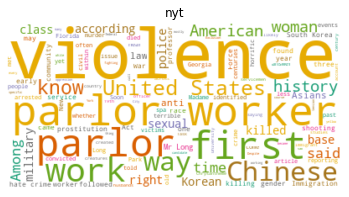

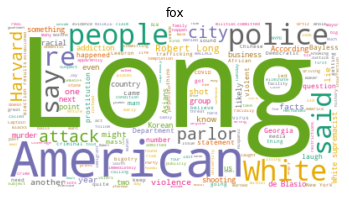

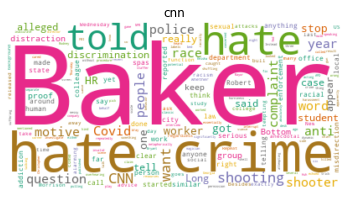

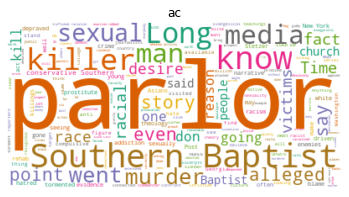

In [15]:
# Create the world cloud (again)
wc = WordCloud(stopwords=stop_words, background_color="white", colormap="Dark2", max_font_size=150, random_state=42)

# print(data_df.iloc[0][0])
for i in range(4):
    wc.generate(corpus.iloc[i][0])
    # plt.subplot(3, 4, index+1)
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title(keys[i])
    plt.show()

Word Cloud Obsrevations

NYT: 
* violence - this is a violent crime
* parlor - location
* first - ??
* work - ??

FOX:
* Long - focused on the perpetrator

CNN:
* Baker - focused on the police
* hate crime - believes this is hate driven
* hate - again, use of stong words

AC
* parlor - location, not relevant
* killer - foucsed on the perpetrator
* Southern Baptist - ??

In [ ]:
# Compile all words
megatext = ""
for i in range(4):
    megatext += corpus.iloc[i][0]
    megatext += " "
# print(megatext)

# Create an overall word cloud
wc.generate(megatext)
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.title('Overall')
plt.show()

## Word Count 

In [ ]:
for i in range(4):
    print(keys[i], len(corpus.iloc[i][0].split()))

* Articles are around 1500 words. FOX has the longest article, CNN has the shortest article.

## Analysis

* NYT article is centered around facts. The NYT article focused on both the famale and Asian identity of the victims. 
* FOX article discusses the perpetrator heavily, in contrast to the other three articles. It's top word is "Long" instead of "Asian," which is the top word of the other three articles.
* CNN article emphasizes that the crime is a hate crime. None of the other sources use the terms "hate" and "hate crime" nearly as much as CNN does.
* AC article may have a religious lean. Strangely enough, "Southern baptist" is one of its top words.